<H1><center><font color='limegreen'>Bank Marketing Campaign Analysis</font>
<br>----------

<H3><font color='limegreen'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

# **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding and Data Preparation
3. Exploratory Data Analysis
4. Data Preprocessing
5. Modeling and Hyperparameter Tuning
6. 
7. Conclusion and Recommendation

----
----

## **`0. Initial Setup`**

In [117]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Imbalance data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.combine import SMOTEENN

# Model Selection
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.metrics import roc_auc_score, average_precision_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

# Pipeline
from imblearn.pipeline import Pipeline

# Saving Model
import pickle

import warnings
warnings.filterwarnings("ignore")

## **`1. Business Problem Understanding`**

### **1.1 Context**

[Term Deposit](https://www.forbes.com/advisor/au/personal-finance/guide-to-term-deposits-in-australia/) atau tabungan berjangka adalah jenis rekening tabungan yang memberikan suku bunga tetap selama jangka waktu tertentu, biasanya satu bulan hingga lima tahun. yang membedakan jenis tabungan ini dengan tabungan konvensional lainnya adalah bahwa pada Term Deposit, nasabah tidak diperbolehkan mengambil dana yang sudah di setor selama jangka waktu deposit, jika nasabah menarik dana nya sebelum waktu deposit, maka nasabah akan dikenai biaya.

Dalam dunia perbankan, deposit memiliki peran penting bagi pertumbuhan industri perbankan. Bank membutuhkan dana yang disetorkan nasabah (Term Deposit) sebagai sumber dana yang dapat digunakan untuk memberikan pinjaman kepada nasabah lain dan menginvestasikan dana tersebut kepada calon investor. Dana deposit juga membantu bank dalam menjaga likuiditas dan stabilitas keuangan dari perusahaan bank tersebut. Sehingga bank harus terus meningkatkan jumlah nasabah yang menggunakan produk term deposit yang ditawarkan sehingga pada akhirnya akan memberikan manfaat jangka panjang dalam mendukung pertumbuhan dan kestabilitasan keuangan bank.

### **1.2 Problem Statement**

Proses menarik nasabah untuk mau menggunakan/ berlangganan produk Term Deposit memerlukan waktu dan sumber daya yang besar jika perusahaan melakukan usaha campaign tersebut kepada semua nasabah. Terlebih menurut [Brian Williams, Ph.D](https://blog.thebrevetgroup.com/21-mind-blowing-sales-stats), rata-rata sales menghubungi calon nasabah sebanyak lima kali agar calon nasabah tertarik menggunakan produk yang kita tawarkan. Sehingga perusahaan ingin meningkatkan efisiensi marketing campaign dengan memfokuskan campaign berikutnya kepada calon nasabah yang memiliki peluang untuk menggunakan produk Term Deposit berdasarkan karakteristik nasabah yang telah menggunakan produk Term Deposit.

### **1.3 Project Stakeholders:**

Pihak stakeholders yang terlibat dan yang akan menggunakan model dari analisis ini adalah:
* ***Sales & Marketing Team***: Tim ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan secara tepat dalam upaya memaksimalkan pendapatan perusahaan.
* ***Operations Team***: Tim ini akan bertanggung jawab dalam mengkoordinasikan serta mengurus rincian operasi, mengevaluasi gambaran besar operasi, dan memastikan bahwa area bisnis berjalan semulus dan seefektif mungkin.
* ***Finance Team***: Tim ini akan bertanggung jawab dalam mengatur keuangan perusahaan yang diakibatkan oleh usaha marketing.

Ketiga peran diatas memiliki tujuan yang sama yaitu memaksimalkan pendapatan perusahaan dari nasabah yang akan menggunakan produk term deposit dengan tepat

### **1.4 Goals**

Berdasarkan Problem Statement diatas, perusahaan ingin memiliki kemampuan untuk dapat memprediksi nasabah mana yang memiliki potensi untuk mau menggunakan/ berlangganan produk Term Deposit pada campaign berikutnya, sehingga tim marketing dapat lebih memfokuskan campaign berikutnya kepada calon nasabah yang terprediksi akan menggunakan produk Term Deposit berdasarkan karakteristik dari nasabah yang menggunakan/ berlangganan Term Deposit pada campaign sebelumnya.

Selain itu, untuk meningkatkan pelayanan dan performa dari bank itu sendiri, perusahaan juga ingin mengetahui faktor atau variabel apa yang membuat nasabah mau menggunakan atau berlangganan Term Deposit. Sehingga perusahaan dalam hal ini akan membuat perencanaan yang lebih baik lagi dalam mendekati calon nasabah yang potensial (nasabah yang ingin membuka Term Deposit)

### **1.5 Analytic Approach**

Dalam hal ini, kita akan menganalisis data untuk mencari pola yang bisa membedakan antara kategori nasabah yang ingin membuka Term Deposito atau tidak. Selain itu, kita juga akan membangun model klasifikasi yang akan membantu stakeholders untuk memprediksi probabilitas nasabah ingin membuka Term Deposit atau tidak. 

### **1.6 Metric Evaluation**

Karena kita akan memfokuskan pada nasabah yang berminat untuk mengajukan ***Term Deposit***, maka target yang kita tetapkan adalah sebagai berikut:

**Target**:   
`yes` : Nasabah Yang Menggunakan ***Term Deposit*** (Positive)
<br>
`no` : Nasabah Yang Tidak Menggunakan ***Term Deposit*** (Negative)

**Metric Evaluation**:

|                                | ***Tidak Term Deposit*-`Pred`** | ***Term Deposit*-`Pred`** |
| ------------------------------ | ------------------------------- | ------------------------- |
| ***Tidak Term Deposit*-`Act`** |               TN                |             FP            |
| ***Term Deposit*-`Act`**       |               FN                |             TP            |

**`Type 1 Error`** : **False Positive**
<br>
`Interpretasi`: Nasabah yang aktualnya tidak Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang Menggunakan *Term Deposit* 
<br>
`Konsekuensi`: 
* Bank akan mengeluarkan biaya yang sia-sia, karena Bank akan menghabiskan biaya untuk melakukan campaign kepada calon nasabah yang tidak akan Menggunakan *Term Deposit*
* Rincian biaya yang dikeluarkan untuk biaya marketing per orang: ([CPM]())
    * Budget marketing untuk deposito: 1% - 3% dari revenue ([sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    * Jumlah Nasabah: 41,188 ([*Sumber dari dataset*](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset))
        * Nasabah menggunakan Term Deposit: 4,640
        * Nasabah tidak menggunakan Term Deposit: 36,548
    * Kita akan menghitung budget marketing untuk melakukan Term Deposit Campaign
    $$ Marketing Budget = {(Nasabah\ menggunakan\ Term\ Deposit\times Min\ Opening\ Deposit)\times Budget\ marketing\ untuk\ deposito} $$ 
    $$ Marketing Budget = {(4,640\times 955.35\ EUR)\times 3\%} $$ 
    $$ Marketing Budget = {132,984.72\ EUR} $$ 
    *Marketing budget untuk campaign Term Deposit sebelumnya adalah 132,984.72 EUR, selanjutnya kita akan menghitung biaya campaign untuk per nasabahnya, sebagai berikut:* 
    $$ CPM =  \frac {Marketing\ Budget}{Total\ Customers} $$
    $$ CPM =  \frac {132,984.72\ EUR}{41,188} $$
    $$ CPM =  3.23\ EUR $$

*Dari hasil CPM diatas bisa dikatakan Bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah. Sehingga ketika bank salah memutuskan/ melabeli nasabah yang ingin membuka Term Deposit dan ternyata tidak ingin membuka Term Deposit, maka bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah secara sia-sia.*

**`Type 2 Error`** : **False Negative**
<br>
`Interpretasi`: Nasabah yang aktualnya Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang tidak Menggunakan *Term Deposit*
<br>
`Konsekuensi`: 
* Bank akan kehilangan potensi keunutungan dari nasabah yang berpotensi akan Menggunakan *Term Deposit*.
* Rincian potensi keuntungan per nasabah:
    * Suku bunga pinjaman: 0.25% ([Portugal Interest Rate, June 2014](https://tradingeconomics.com/portugal/interest-rate))
    * Suku bunga deposito: 5.59% ([Portugal Bank Lending Rate, June 2014](https://tradingeconomics.com/portugal/bank-lending-rate))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    $$ Profit =  {(Lending\ Rate\ -\ Deposit\ Interest\ Rate)\times Minimum\ Opening\ Deposit} $$
    $$ Profit =  {(5.59\% \ -\ 0.25\%)\times 955.35\ EUR} $$
    $$ Profit =  {51,02\ EUR} $$

*Dari hasil perhitungan profit diatas, bank akan berpotensi kehilangan keuntungan yang didapatkan dari setiap nasabah yang membuka rekening deposito sebesar 51,02 Euro per nasabah.*

Berdasarkan konsekuensi diatas, menurut langkah yang tepat untuk pemilihan model adalah model yang **sebanyak mungkin memprediksi `kelas positif yang benar` (*True Postive*)**, dan **sesedikit mungkin memprediksi `kelas positif yang salah` (*False Negative*)**. Jadi metrik utama yang akan digunakan adalah **PR-AUC** (*Precision-Recall Curve*). Matrik **PR-AUC** dipilih Dikarenakan kita lebih membutuhkan perhitungan `true positif` dibandingkan `true negatif` dan memiliki kelas yang `imbalance`, maka **PR-AUC** adalah metrik pengukuran yang tepat yakni kombinasi antara recall dan presisi berdasarkan treshold.

Alasan kami memilih AUC daripada Accuracy adalah karena,
seperti yang kita lihat dalam EDA, dataset yang kita gunakan adalah dataset yang imbalanced dengan kelas "no" sebagai kelas mayoritas. Jika kita menggunakan Accuracy sebagai metrik kita, model apa pun dapat memberikan Accuracy yang sangat baik. Tetapi pada akhirnya, itu akan menjadi model acak. AUC mengatasi masalah ini dengan melihat True Positive Rate (TPR) dan False Positif Rate (FPR). Hanya jika TPR dan FPR berada jauh di atas garis acak dalam kurva ROC, kita akan mendapatkan AUC yang baik. Accuracy tidak menjamin hal itu.


### **1.7 Data Dictionary**

Dataset dan deskripsi dapat di akses pada link berikut:
<br>
[Bank Marketing Campaign](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `age` | Usia nasabah (`tahun`) |
| `job` | Jenis pekerjaan nasabah |
| `marital` | Status pernikahan nasabah |
| `education` | Level pendidikan nasabah. illiterate = buta huruf, basic.4y = pendidikan hingga usia 9 tahun, basic.6y = hingga usia 11 tahun, basic.9y = hingga usia 14 tahun, highschool = pendidikan hingga usia 17 tahun, professional.course = kelas pelatihan kejuruan, university.degree = pendidikan tingkat universitas |
| `default` | Apakah memiliki riwayat kredit macet |
| `housing` | Apakah memiliki pinjaman dana untuk rumah |
| `loan` | Apakah memiliki pinjaman dana untuk pribadi |
| `contact` | Tipe device yang digunakan untuk berkomunikasi |
| `month` | Bulan dimana terakhir kali nasabah dihubungi |
| `day_of_week` | Hari dimana terakhir kali nasabah dihubungi |
| `duration` | Lama waktu ketika dihubungi (`detik`) |
| `campaign` | Jumlah kontak yang dilakukan selama campaign |
| `pdays` | Jumlah hari setelah terakhir kali dihubungi. "999" menandakan nasabah belum pernah dihubungi sebelumnya |
| `previous` | Jumlah kontak yang dilakukan sebelum campaign |
| `poutcome` | Hasil dari campaign sebelumnya |
| `emp.var.rate` | Tingkat variasi lapangan kerja: Varians penambahan atau pengurangan tenaga kerja (dalam %) karena perubahan kondisi ekonomi pada negara Portugal |
| `cons.price.idx` | Indeks harga konsumen: Indikator untuk menilai perubahan rata-rata harga suatu barang dan jasa (indikator inflasi) pada negara Portugal |
| `cons.conf.idx` | Indeks kepercayaan konsumen: Indikator untuk menilai kinerja perekonomian melalui tingkat konsumsi masyarakat pada negara Portugal |
| `euribor3m` | Tingkat suku bunga 3 bulan terakhir |
| `nr.employed` | Indeks tenaga kerja pada negara Porugal |
| `y` | Status nasabah menggunakan Term Deposit atau tidak |

**`y`** == `Yes` : Nasabah berlangganan Term Deposit, `No` : Nasabah tidak berlangganan Term Deposit
<br>

### **1.8 Import File**

In [118]:
# Import file CSV

df = pd.read_csv("D:\Purwadhika JCDS\Capstone Project\Final Project\data\\raw\\bank-additional-full.csv", sep=";")

print(f'Data ini memiliki jumlah baris dan kolom: {df.shape}')
df.sample(10)


Data ini memiliki jumlah baris dan kolom: (41188, 21)


age          job   marital            education  default housing loan  \
8907    35   technician   married  professional.course       no     yes   no   
20846   52  blue-collar   married             basic.4y  unknown      no   no   
27966   39       admin.   married          high.school  unknown     yes   no   
6681    45       admin.   married             basic.9y       no     yes   no   
6381    35       admin.    single  professional.course  unknown     yes   no   
38115   22     services    single  professional.course       no     yes  yes   
27145   57    housemaid   married             basic.4y       no      no   no   
39330   36  blue-collar  divorced          high.school       no      no   no   
31768   34       admin.   married          high.school       no      no  yes   
10041   39       admin.   married    university.degree       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
8907   telephone   jun         thu  ...         1    999         0   
20846   cellular   aug         thu  ...         1    999         0   
27966   cellular   mar         tue  ...         1    999         0   
6681   telephone   may         wed  ...         1    999         0   
6381   telephone   may         tue  ...         4    999         0   
38115   cellular   sep         tue  ...         1    999         0   
27145   cellular   nov         fri  ...         1    999         0   
39330   cellular   mar         mon  ...         2    999         1   
31768   cellular   may         thu  ...         1    999         0   
10041  telephone   jun         thu  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
8907   nonexistent          1.4          94.465          -41.8      4.866   
20846  nonexistent          1.4          93.444          -36.1      4.964   
27966  nonexistent         -1.8          92.843          -50.0      1.510   
6681   nonexistent          1.1          93.994          -36.4      4.857   
6381   nonexistent          1.1          93.994          -36.4      4.857   
38115  nonexistent         -3.4          92.379          -29.8      0.755   
27145  nonexistent         -0.1          93.200          -42.0      4.021   
39330      failure         -1.8          93.369          -34.8      0.639   
31768  nonexistent         -1.8          92.893          -46.2      1.327   
10041  nonexistent          1.4          94.465          -41.8      4.958   

       nr.employed    y  
8907        5228.1   no  
20846       5228.1   no  
27966       5099.1   no  
6681        5191.0   no  
6381        5191.0   no  
38115       5017.5  yes  
27145       5195.8   no  
39330       5008.7   no  
31768       5099.1   no  
10041       5228.1   no  

[10 rows x 21 columns]

## **`2. Data Understanding and Data Preparation`**

### **2.1 Initial Assessment**

Pertama kita akan mengecek dataset secara umum, dengan melihat informasi untuk setiap fitur-fiturnya meliputi tipe data, jumlah baris, jumlah missing value, jumlah persen missing value, jumlah unique value, dan nilai dari unique value dari fitur tersebut.

In [119]:
# Check karakteristik dataset

InitialAss = pd.DataFrame(
        {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'total_row': df.isna().count().values,
        'total_null': df.isna().sum().values,
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'unique_value': [df[col].unique() for col in df.columns]
        }
    )
pd.set_option('max_colwidth', None)
InitialAss

feature data_type  total_row  total_null  %null_value  n_unique  \
0              age     int64      41188           0          0.0        78   
1              job    object      41188           0          0.0        12   
2          marital    object      41188           0          0.0         4   
3        education    object      41188           0          0.0         8   
4          default    object      41188           0          0.0         3   
5          housing    object      41188           0          0.0         3   
6             loan    object      41188           0          0.0         3   
7          contact    object      41188           0          0.0         2   
8            month    object      41188           0          0.0        10   
9      day_of_week    object      41188           0          0.0         5   
10        duration     int64      41188           0          0.0      1544   
11        campaign     int64      41188           0          0.0        42   
12           pdays     int64      41188           0          0.0        27   
13        previous     int64      41188           0          0.0         8   
14        poutcome    object      41188           0          0.0         3   
15    emp.var.rate   float64      41188           0          0.0        10   
16  cons.price.idx   float64      41188           0          0.0        26   
17   cons.conf.idx   float64      41188           0          0.0        26   
18       euribor3m   float64      41188           0          0.0       316   
19     nr.employed   float64      41188           0          0.0        11   
20               y    object      41188           0          0.0         2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        unique_value  
0                                                                                                                                                                                                                                                                                                                                                                                           [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]  
2                                                                                                                                                                                                                

__Insight :__
<br>

* Numerical Variable:
<br>
    - `Discrete` : age, campaign, pdays, previous
<br>
    - `Continue` : duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* Categorical variable:
<br>
    - `Nominal` : job, marital, default, housing, loan, contact, month, day_of_week, poutcome, y
<br>
    - `Ordinal` : education
* Terdapat **`41.188 baris`** dan **`21 kolom`** dengan kolom **"`y`" sebagai target** pada dataset
* Tipe data untuk setiap variabel sudah sesuai
* Pada fitur **`job`**, **`marital`**, **`education`**, **`default`**, **`housing`**, dan **`loan`** terdapat kategori "**unknown**". Hal ini bisa saja merupakan bagian dari missing value (*analisis lebih lanjut*)
* Pada fitur **`month`** tidak ada bulan **januari** dan **februari**, artinya bank tidak melakukan campaign pada bulan tersebut. Hal ini dapat menjadi batasan dalam pembuatan machine learning

### **2.2 Descriptive Statistics**

Lalu kita akan coba melihat statistik deskriptif sederhana dari dataset ini

In [120]:
# Deskriptif statistik

display(
    # numerical variable
    df.describe(),
    # categorical variable
    df.describe(include='object')
)

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

__Insight :__
* Fitur **`age`**
    * Nasabah dalam dataset ini memiliki usia **minimal 17 tahun** dan **maksimal 98 tahun** dengan usia **rata-rata 40.02 tahun**
    * Model machine learning yang akan dibuat mungkin akan bekerja pada range usia 17-98 tahun
* Fitur **`duration`**
    * Pesebaran nilai cukup besar, ditunjukan dari nilai **standar deviasi 259.28**
    * Waktu yang dibutuhkan untuk menghubungi nasabah ialah dari **range 0 detik (tidak dihubungi) hingga 4,918 detik (82 menit)** #akan dianalisis kembali untuk durasi max ini
    * Waktu yang digunakan untuk menghubungi nasabah ialah **rata-rata 258.28 detik (4.3 menit)**
* Fitur **`campaign`** (Jumlah kontak yang dilakukan selama campaign)
    * Jumlah kontak yang dilakukan tim sales & marketing ialah **rata-rata 2.5 kali**
    * Beberapa kasus membutuhkan hingga lebih dari **3 kali** kontak dengan nasabah
* Fitur **`pdays`** ()
    * Pesebaran nilai cukup besar, ditunjukan dari nilai **standar deviasi 186.91**
    * kategori "**999**" menandakan bahwa nasabah belum pernah dihubungi sebelumnya
* Pesebaran nilai pada fitur **`nr.employed`** cukup besar, ditunjukan dari nilai standar deviasi yaitu 72.25
* Pada fitur **`job`**, pekerjaan yang paling banyak ditawari deposit adalah **admin** dengan 25.3% dari total data
* Pada fitur **`marital`**, status pernikahan yang paling banyak ditawari deposit adalah **married** dengan 60.52% dari total data
* Pada fitur **`education`**, status pendidikan yang paling banyak ditawari deposit adalah **university.degree** dengan 29.54% dari total data
* Pada fitur **`default`**, status riwayat kredit macet yang paling banyak ditawari deposit adalah **nasabah yang tidak pernah memiliki kredit macet** dengan 79.12% dari total data
* Pada fitur **`housing`**, status pinjaman rumah yang paling banyak ditawari deposit adalah **nasabah yang memiliki pinjaman rumah** dengan 52.38% dari total data
* Pada fitur **`loan`**, status pemilikan pinjaman pribadi yang paling banyak ditawari deposit adalah **nasabah yang tidak memiliki pinjaman pribadi** dengan 82.42% dari total data
* Pada fitur **`contact`**, tipe kontak yang paling banyak ditawari deposit adalah **telepon seluler** dengan 63.47% dari total data
* Pada fitur **`month`**, bulan nasabah dikontak yang paling banyak ditawari deposit adalah pada bulan **mei** dengan 33.43% dari total data
* Pada fitur **`day_off_week`**, hari nasabah dikontak yang paling banyak ditawari deposit pada hari **kamis** dengan 20.93% dari total data
* Pada fitur **`poutcome`**, hasil dari kampanye sebelumnya yang paling banyak adalah **nonexistent** dengan 86.34% dari total data
* Pada fitur **`y`**, nasabah yang **menolak** deposit adalah yang terbanyak dengan 88.73% dari total data

### **2.3 Missing Value Check**, deteksi dan kuantifikasi missing value:

Text(0.5, 1.0, 'Cek Missing Value')

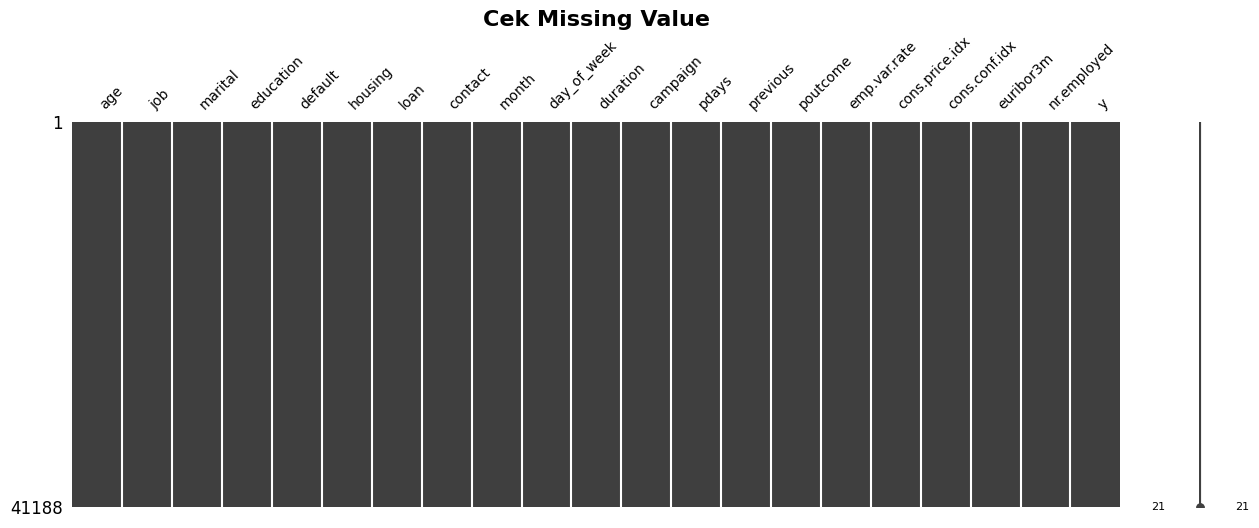

In [121]:
# Cek missing value

msno.matrix(df, figsize=(15,5), fontsize=10)
plt.title("Cek Missing Value", fontsize=16, weight="extra bold")

__Insight :__
* Dari matrix diatas memang **tidak ada missing value** pada dataset ini
* Dugaan awal missing value pada dataset ini ialah kategori "***unknown***"
* Pada tahap ini, tidak akan dilakukan treatment untuk kategori "***unknown***" untuk keperluan analisis EDA. Treatment akan dilakukan pada tahap ***Preprocessing***

### **2.4 Data Duplicated Check**, deteksi dan kuantifikasi duplikat data:

In [122]:
# Cek Data Duplikat

nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

Jumlah Data Duplikat: 12
Persentase Data Duplikat: 0.03%


__Insight:__
* Terdapat 12 data duplikat dari 41,188 baris data dengan persentase sebesar 0.03%
* Dari dataset yang disajikan tidak memiliki variabel tipe "**ID Data**", sehingga data duplikat dapat dianggap benar-benar duplikat
* Solution : Drop data duplikat tersebut

In [123]:
# Handling data duplicate

df.drop_duplicates(inplace=True)
nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)

print(f"*** Handling data duplikat sudah dilakukan ***\n\nJumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%")

*** Handling data duplikat sudah dilakukan ***

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%


### **2.5 Data Preparation**, menyiapkan data agar mempermudah dalam proses analisa data

#### **A. Pengelompokan pada fitur age**

Untuk mempermudah dalam proses analisis data yang akan dilakukan dalam tahap EDA. Maka fitur `age` akan kita kelompokan menjadi beberapa kelompok usia. Berdasarkan data dari [UNCTAD, Handbook of Statistics 2022](https://hbs.unctad.org/age-structure/), struktur usia berdasarkan kelompok ekonomi dibagi menjadi kelompok usia 0-14, 15-24, 25-39, 40-64, 65-74, dan kelompok usia 75+

In [124]:
# Kelompokan fitur age menjadi beberapa kelompok usia

def rangeusia (age) :
    if 15 <= age <= 24 :
        return '15-24'
    elif 25 <= age <= 39 :
        return '25-39'
    elif 40 < age <= 64 :
        return '40-64'
    elif 65 < age <= 74 :
        return '65-74' 
    else :
        return '>75'

In [125]:
# Mengelompokan usia

df.insert(1,'age_range',df['age'].apply(rangeusia))
df

age age_range          job  marital            education  default  \
0       56     40-64    housemaid  married             basic.4y       no   
1       57     40-64     services  married          high.school  unknown   
2       37     25-39     services  married          high.school       no   
3       40       >75       admin.  married             basic.6y       no   
4       56     40-64     services  married          high.school       no   
...    ...       ...          ...      ...                  ...      ...   
41183   73     65-74      retired  married  professional.course       no   
41184   46     40-64  blue-collar  married  professional.course       no   
41185   56     40-64      retired  married    university.degree       no   
41186   44     40-64   technician  married  professional.course       no   
41187   74     65-74      retired  married  professional.course       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0          no   no  telephone   may  ...        1    999         0   
1          no   no  telephone   may  ...        1    999         0   
2         yes   no  telephone   may  ...        1    999         0   
3          no   no  telephone   may  ...        1    999         0   
4          no  yes  telephone   may  ...        1    999         0   
...       ...  ...        ...   ...  ...      ...    ...       ...   
41183     yes   no   cellular   nov  ...        1    999         0   
41184      no   no   cellular   nov  ...        1    999         0   
41185     yes   no   cellular   nov  ...        2    999         0   
41186      no   no   cellular   nov  ...        1    999         0   
41187     yes   no   cellular   nov  ...        3    999         1   

          poutcome  emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1         93.994          -36.4      4.857   
1      nonexistent           1.1         93.994          -36.4      4.857   
2      nonexistent           1.1         93.994          -36.4      4.857   
3      nonexistent           1.1         93.994          -36.4      4.857   
4      nonexistent           1.1         93.994          -36.4      4.857   
...            ...           ...            ...            ...        ...   
41183  nonexistent          -1.1         94.767          -50.8      1.028   
41184  nonexistent          -1.1         94.767          -50.8      1.028   
41185  nonexistent          -1.1         94.767          -50.8      1.028   
41186  nonexistent          -1.1         94.767          -50.8      1.028   
41187      failure          -1.1         94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 22 columns]

#### **B. Pengelompokan pada fitur duration**

Fitur `duration` akan kita kelompokan menjadi beberapa kelompok berdasar jenis lamanya suatu panggilan kampanye kepada pelanngan. Berdasarkan data dari kolom duration kita 

In [126]:
# Hitung nilai minimum, maksimum, dan kuartil
min_duration = df['duration'].min()
max_duration = df['duration'].max()
q1_duration = np.percentile(df['duration'], 25)
q2_duration = np.percentile(df['duration'], 50)
q3_duration = np.percentile(df['duration'], 75)

# Tampilkan hasil
print("Minimum duration:", min_duration)
print("Q1 (25th percentile) duration:", q1_duration)
print("Q2 (50th percentile) duration:", q2_duration)
print("Q3 (75th percentile) duration:", q3_duration)
print("Maximum duration:", max_duration)

Minimum duration: 0
Q1 (25th percentile) duration: 102.0
Q2 (50th percentile) duration: 180.0
Q3 (75th percentile) duration: 319.0
Maximum duration: 4918


In [127]:
# Hitung nilai minimum, maksimum, dan kuartil
min_duration = df['duration'].min()
max_duration = df['duration'].max()
q1_duration = np.percentile(df['duration'], 25)
q2_duration = np.percentile(df['duration'], 50)
q3_duration = np.percentile(df['duration'], 75)

# Fungsi untuk mengkategorikan durasi panggilan
def categorize_duration(duration):
    if duration <= q1_duration:
        return 'very short call'
    elif duration <= q2_duration:
        return 'medium short call'
    elif duration <= q3_duration:
        return 'medium long call'
    else:
        return 'very long call'

# Buat kolom baru 'call_category' dengan kategori durasi panggilan
df.insert(12,'call_category',df['duration'].apply(categorize_duration))
df

age age_range          job  marital            education  default  \
0       56     40-64    housemaid  married             basic.4y       no   
1       57     40-64     services  married          high.school  unknown   
2       37     25-39     services  married          high.school       no   
3       40       >75       admin.  married             basic.6y       no   
4       56     40-64     services  married          high.school       no   
...    ...       ...          ...      ...                  ...      ...   
41183   73     65-74      retired  married  professional.course       no   
41184   46     40-64  blue-collar  married  professional.course       no   
41185   56     40-64      retired  married    university.degree       no   
41186   44     40-64   technician  married  professional.course       no   
41187   74     65-74      retired  married  professional.course       no   

      housing loan    contact month  ... campaign  pdays previous  \
0          no   no  telephone   may  ...        1    999        0   
1          no   no  telephone   may  ...        1    999        0   
2         yes   no  telephone   may  ...        1    999        0   
3          no   no  telephone   may  ...        1    999        0   
4          no  yes  telephone   may  ...        1    999        0   
...       ...  ...        ...   ...  ...      ...    ...      ...   
41183     yes   no   cellular   nov  ...        1    999        0   
41184      no   no   cellular   nov  ...        1    999        0   
41185     yes   no   cellular   nov  ...        2    999        0   
41186      no   no   cellular   nov  ...        1    999        0   
41187     yes   no   cellular   nov  ...        3    999        1   

          poutcome  emp.var.rate  cons.price.idx cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994         -36.4      4.857   
1      nonexistent           1.1          93.994         -36.4      4.857   
2      nonexistent           1.1          93.994         -36.4      4.857   
3      nonexistent           1.1          93.994         -36.4      4.857   
4      nonexistent           1.1          93.994         -36.4      4.857   
...            ...           ...             ...           ...        ...   
41183  nonexistent          -1.1          94.767         -50.8      1.028   
41184  nonexistent          -1.1          94.767         -50.8      1.028   
41185  nonexistent          -1.1          94.767         -50.8      1.028   
41186  nonexistent          -1.1          94.767         -50.8      1.028   
41187      failure          -1.1          94.767         -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 23 columns]

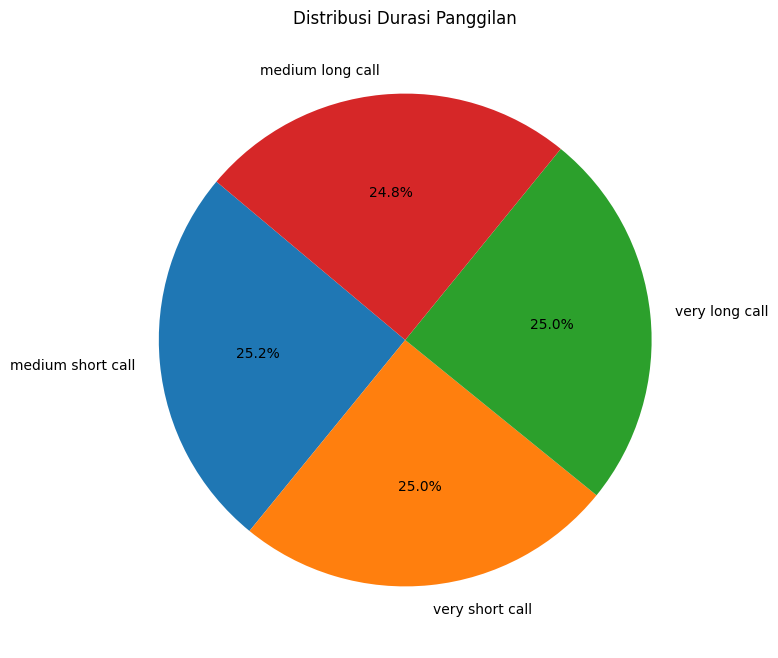

medium short call: Jumlah - 10386, Presentase - 25.22%
very short call: Jumlah - 10310, Presentase - 25.04%
very long call: Jumlah - 10284, Presentase - 24.98%
medium long call: Jumlah - 10196, Presentase - 24.76%


In [128]:
# Hitung jumlah panggilan dalam setiap kategori
call_category_counts = df['call_category'].value_counts()

# Jumlah total panggilan
total_calls = call_category_counts.sum()

# Tampilkan hasil dalam diagram pie
plt.figure(figsize=(8, 8))
plt.pie(call_category_counts, labels=call_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Durasi Panggilan')
plt.show()

# Tampilkan jumlah dan presentase setiap kategori
for category, count, percentage in zip(call_category_counts.index, call_category_counts, call_category_counts / total_calls * 100):
    print(f"{category}: Jumlah - {count}, Presentase - {percentage:.2f}%")


### <font size="4.5">Setelah dilakukan dilakukan analisis pada tahap `Data Preprocesing` pada langkah diatas, maka kita `menganggap` data yang kita miliki sudah bersih dan siap untuk dilakukan modeling</font>

## **`3. Exploratory Data Analysis`**

Untuk mempermudah dalam analisis data, kita akan membagi fitur yang ada dalam dataset menjadi beberapa persoalan, sebagai berikut:
1. Analisis berdasarkan informasi personal nasabah (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)
2. Analisis metode kontak yang dilakukan (`contact`, `month`, `day_of_week`, `duration`)
3. Analisis hasil campaign sebelumnya (`campaign`, `pdays`, `previous`, `poutcome`)
4. Analisis data ekonomi negara portugal (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.rmployed`)

### **3.1 Analisis Berdasarkan Informasi Personal Nasabah** (`age`, `job`, `marital`, `education`, `default`, `housing`, `loan`)

#### **3.1.1 Fitur `age`**

Kita akan cek pesebaran data untuk fitur `age`

<Figure size 1500x2000 with 0 Axes>

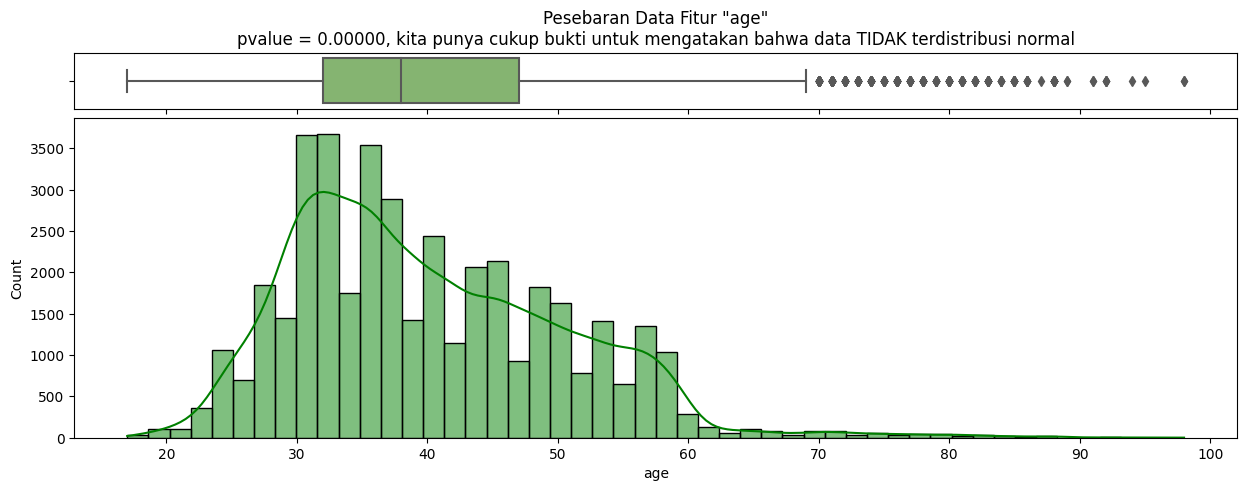

In [129]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["age"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "age"\n{distribusi}""", color = "black")
sns.boxplot(x = df["age"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["age"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu rentang usia 30-45 tahun 
* Nasabah yang paling banyak dihubungi ialah nasabah dengan range usia 30-45 tahun. Hal ini menandakan bank menargetkan calon nasabah dengan rentang usia tersebut dengan harapan usia tersebut meruakan usia yang dianggap sudah matang dari sisi finansial dan sedang dalam masa produktif-nya

Setelah kita mengetahui pesebaran data pada fitur `age`, selanjutnya kita akan coba melihat hubungan antar fitur `age_range` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok.

Maksud Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

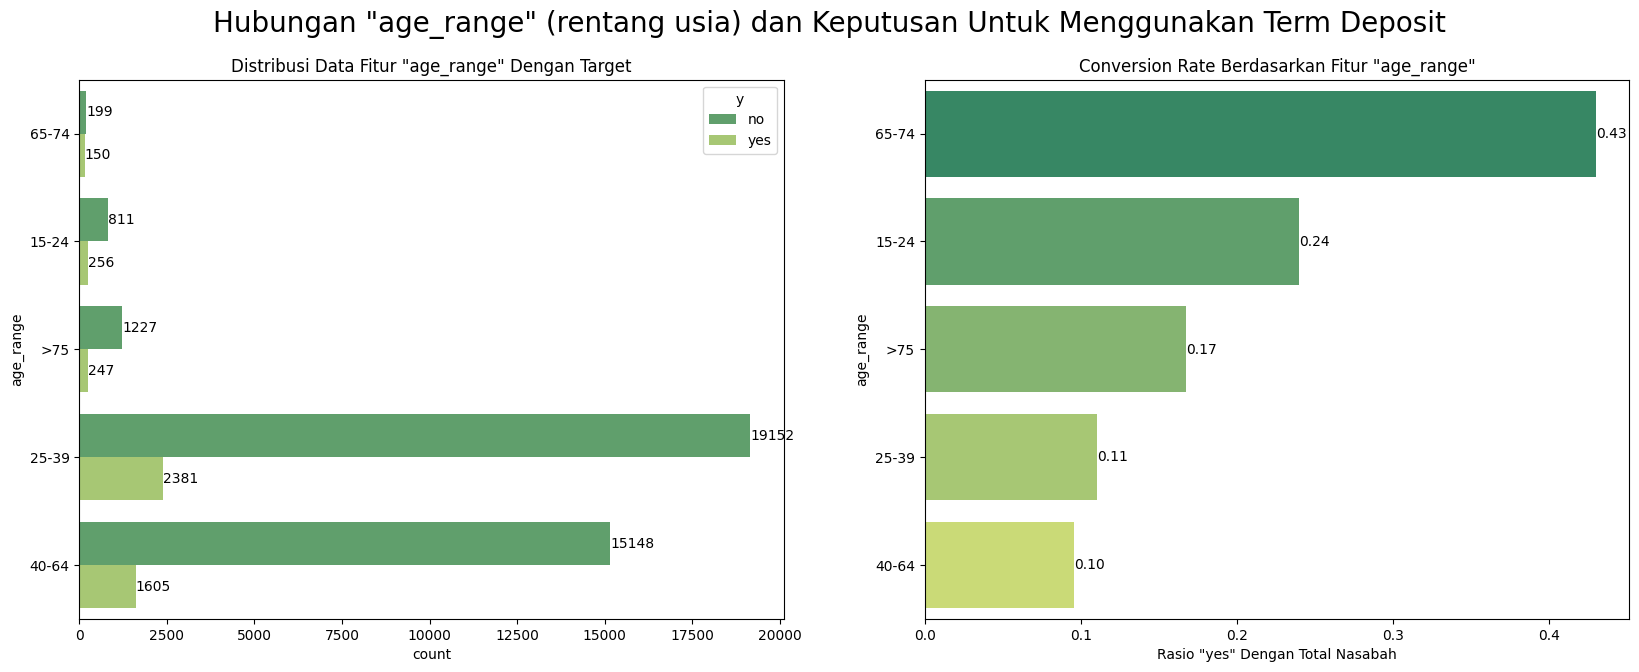

In [130]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "age_range" (rentang usia) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['age_range','age']].groupby(['age_range'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['age_range','age']].groupby(['age_range']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur age_range dengan Target
axes[0].set_title('Distribusi Data Fitur "age_range" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'age_range', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['age_range'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='age_range', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['age_range'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "age_range"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Berdasarkan grafik distribusi fitur `age_range` dengan target, Bank lebih banyak menawarkan produk Term Deposit kepada nasabah dengan kelompok usia 25-39 tahun dan 40-64 tahun (nasabah usia produktif)
* Pada grafik CVR berdasarkan kelompok usia, nasabah dengan kelompok usia 56-74 tahun, dan 15-24 tahun justru memiliki tingkat konversi yang tertinggi dibanding dengan kelompok usia produktif, dengan nilai CVR masing-masing kelompok usia adalah 0.43% dan 0.24%

#### **3.1.2 Fitur `job`**

Kita akan melihat hubungan antar fitur `job` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

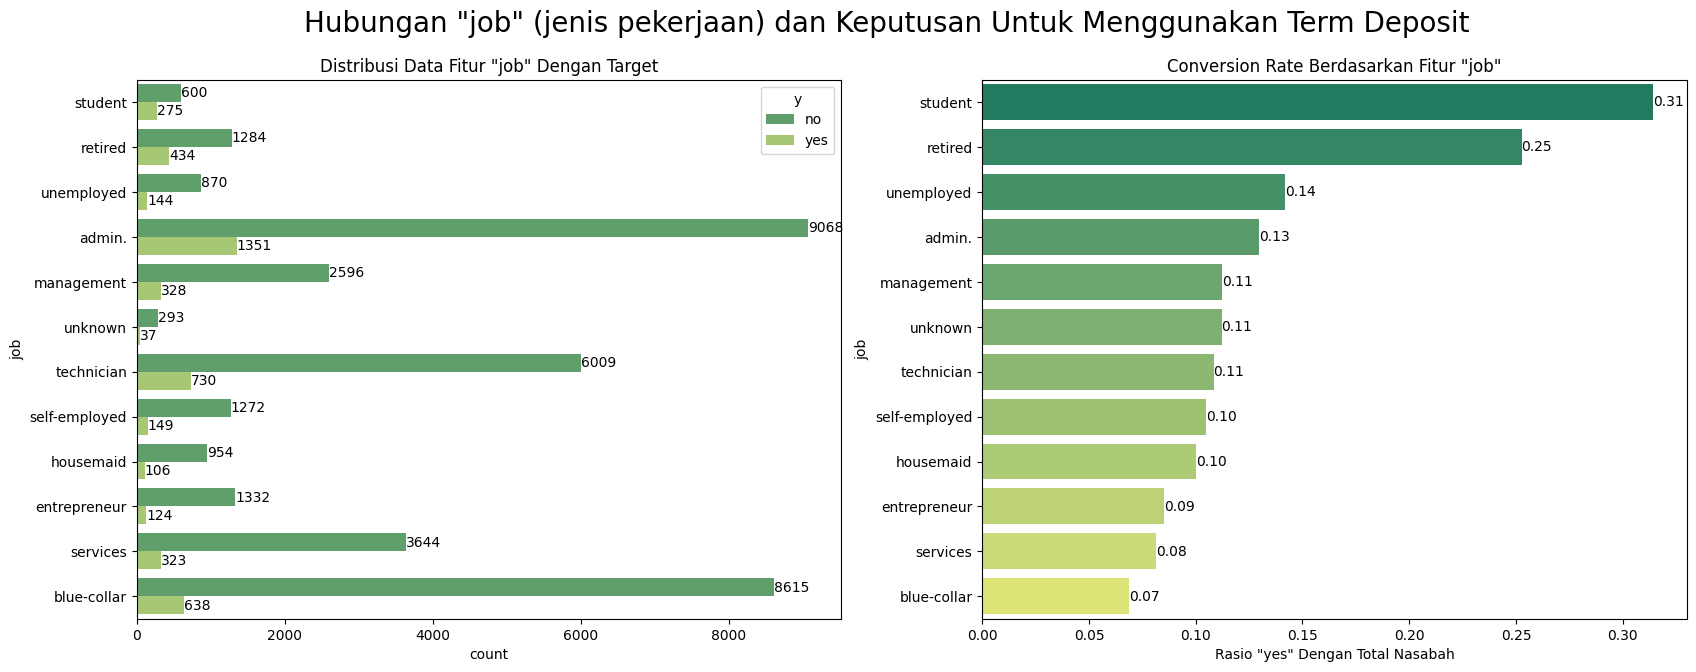

In [131]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "job" (jenis pekerjaan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['job','age']].groupby(['job'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['job','age']].groupby(['job']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur job dengan Target
axes[0].set_title('Distribusi Data Fitur "job" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'job', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['job'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='job', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['job'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "job"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Pekerjaan sebagai **`admin`**, merupakan pekerjaan yang paling banyak ditawari Term Deposit, dan juga merupakan pekerjaan dengan CVR yang cukup tinggi sekitar **0.13**. Hal ini bisa menjadi salah satu bahan pertimbangan perusahaan untuk tetap menawarkan produk Term Deposit kepada nasabah yang bekerja sebagai **`admin`**, atau memberikan penawaran yang menarik untuk jenis pekerjaan tersebut
* Pekerjaan sebagai **`blue-collar (buruh)`** merupakan pekerjaan tertinggi kedua setelah **`admin`** yang paling banyak ditawari produk Term Deposit namun pekerjaan tersebut memiliki CVR yang paling rendah dibanding dengan jenis pekerjaan lainnya. Hal ini memberi insight kepada perusahaan untuk membuat kebijakan baru atau metode yang lebih efektif lagi agar mereka dapat lebih tertarik dan menggunakan produk Term Deposit
* Pekerjaan sebagai **`student (pelajar)`** dan **`retired (pensiunan)`** memiliki conversion rate tertinggi dengan nilai masing-masing CVR adalah **0.31** dan **0.25**. Hal ini sesuai dengan insight dari fitur `age` dimana conversion rate tertinggi pada nasabah dengan **usia 65-74 tahun (mayoritas retired)**, dan nasabah dengan **usia 15-24 (mayoritas pelajar)**
* Hal unik adalah pada nasabah dengan pekerjaan **`unemployed (pengangguran)`**, dimana pekerjaan tersebut merupakan pekerjaan dengan tingkat konversi tertinggi ketiga dengan nilai **0.14**
* Nasabah yang tidak dikeathui jenis pekerjaan nya **`unknown`** memiliki CVR yang cukup tinggi. Hal ini merupakan sinyal kepada perusahaan agar dapat lebih berhati-hati dan lebih detail dalam masalah pendataan identitas nasabah terutama pada bagian jenis pekerjaan

#### **3.1.3 Fitur `marital`**

Kita akan melihat hubungan antar fitur `marital` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

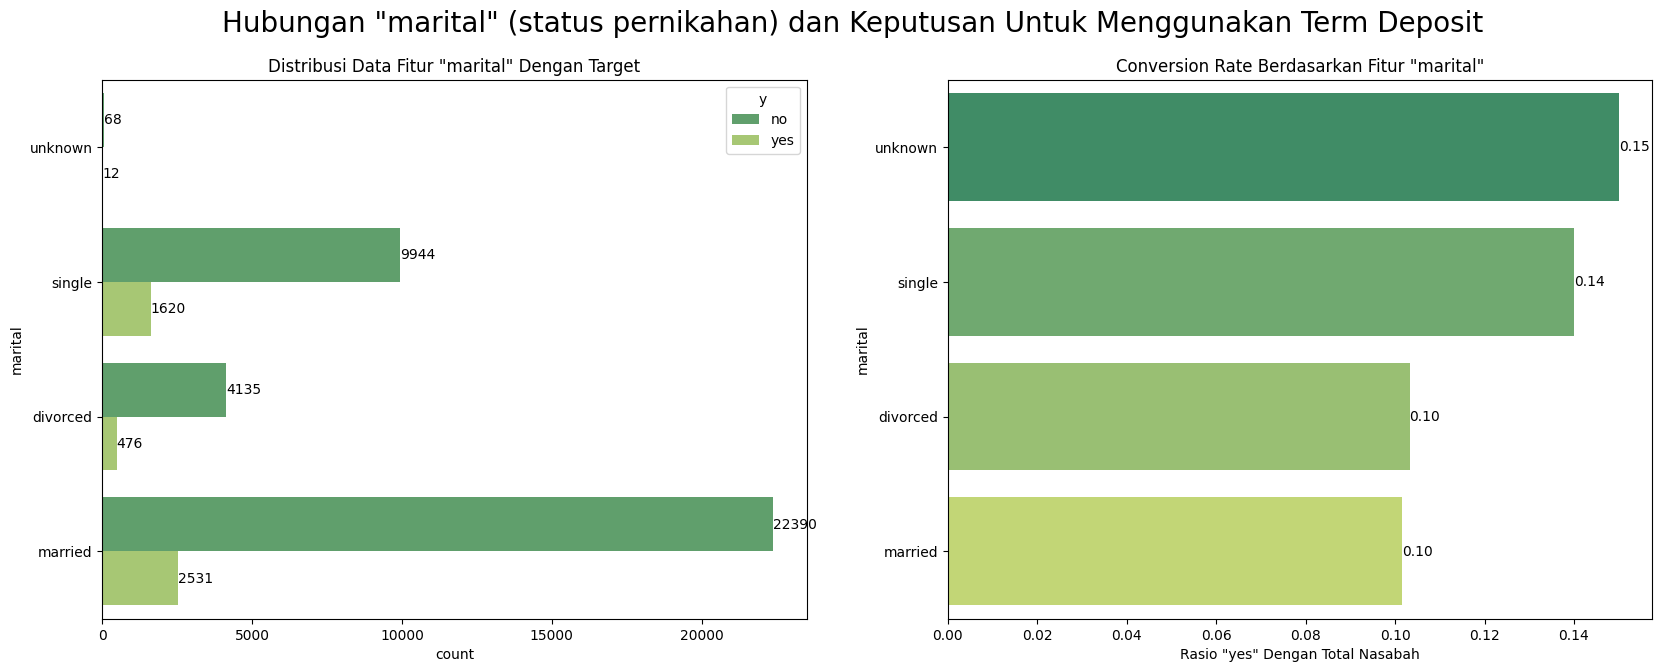

In [132]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "marital" (status pernikahan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['marital','age']].groupby(['marital'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['marital','age']].groupby(['marital']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur marital dengan Target
axes[0].set_title('Distribusi Data Fitur "marital" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'marital', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['marital'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='marital', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['marital'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "marital"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Nasabah dengan status pernikahan **`married (sudah menikah)`** merupakan status pernikahan yang paling banyak ditawari produk Term Deposit sekitar **24,921 nasabah**. Hal ini juga sesuai dengan insight dari fitur `age`, dimana nasabah yang paling banyak ditawari produk Term Deposit ialah nasabah dengan rentang usia 25-39 tahun, dimana rentang usia tersebut ialah usia yang umumnya berstatus `married (sudah menikah)`
* Nasabah yang tidak diketahui status pernikahannya (`unknown`) memiliki CVR tertinggi dengan nilai **0.15**. Hal ini merupakan sinyal kepada perusahaan agar dapat lebih berhati-hati dan lebih detail dalam pendataan identitas nasabah pada bagian status pernikahan
* Nasabah yang berstatus `single (belum menikah)` memiliki CVR yang tinggi sekitar **0.14**. Hal ini dapat diterima karena nasabah dengan status `single (belum menikah)` relatif tidak memiliki pengeluaran yang banyak, sehingga nasabah tersebut memiliki cukup dana untuk dapat diinvestasikan pada produk Term Deposit

#### **3.1.4 Fitur `education`**

Kita akan melihat hubungan antar fitur `education` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

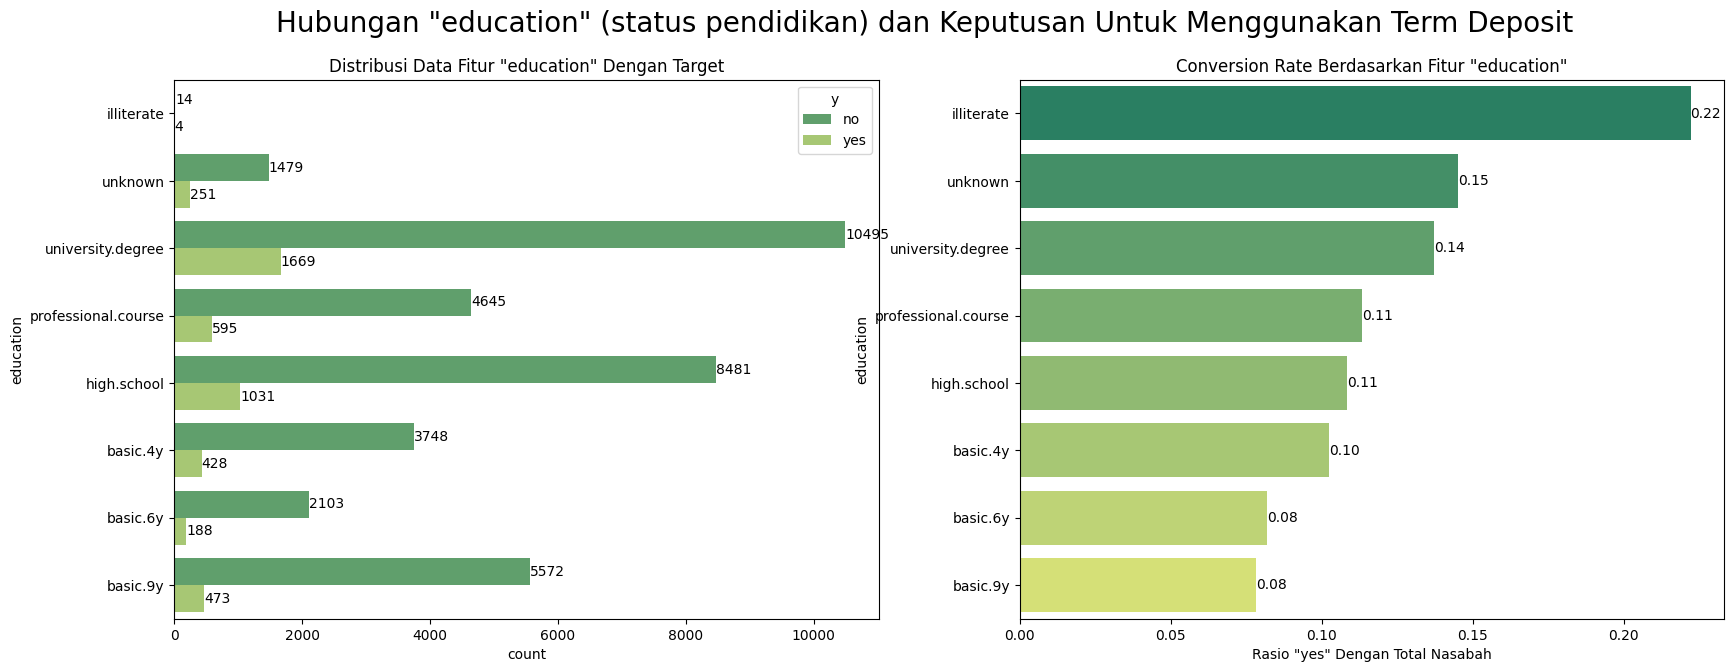

In [133]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "education" (status pendidikan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['education','age']].groupby(['education'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['education','age']].groupby(['education']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur education dengan Target
axes[0].set_title('Distribusi Data Fitur "education" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'education', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['education'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='education', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['education'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "education"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Dari grafik diatas nasabah dengan status pendidikan terakhir `university.degree (gelar universitas)` merupakan status terbanyak untuk ditawari produk Term Deposit. Dari grafik conversion rate, status pendidikan tersebut merupakan salah satu kelompok yang memiliki CVR tinggi sebesar **0.14**
* Nasabah yang tidak diketahui status pendidikannya (`unknown`) menempati posisi kedua kelompok dengan nilai CVR tertinggi yaitu **0.15**. Lagi-lagi perusahaan harus lebih berhati-hati dan lebih detail dalam pendataan identitas nasabah pada bagian status pendidikan ini
* Nasabah dengan status pendidikan `illiterate` (tidak pernah mengecap pendidikan) memiliki nilai CVR tertinggi yaitu sebesar **0.22**. Hal ini akan sulit untuk diambil kesimpulan, karena jika dilihat dari jumlah datanya, nasabah dengan status `illiterate` hanya berjumlah **18 nasabah** atau **0.04% dari total populasi** dalam dataset ini

#### **3.1.5 Fitur `default`**

Kita akan melihat hubungan antar fitur `education` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

In [134]:
# # Visualisasi sebaran data terhadap target serta conversion rate
# fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

# plt.suptitle('Hubungan default (Kredit Macet) dan Keputusan untuk Term Deposit', size = 20)

# dfratio = df[['default','age']].groupby(['default'],as_index=False).count()
# # dfratio['y'] = df[df['y'] == 'yes'][['default','age']].groupby(['default']).count().values
# # dfratio['ratio'] = dfratio['y']/dfratio['age']
# # dfratio.sort_values('ratio',ascending=False)
# # plot2=sns.barplot(data=dfratio, y='default', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['default'],ax=axes[0])
# # axes[0].set_title('Conversion Rate Berdasarkan default')
# # plt.xlabel('ratio yes/total')

# axes[1].set_title('Distribusi Data Target berdasarkan default')
# plot1=sns.countplot(hue = 'y', y = 'default', data = df,order=dfratio.sort_values(by='ratio',ascending=False)['default'],ax=axes[1])
# plt.xticks(rotation=90)

# plt.show()

#### **3.1.6 Fitur `housing`**

Kita akan melihat hubungan antar fitur `housing` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

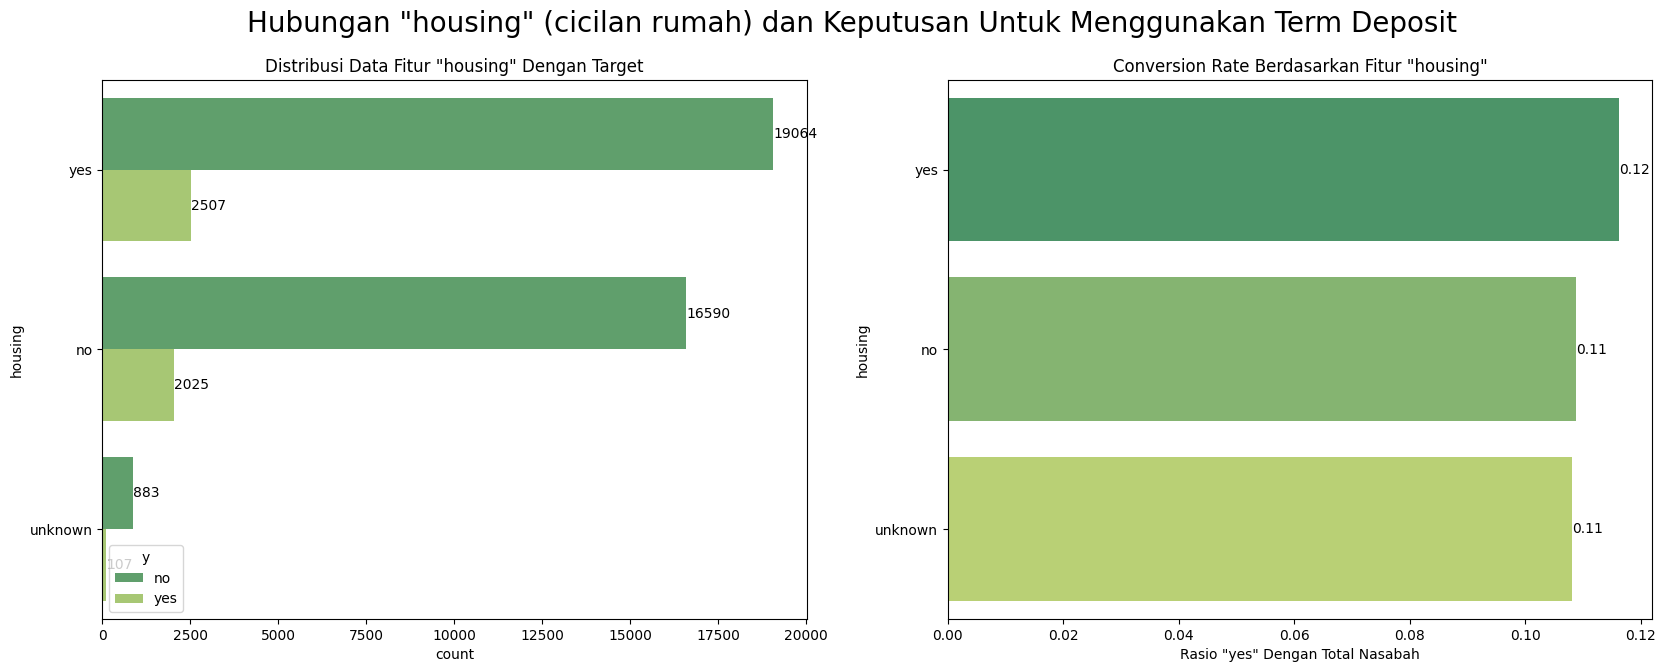

In [135]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "housing" (cicilan rumah) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['housing','age']].groupby(['housing'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['housing','age']].groupby(['housing']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur housing dengan Target
axes[0].set_title('Distribusi Data Fitur "housing" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'housing', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['housing'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='housing', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['housing'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "housing"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

#### **3.1.7 Fitur `loan`**

Kita akan cek pesebaran data untuk fitur `loan`

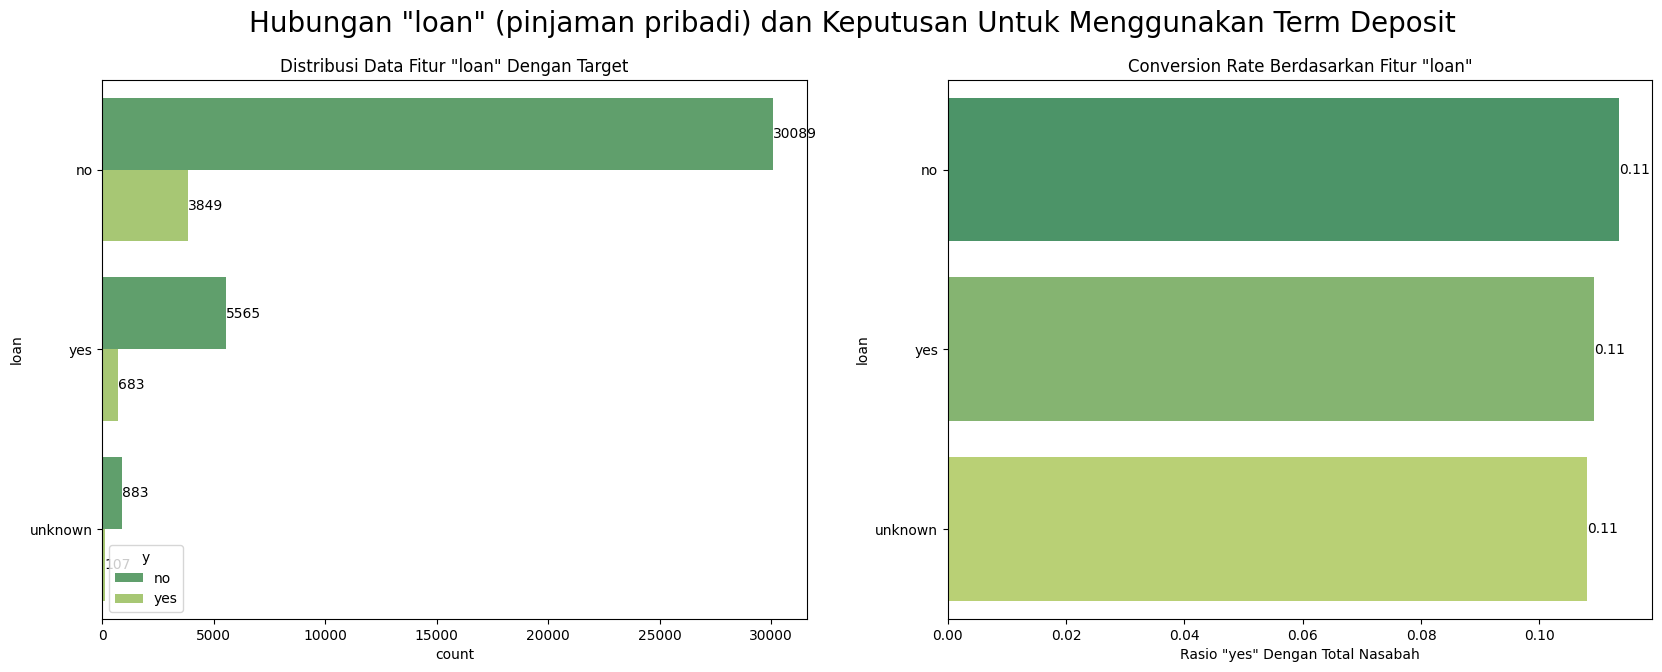

In [136]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "loan" (pinjaman pribadi) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['loan','age']].groupby(['loan'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['loan','age']].groupby(['loan']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur loan dengan Target
axes[0].set_title('Distribusi Data Fitur "loan" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'loan', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['loan'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='loan', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['loan'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "loan"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

### **3.2 Analisis Metode Kontak Yang Dilakukan** (`contact`, `month`, `day_of_week`, `duration`)

#### **3.2.1 Fitur `contact`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data dan conversion rate pada fitur **`contact`**

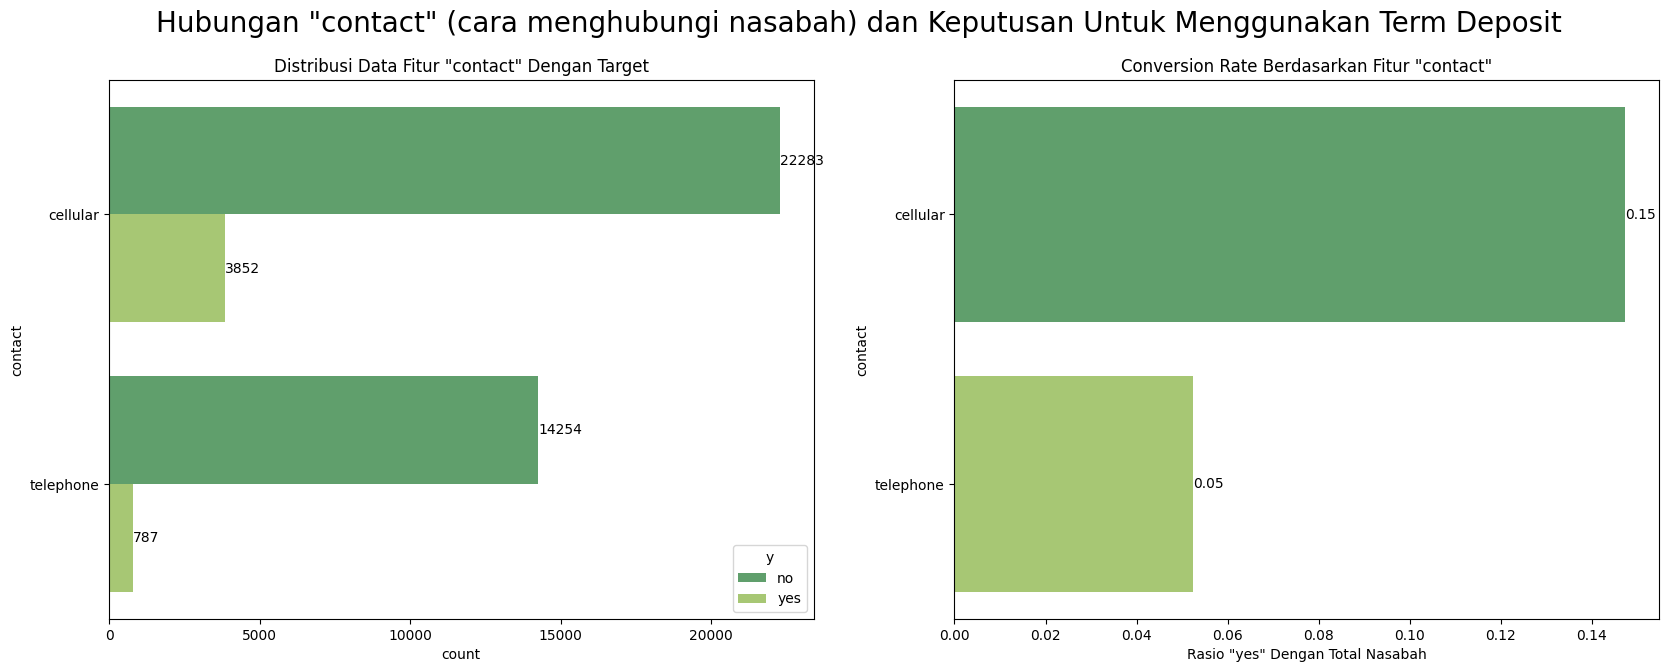

In [137]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "contact" (cara menghubungi nasabah) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['contact','age']].groupby(['contact'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['contact','age']].groupby(['contact']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur contact dengan Target
axes[0].set_title('Distribusi Data Fitur "contact" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'contact', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['contact'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='contact', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['contact'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "contact"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight :**

Dari grafik di atas, dapat ditarik kesimpulan bahwa bank telah mengambil pendekatan yang efektif dengan lebih sering menghubungi nasabah melalui nomor ponsel (cellular) dibandikan menggunakan nomor telepon. Ini terlihat dari conversion rate yang lebih tinggi bagi nasabah yang dihubungi melalui nomor ponsel, yang sekitar tiga kali lebih tinggi pada conversion ratenya bagi nasabah yang dihubungi melalui telepon. 
Untuk rekomendasi ke depan, mengingat conversion rate yang sangat rendah bagi nasabah yang dihubungi melalui telepon (hanya sekitar 5%), akan lebih baik memprioritaskan pada penggunaan nomor ponsel saat menghubungi nasabah.

#### **3.2.2 Fitur `month`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data pada fitur **`month`**

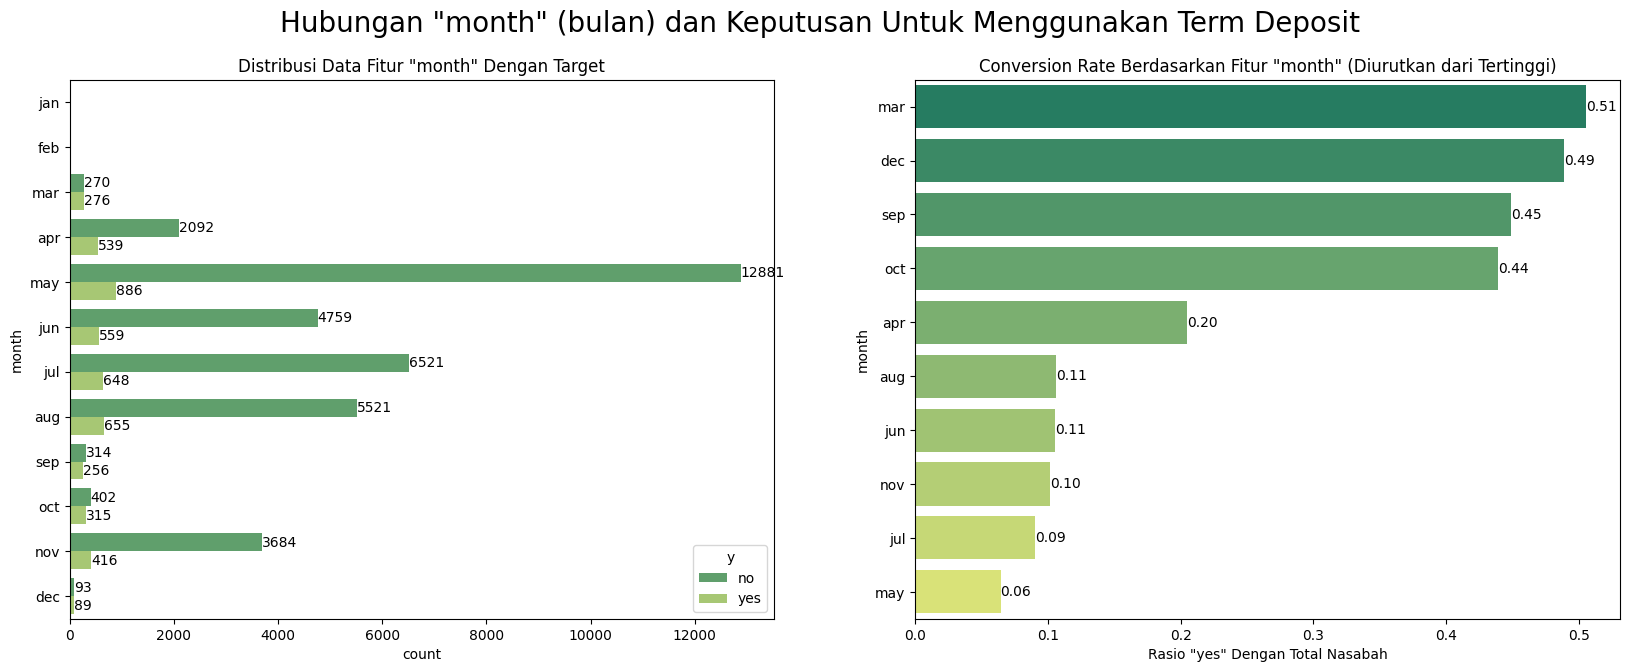

In [138]:
# Mendefinisikan urutan bulan dari Januari ke Desember
bulan_urutan = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Hubungan "month" (bulan) dan Keputusan Untuk Menggunakan Term Deposit', size=20)

# Conversion Rate
dfratio = df[['month', 'age']].groupby(['month'], as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['month', 'age']].groupby(['month']).count().values
dfratio['ratio'] = dfratio['y'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False, inplace=True)

# Grafik Distribusi fitur month dengan Target (diurutkan)
axes[0].set_title('Distribusi Data Fitur "month" Dengan Target')
plot1 = sns.countplot(hue='y', y='month', data=df, order=bulan_urutan, ax=axes[0], palette="summer")

# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate (diurutkan dari tertinggi)
plot2 = sns.barplot(data=dfratio, y='month', x='ratio', order=dfratio.sort_values('ratio', ascending=False)['month'], ax=axes[1], palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "month" (Diurutkan dari Tertinggi)')

# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')

# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()


**Insight :**

Dari grafik di atas, terlihat bahwa ada perbedaan yang signifikan dalam conversion rate berdasarkan hari dalam seminggu di mana nasabah terakhir kali dihubungi. Bulan tertentu, seperti `Maret, September, Oktober, dan Desember`, memiliki conversion rate yang lebih tinggi, meskipun jumlah nasabah yang dihubungi pada hari-hari ini relatif sedikit (hanya sekitar 5% dari total kontak). Di sisi lain, bulan Mei memiliki jumlah kontak yang tinggi, namun conversion ratenya rendah, menunjukkan bahwa banyak upaya kontak pada bulan tersebut mungkin tidak efektif.

Rekomendasi yang dapat diambil dari insight ini adalah bank dapat mempertimbangkan untuk meningkatkan upaya kontak pada hari-hari dengan conversion rate tinggi dan mengurangi frekuensi kontak pada bulan Mei. Selain itu, meratakan frekuensi kontak selama setiap bulan juga bisa menjadi strategi yang baik untuk membandingkan conversion rate secara lebih objektif. Hal ini akan membantu bank dalam pengelolaan sumber daya untuk akuisisi nasabah dengan lebih efisien.

Perlu dilakukan analisis juga mengapa pada bank tersebut mengapa hanya melakukan kampanye cenderung pada bulan-bulan tertetu. Bahkan pada bulan Januari dan Februari terlihat tidak ada dilakukannya campaign terhadap nasabah untuk deposito. Untuk menganalisa hal tersebut kita gunakan pengecekan melalui alah satu indikator ekonomi yaitu euribor terhadap fitur month.

EURIBOR adalah singkatan dari "Euro Interbank Offered Rate." EURIBOR adalah suku bunga acuan yang digunakan dalam pasar keuangan Eropa. Ini adalah suku bunga yang digunakan sebagai referensi untuk berbagai produk keuangan, terutama untuk pinjaman dan derivatif keuangan di wilayah euro. EURIBOR digunakan sebagai patokan untuk menentukan suku bunga yang harus dibayarkan atau diterima dalam berbagai transaksi keuangan.
EURIBOR dihitung berdasarkan suku bunga yang dilaporkan oleh sejumlah bank di zona euro. Setiap bank yang berpartisipasi dalam proses ini memberikan tingkat suku bunga yang mereka anggap akan diberikan jika mereka meminjamkan uang kepada bank lain untuk jangka waktu tertentu. Hasil dari laporan ini kemudian dihitung menjadi suku bunga EURIBOR. EURIBOR digunakan untuk berbagai tujuan, termasuk Penentuan suku bunga pinjaman, penilaian investasi, penentuan harga dan risiko derivatif, manajemen risiko perusahaan, perencanaan keuangan.
Penting untuk diingat bahwa ada berbagai jangka waktu EURIBOR, seperti 1 bulan, 3 bulan, 6 bulan, dan 12 bulan, yang dapat digunakan dalam berbagai jenis transaksi dan kontrak. EURIBOR menjadi salah satu indikator penting dalam pasar keuangan Eropa dan berperan dalam menentukan biaya pinjaman dan penilaian risiko di wilayah euro.

In [139]:
df_month_euribor = df[['euribor3m','month']].groupby('month',as_index=False).mean().reindex([5,0,6,4,3,1,9,8,7,2])
df_month_euribor

month  euribor3m
5   mar   1.162745
0   apr   1.361047
6   may   3.293696
4   jun   4.256908
3   jul   4.686026
1   aug   4.300408
9   sep   0.834760
8   oct   1.200762
7   nov   3.723018
2   dec   0.865319

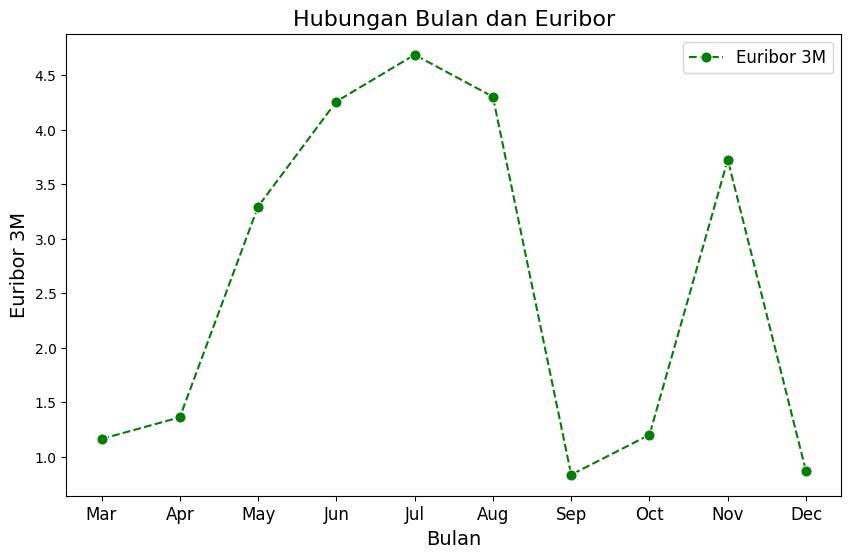

In [140]:
# Visualisasi sebaran data terhadap target serta conversion rate
plt.figure(figsize=(10, 6))
plt.title('Hubungan Bulan dan Euribor', fontsize=16)

# Mengatur warna garis menjadi hijau
sns.lineplot(data=df_month_euribor, x='month', y='euribor3m', color='green', linestyle='dashed', marker='o', markersize=8, label='Euribor 3M')

# Mengatur label pada sumbu x sesuai dengan nama bulan
plt.xticks(range(10), ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Menambahkan label untuk sumbu x dan y
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Euribor 3M', fontsize=14)

# Menambahkan legenda
plt.legend(fontsize=12)

plt.show()


**Insight :**

Dari informasi grafik di atas, terlihat bahwa bank cenderung kurang aktif dalam menghubungi nasabah ketika suku bunga Euribor rendah, yang menunjukkan situasi ekonomi yang stabil. Ini mungkin disebabkan oleh anggapan bahwa pada kondisi seperti ini, nasabah mungkin enggan untuk menginvestasikan uangnya dalam produk deposito dan lebih mungkin mencari instrumen investasi lain yang lebih menguntungkan. Namun, data conversion rate justru menunjukkan hasil yang berbeda. Ketika suku bunga Euribor rendah, konversi nasabah ke produk deposito tetap cukup tinggi.

Oleh karena itu, ada saran untuk bank untuk lebih aktif dalam menghubungi nasabah, terutama pada bulan-bulan ketika suku bunga rendah, dengan harapan untuk meningkatkan conversion rate. Alternatifnya, bank bisa mencoba strategi yang konsisten dalam menghubungi nasabah setiap bulan, sehingga hasil conversion rate dapat dibandingkan dengan lebih baik dalam periode yang sama.

#### **3.2.3 Fitur `day_of_week`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data pada fitur **`day_of_week`**

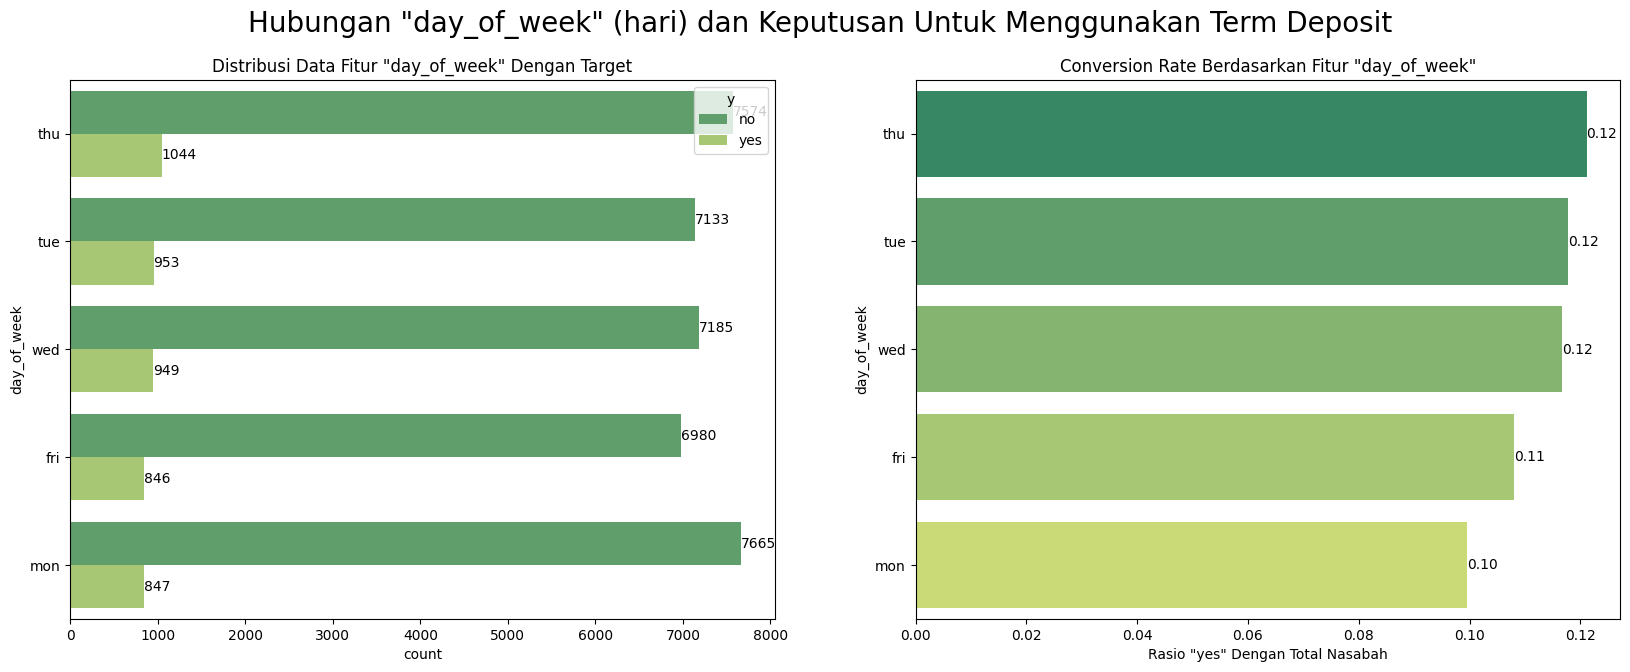

In [141]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "day_of_week" (hari) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['day_of_week','age']].groupby(['day_of_week'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['day_of_week','age']].groupby(['day_of_week']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur day_of_week dengan Target
axes[0].set_title('Distribusi Data Fitur "day_of_week" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'day_of_week', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['day_of_week'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='day_of_week', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['day_of_week'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "day_of_week"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight:**

Dari data di atas, kita bisa melihat bahwa perbedaan dalam conversion rate dari kontak terakhir pada hari kerja tidak memiliki perbedaan yang signifikan. Namun, secara keseluruhan, kita dapat menyimpulkan bahwa "conversion rate tertinggi terjadi ketika kontak terakhir dilakukan pada hari Kamis." Dari segi jumlah kontak yang dilakukan kepada nasabah, terlihat bahwa jumlahnya cukup merata setiap harinya, menunjukkan konsistensi dalam produktivitas Bank dalam menghubungi nasabah.

Untuk menentukan apakah ada pengaruh yang signifikan dari hari kerja terhadap kecenderungan konsumen untuk menerima term deposit, akan dilakukan uji hipotesis chi-test.

**Hipotesis:**

- Ho (Hipotesis Nol): Tidak ada hubungan antara hari kontak terakhir dengan kecenderungan nasabah untuk melakukan term deposit.
- Ha (Hipotesis Alternatif): Terdapat hubungan antara hari kontak terakhir dengan kecenderungan nasabah untuk melakukan term deposit.

In [142]:
# Mengganti nama variabel dan DataFrame
df_day_of_week = df[['day_of_week', 'y']]
df_day_of_week['yes_count'] = df_day_of_week['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_day_of_week['no_count'] = df_day_of_week['y'].apply(lambda x: 1 if x == 'no' else 0)
df_day_of_week = df_day_of_week.drop(columns='y')
df_day_of_week_counts = df_day_of_week.groupby('day_of_week').sum()
df_day_of_week_counts

yes_count  no_count
day_of_week                     
fri                846      6980
mon                847      7665
thu               1044      7574
tue                953      7133
wed                949      7185

In [143]:
stat, pvalue, dof, expected = chi2_contingency(df_day_of_week_counts)
# conclusion :
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. Tidak cukup bukti untuk menolak Hipotesis Nol (Ho).
          Tidak ada hubungan yang signifikan antara hari kontak terakhir dan kecenderungan nasabah untuk melakukan term deposit.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. Cukup bukti untuk menolak Hipotesis Nol (Ho).
          Terdapat hubungan yang signifikan antara hari kontak terakhir dan kecenderungan nasabah untuk melakukan term deposit.
          ''')



          p-value = 0.00003. Cukup bukti untuk menolak Hipotesis Nol (Ho).
          Terdapat hubungan yang signifikan antara hari kontak terakhir dan kecenderungan nasabah untuk melakukan term deposit.
          


**Insight:**

Data di atas mengindikasikan bahwa terdapat hubungan antara hari terakhir kontak dengan nasabah dan kecenderungan nasabah untuk melakukan deposit. Berdasarkan visualisasi grafik, direkomendasikan untuk meningkatkan panggilan pada hari Kamis, karena ini terkait dengan conversion rate yang lebih tinggi.

#### **3.2.4 Fitur `duration`**

Pada fitur contact akan dilakukan pengecekan untuk persebaran data pada fitur **`duration`**. Pada part sebelumnya kita telah melakukan grouping kolom `duration` kedalam kolom `call category` agar lebih mudah dalam mencari hubungan seberapa besar kolom tersebut mempengaruhi kecenderungan nasabah dalam melakukan term of deposite kita lakukan analisa dengan cara berikut :

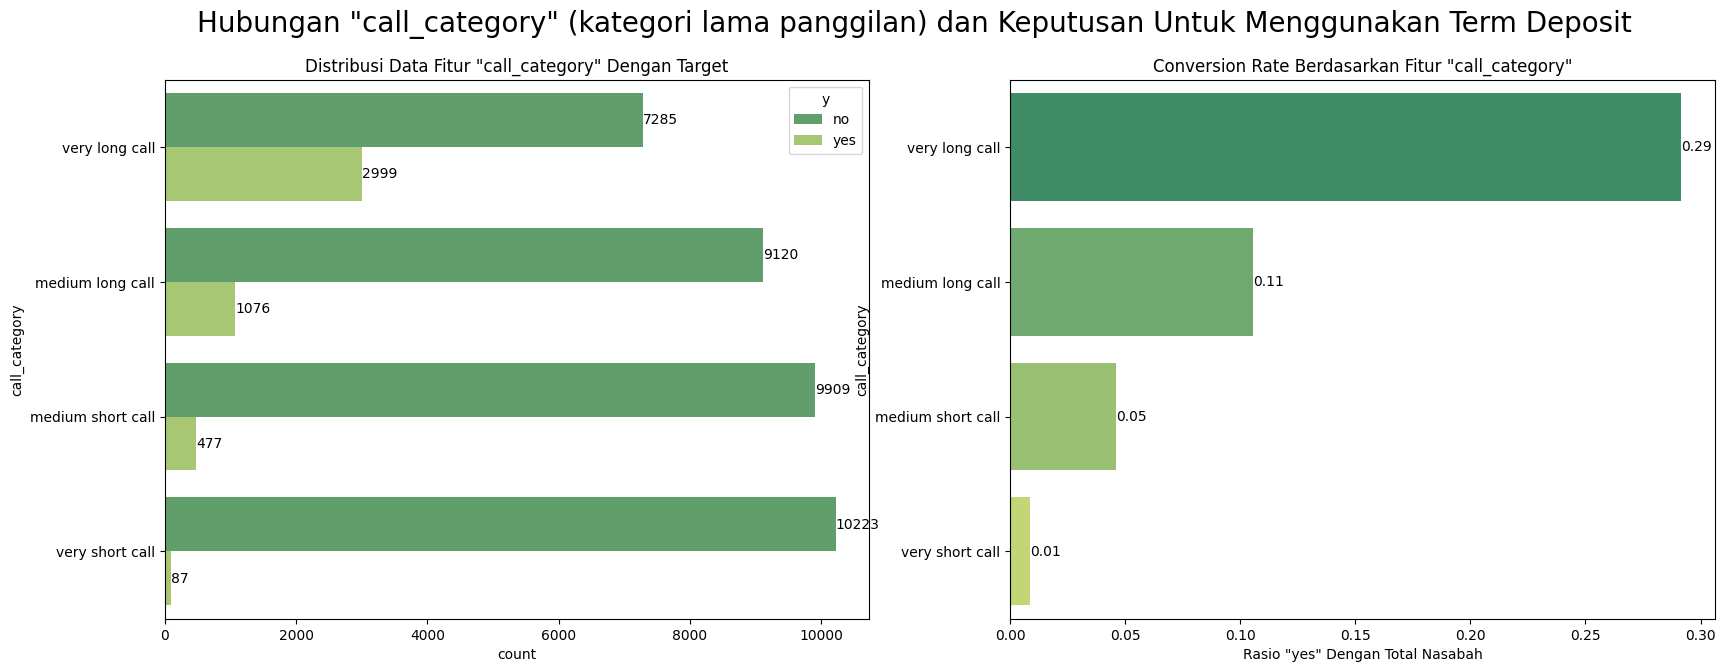

In [144]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "call_category" (kategori lama panggilan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['call_category','duration']].groupby(['call_category'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['call_category','duration']].groupby(['call_category']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['duration']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur call_category dengan Target
axes[0].set_title('Distribusi Data Fitur "call_category" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'call_category', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['call_category'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate 
plot2=sns.barplot(data=dfratio, y='call_category', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['call_category'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "call_category"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

**Insight :**

Dapat disimpulkan dari grafik diatas bahwa kecenderungan nasabah untuk bergabung dengan program term of deposit lebih besar saat menerima campaign dengan durasi lama (**`very long call`)**, setelah itu disusul dengan besaran conversion rate **`medium long call`, `medium short call`** selanjutnya pada posisi terakhir **`very short call`** dengan conversion rate yang paling rendah. Sehingga untuk sebagai himbauan kepada karyawan yang melakukan campaign bahwa seharusnya lebih baik melakukan call dengan waktu yang tidak terlalu singkat sehingga dapat menjelaskan produk layanan bank term deposit dengan lebih baik, baik dari sisi kemudahan dalam melakukan term of deposit ataupun keuntungan yang didapatkan oleh pelanggan jika bergabung dalam program tersebut.

### **3.3 Analisis Hasil Campaign Sebelumnya** (`campaign`, `pdays`, `previous`, `poutcome`)

#### **3.3.1 Fitur `campaign`**

Pada fitur campaign, pertama kita akan cek pesebaran nilai dan kita uji normalitas data, apakah data berdistribusi normal atau tidak

<Figure size 1500x2000 with 0 Axes>

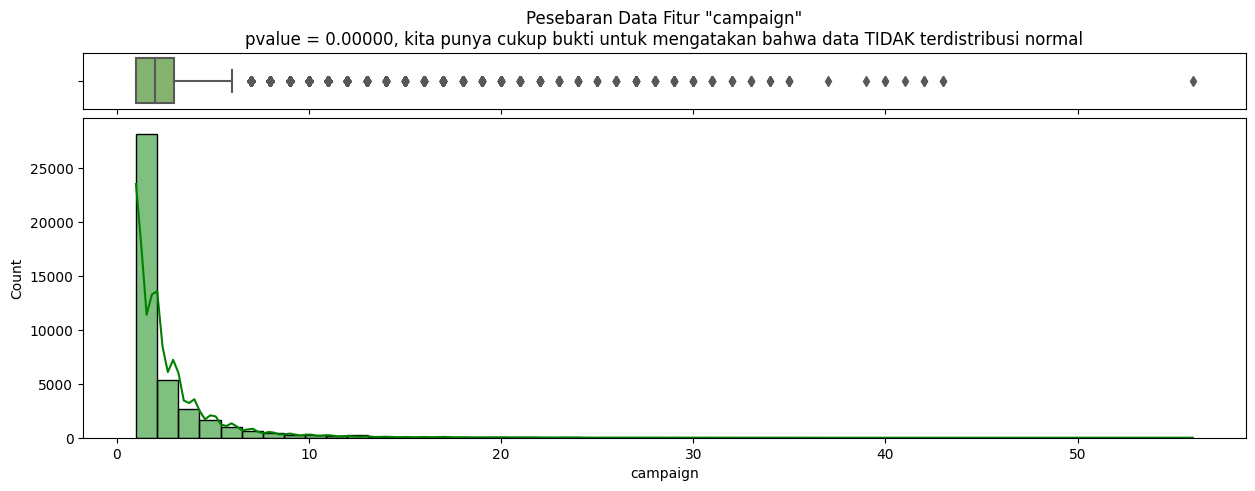

In [145]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["campaign"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "campaign"\n{distribusi}""", color = "black")
sns.boxplot(x = df["campaign"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["campaign"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu nasabah yang dikontak selama campaign sebanyak kurang dari 10 kali 
* Karena data ber-distribusi tidak normal. Maka, untuk mengetahui dimana posisi banyak nilai data terkumpul didalam distribusi (central of tendency) kita akan menggunakan nilai median. Nilai median diperoleh dengan mengurutkan data dari nilai yang terkecil hingga ke nilai yang terbesar, kemudian mencari titik yang membagi data menjadi dua kelompok

Setelah mengetahui ukuran pemusatan data yang akan kita gunakan, selanjutnya kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

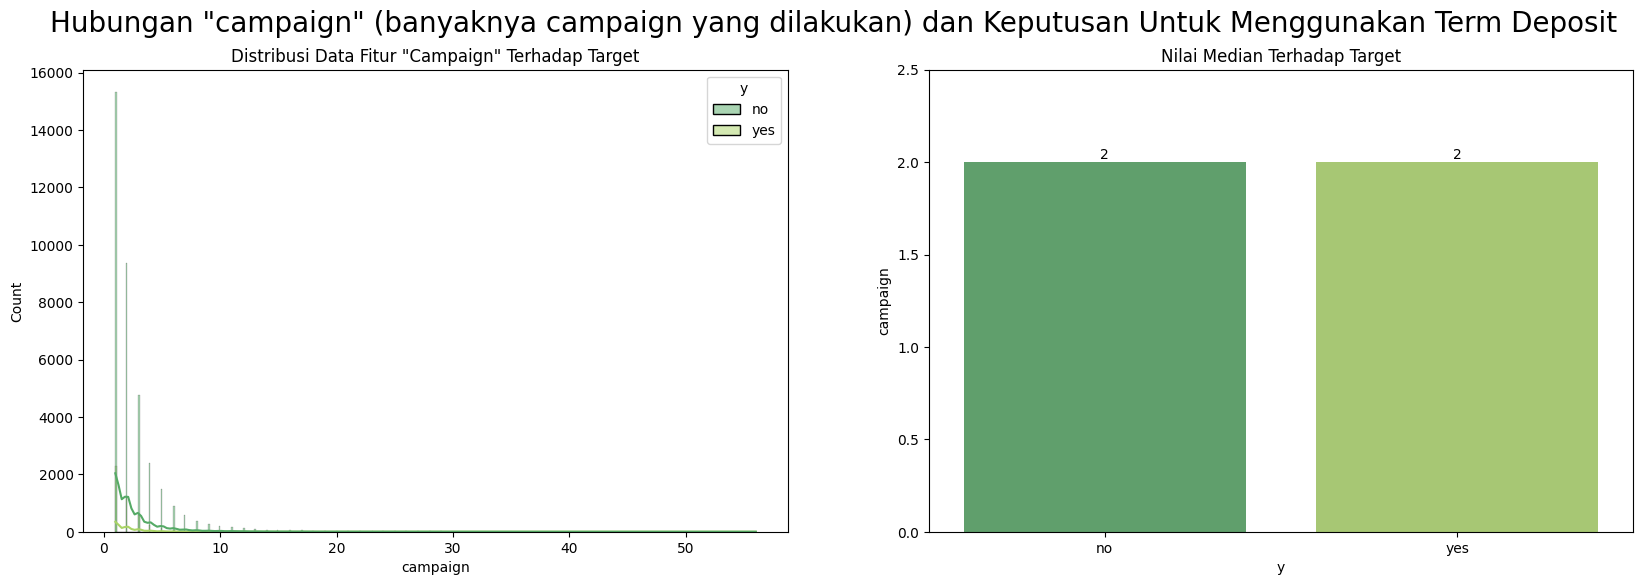

In [146]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "campaign" (banyaknya campaign yang dilakukan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "Campaign" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['campaign'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'campaign', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari jumlah kontak yang dilakukan kepada nasabah selama campaign yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `campaign` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data campaign 'Yes' >= Distribusi data campaign 'No'
- Ha : Distribusi data campaign 'Yes' < Distribusi data campaign 'No'

In [147]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['campaign'],
    df[df['y'] == 'no']['campaign'],
    alternative = 'less'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "campaign" pada orang yang setuju untuk term deposit LEBIH KECIL secara stokastik dibandingkan
          distribusi data "campaign" pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`campaign`" antara nasabah yang menggunakan Term Deposit lebih kecil dibanding dengan nasabah yang tidak menggunakan Term Deposit**. Artinya adalah fitur `campaign` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Setelah kita mengetahui bahwa fitur `campaign` dapat berpengaruh pada keputasan nasabah menggunakan Term Deposit atau tidak, selanjutnya kita akan melihat hubungan antar fitur campaign dan duration dengan fitur target untuk melihat efisiensi jumlah kontak panggilan dengan calon nasabah menggunakan Scatter Plot berikut:

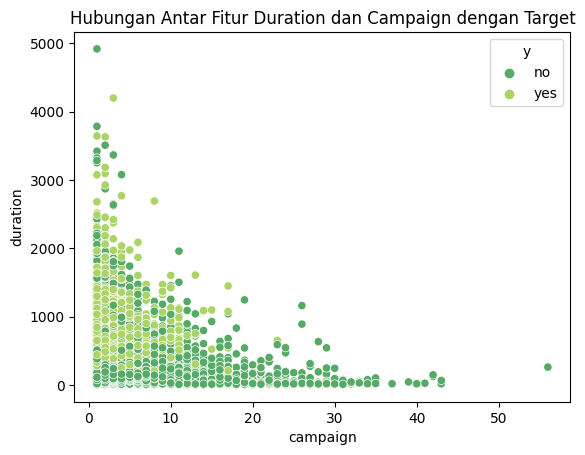

In [148]:
# Scatter plot hubungan fitur duration, campaign dengan target

plt.title('Hubungan Antar Fitur Duration dan Campaign dengan Target')
sns.scatterplot(data=df, x = 'campaign', y = 'duration', hue='y', palette="summer")
plt.show()

__Insight:__

Dari scatter plot diatas bisa kita lihat bahwa nasabah yang menggunakan term deposit cukup dikontak **maksimal 20 kali** saja, nasabah yang dikontak **lebih dari 20 kali** cenderung tidak tertarik lagi dengan produk yang ditawarkan. Hal ini masuk akal, karena ketika kita dikontak **lebih dari 20 kali** kita cenderung akan menganggap itu sebagai panggilan spam

#### **3.3.2 Fitur `pdays`**

<Figure size 1500x2000 with 0 Axes>

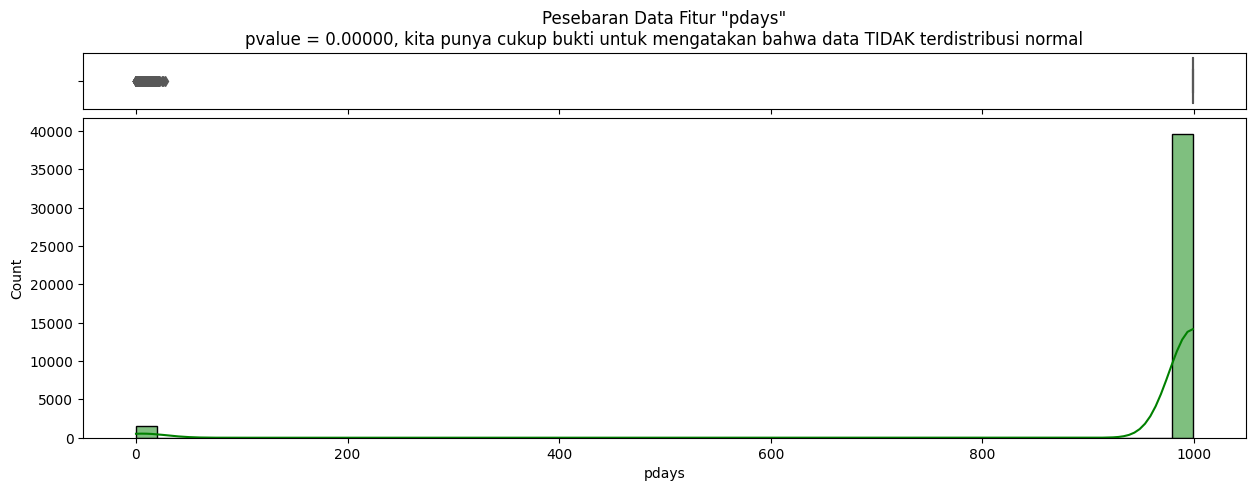

In [149]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["pdays"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "pdays"\n{distribusi}""", color = "black")
sns.boxplot(x = df["pdays"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["pdays"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kiri (Left-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai tertinggi-nya yaitu kategori "**999**" atau nasabah yang tidak pernah dihubungi dari campaign sebelumnya. 
* Karena data ber-distribusi tidak normal. Maka, untuk mengetahui dimana posisi banyak nilai data terkumpul didalam distribusi (central of tendency) kita akan menggunakan nilai median. Nilai median diperoleh dengan mengurutkan data dari nilai yang terkecil hingga ke nilai yang terbesar, kemudian mencari titik yang membagi data menjadi dua kelompok

Selanjutnya kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

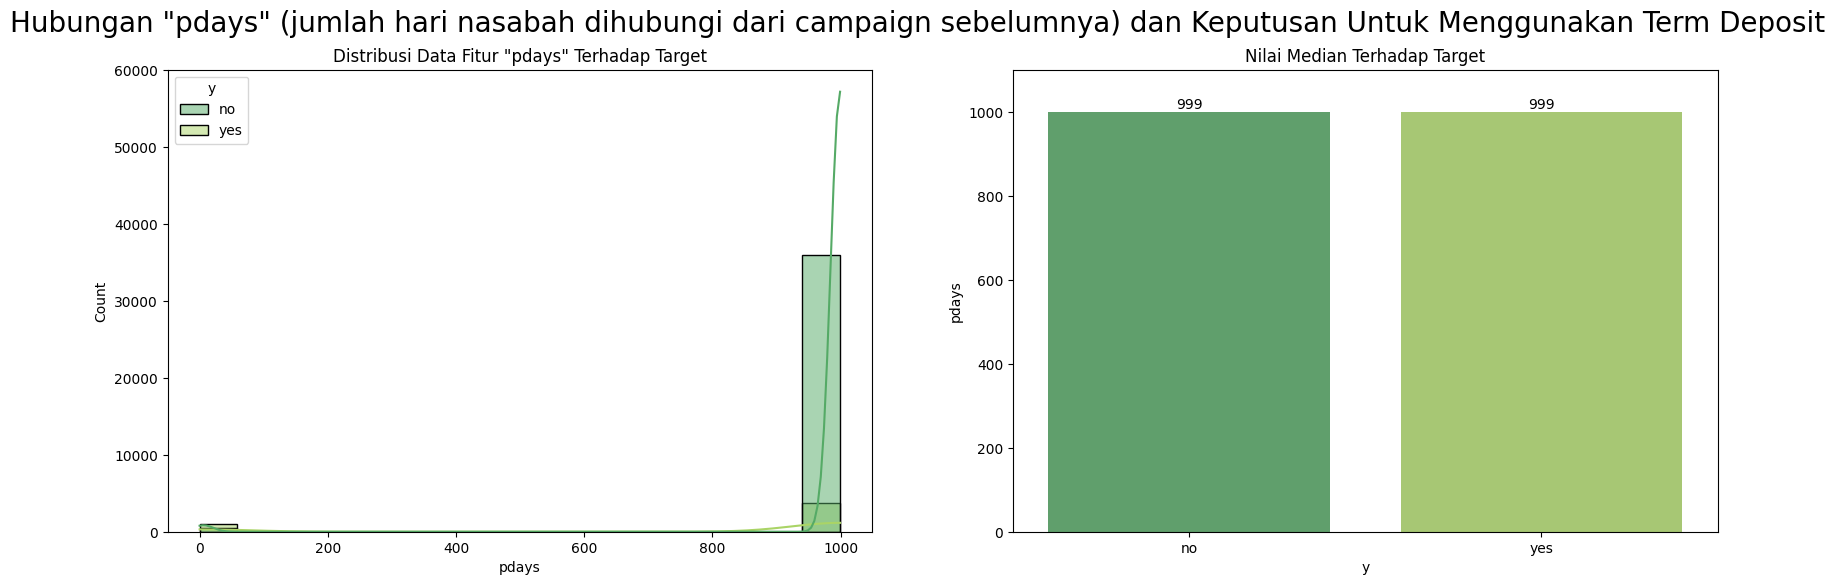

In [150]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "pdays" (jumlah hari nasabah dihubungi dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "pdays" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['pdays'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'pdays', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1100])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas **sulit untuk melihat perbedaan nilai median dari lamanya kontak terakhir yang dilakukan kepada nasabah (dalam hari) yang menggunakan Term Deposit atau tidak**(*masih menggunakan data nasabah yang belum pernah dihubungi sebelumnya "999"*). Maka untuk mengetahui apakah nilai median dari fitur `pdays` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data pdays 'Yes' == Distribusi data pdays 'No'
- Ha : Distribusi data pdays 'Yes' != Distribusi data pdays 'No'

In [151]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['pdays'],
    df[df['y'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`pdays`" antara nasabah yang menggunakan Term Deposit dan  yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `pdays` ini **dapat berpengaruh** pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Analisa sebelumnya ialah analisa yang masih menggunakan data nasabah yang tidak pernah dikontak sebelumnya (**kategori "999"**). Sekarang untuk melihat distribusi fitur `pdays` jika nasabah yang tidak pernah dihubungi sebelumnya dihapus dari dataset, dan kita akan mencari insight dari lamanya waktu nasabah terakhir kali dihubungi dengan fitur target, maka kita akan coba menghapus data nasabah yang belum pernah dikontak sebelumnya (kategori "999")

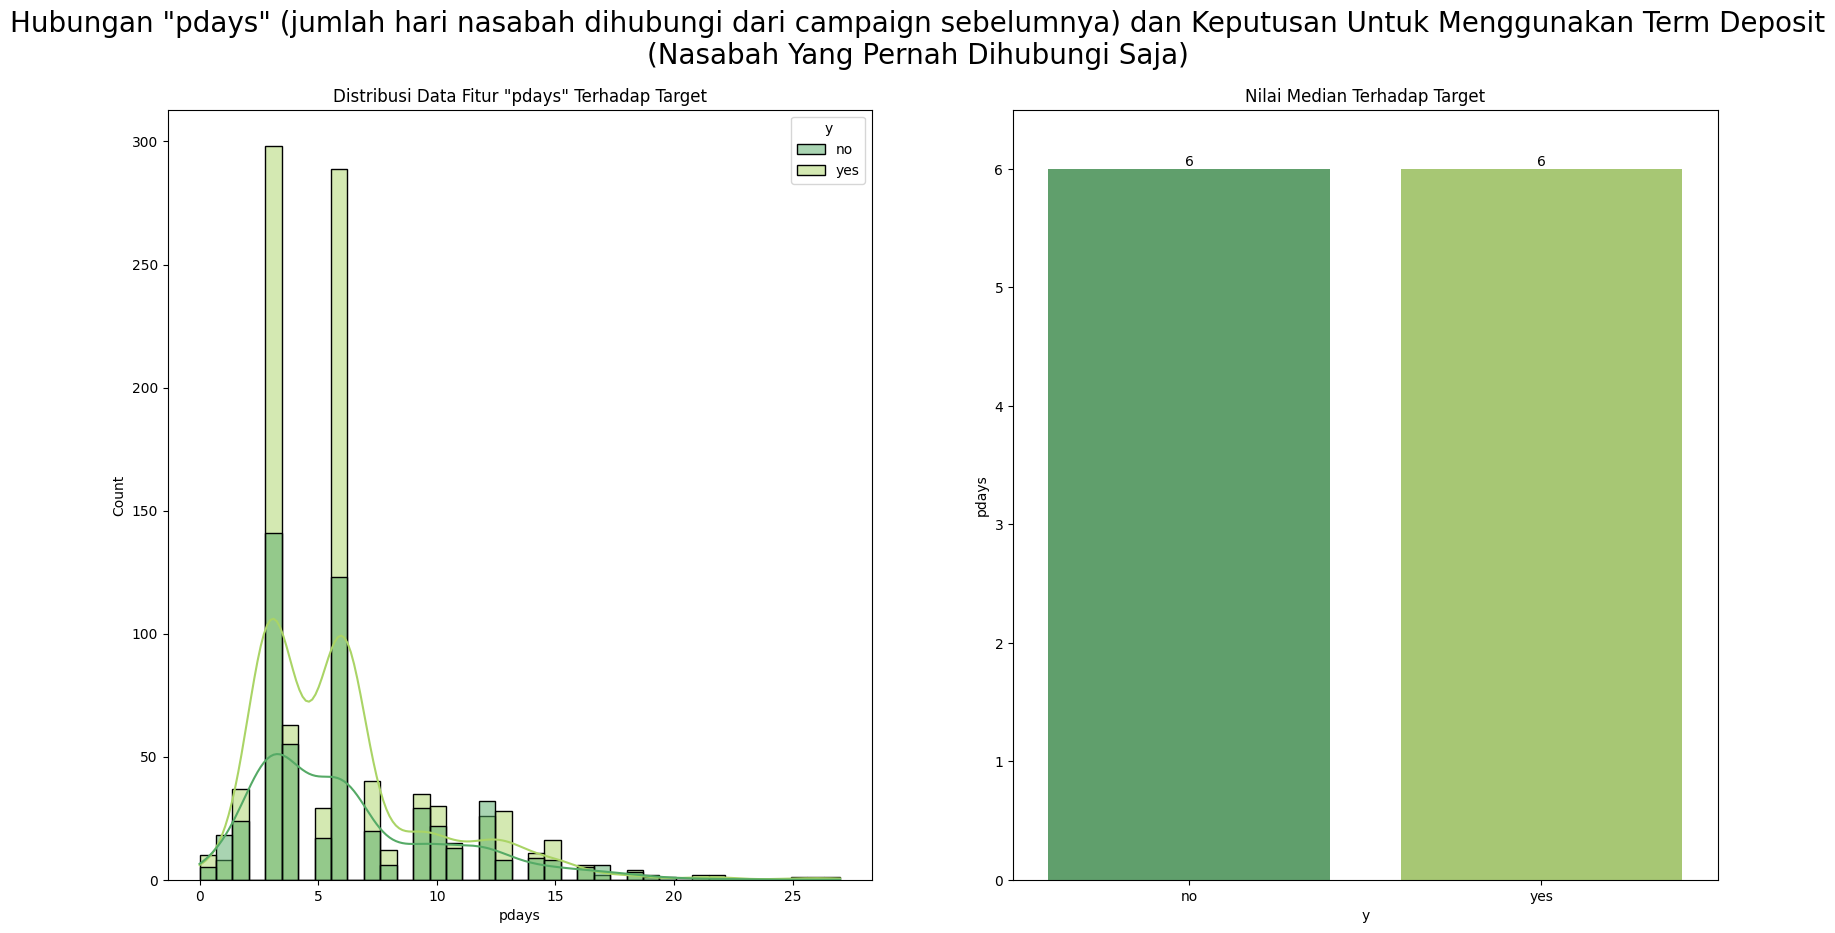

In [152]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target (exclude "999")

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,10))

plt.suptitle('Hubungan "pdays" (jumlah hari nasabah dihubungi dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit\n(Nasabah Yang Pernah Dihubungi Saja)', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "pdays" Terhadap Target')
plot1=sns.histplot(data = df[df['pdays'] != 999], hue = 'y', x = df[df['pdays'] != 999]['pdays'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'pdays', data = df[df['pdays'] != 999], estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 6.5])

plt.show()

__Insight:__

Sama seperti pada grafik sebelumnya. Nilai median terhadap target **sulit untuk dilihat perbedaan nilai median dari lamanya kontak terakhir yang dilakukan kepada nasabah (dalam hari) yang menggunakan Term Deposit atau tidak**(*hanya menggunakan data nasabah yang pernah dihubungi sebelumnya*). Maka untuk mengetahui apakah nilai median dari fitur `pdays` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data pdays nasabah yang pernah dihubungi 'Yes' == Distribusi data pdays nasabah yang pernah dihubungi 'No'
- Ha : Distribusi data pdays nasabah yang pernah dihubungi 'Yes' != Distribusi data pdays nasabah yang pernah dihubungi 'No'

In [153]:
# Uji Hipotesis Mann Whitney

df_without999 = df[df['pdays'] != 999]

stat, pvalue = mannwhitneyu(
    df_without999[df_without999['y'] == 'yes']['pdays'],
    df_without999[df_without999['y'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          ''')


          Nilai pvalue = 0.38457
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "pdays" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita tidak punya cukup bukti untuk mengatakan bahwa distribusi data "`pdays`" antara nasabah yang menggunakan Term Deposit dan  yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `pdays` yang telah menghapus data nasabah yang belum pernah dihubingi ini **tidak berpengaruh** pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.3.3 Fitur `previous`**

<Figure size 1500x2000 with 0 Axes>

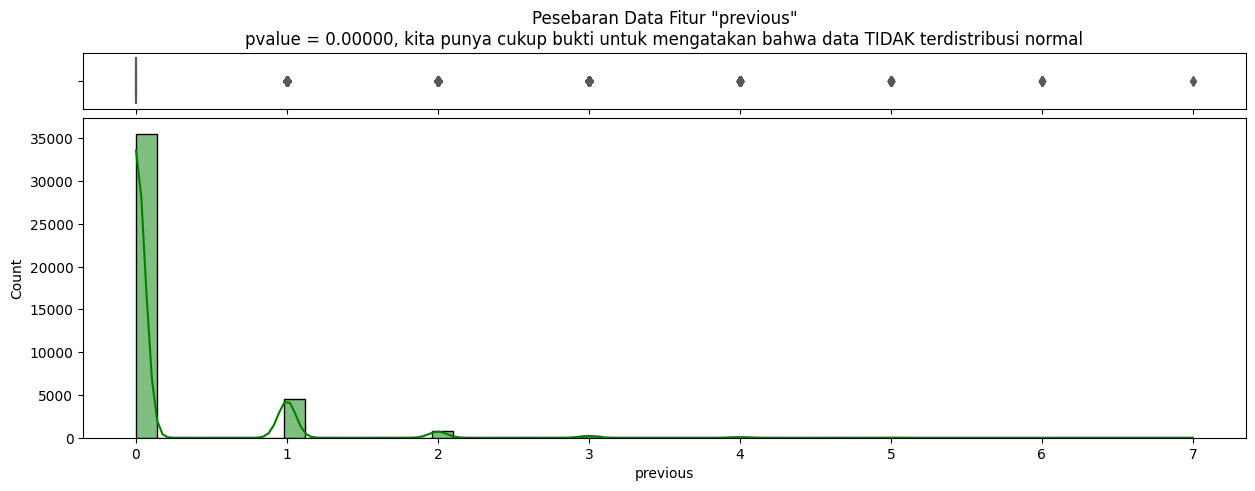

In [154]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["previous"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "previous"\n{distribusi}""", color = "black")
sns.boxplot(x = df["previous"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["previous"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__

Sebagian besar distribusi berada di nilai terendahnya yaitu "**0**", yaitu orang yang tidak dihubungi pada campaign sebelumnya. Hal ini sesuai dengan fitur `pdays` pada pembahasan sebelumnya, dimana pesebaran data tertinggi ada di kategori "**999**" yaitu nasabah yang tidak dihubungi pada campaign sebelumnya.

Selanjutnya kita lihat nilai central of tendency (menggunakan nilai median) pada fitur `previous` ini dengan fitur **target** dan kita cek juga visualisasi pesebaran data dengan targetnya

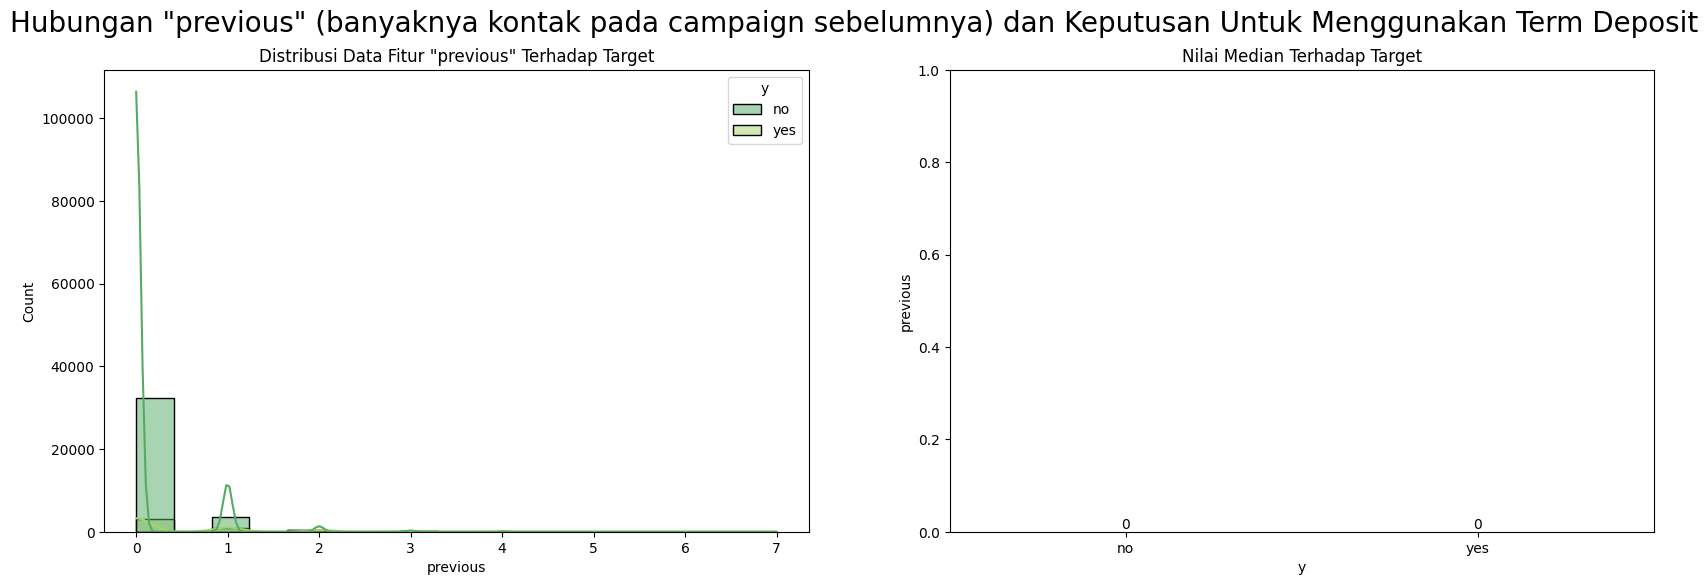

In [155]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "previous" (banyaknya kontak pada campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "previous" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['previous'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'previous', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas, kita sulit untuk melihat perbedaan nilai median dari banyaknya kontak yang dilakukan kepada nasabah pada campaign sebelumnya. Maka untuk mengetahui apakah nilai median dari fitur `previous` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data previous 'Yes' == Distribusi data previous 'No'
- Ha : Distribusi data previous 'Yes' != Distribusi data previous 'No'

In [156]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['previous'],
    df[df['y'] == 'no']['previous'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "previous" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`previous`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `previous` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

Pada analisa sebelumnya masih menggunakan data nasabah yang tidak pernah dihubungi sebelumnya (**kategori "0"**). Sekarang untuk melihat distribusi fitur `previous` jika nasabah yang tidak pernah dihubungi sebelumnya dihapus dari dataset, dan kita akan mencari insight dari banyaknya kontak yang dilakukan kepada nasabah pada campaign sebelumnya dengan fitur target, maka kita akan coba menghapus data nasabah yang tidak pernah dihubungi sebelumnya (kategori "0")

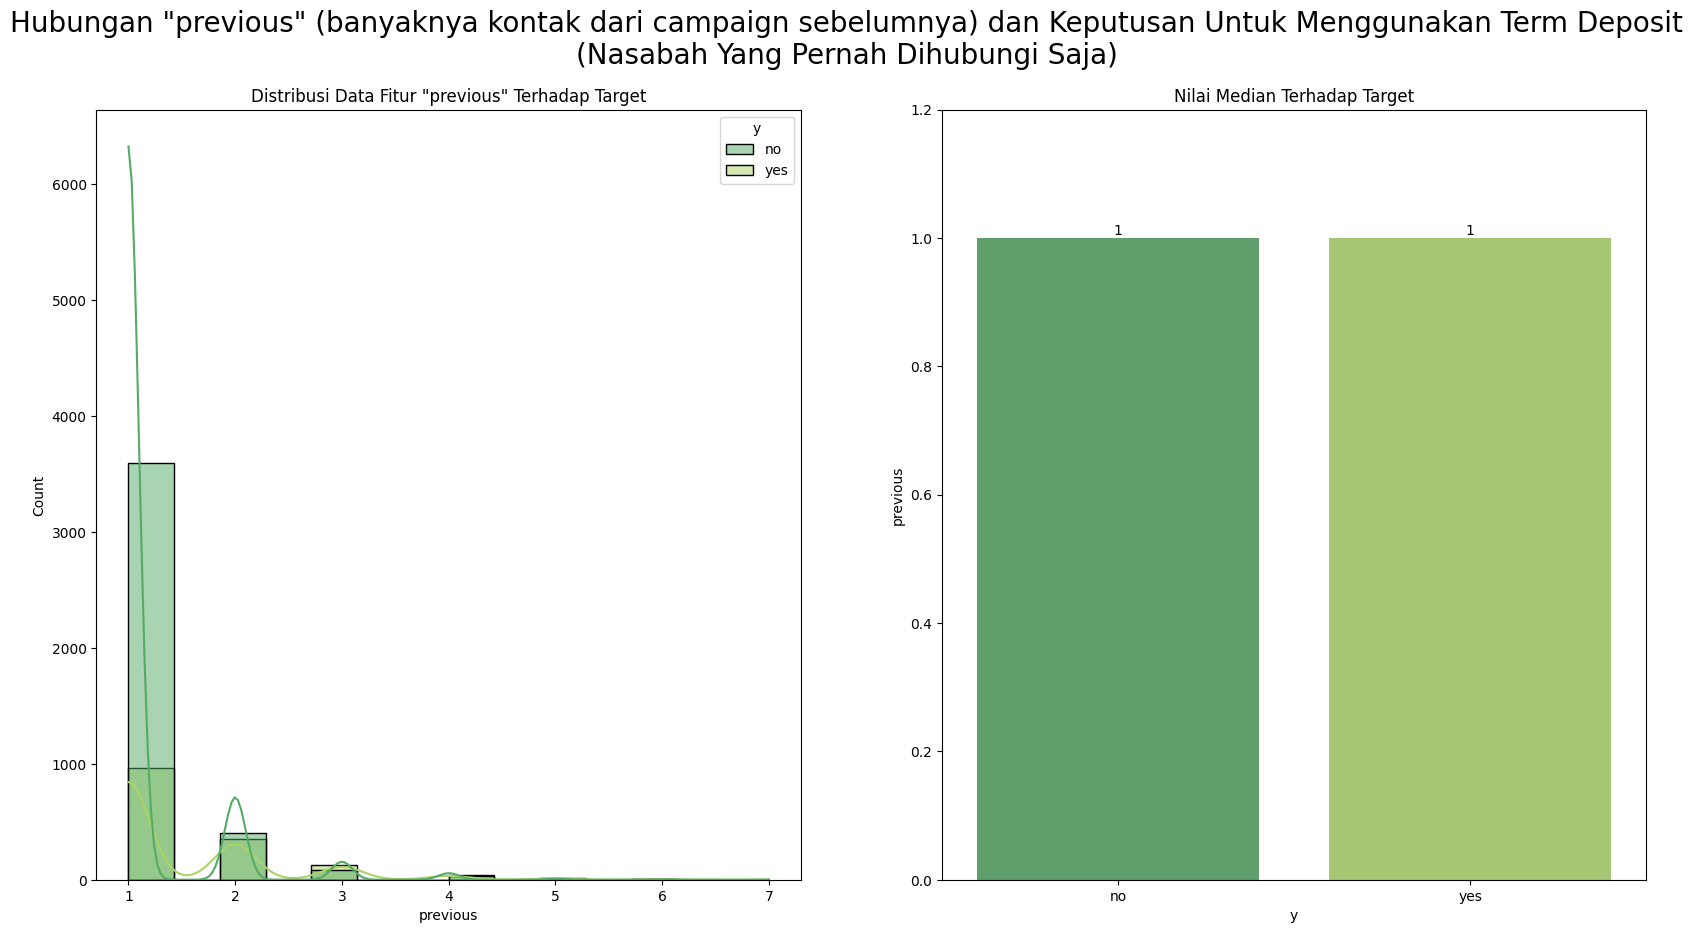

In [157]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target (exclude "0")

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,10))

plt.suptitle('Hubungan "previous" (banyaknya kontak dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit\n(Nasabah Yang Pernah Dihubungi Saja)', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "previous" Terhadap Target')
plot1=sns.histplot(data = df[df['previous'] != 0], hue = 'y', x = df[df['previous'] != 0]['previous'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'previous', data = df[df['previous'] != 0], estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 1.2])

plt.show()

__Insight:__

Sama seperti pada grafik sebelumnya. Nilai median terhadap fitur target **sulit untuk dilihat perbedaan nilai median dari jumlah kontak yang dilakukan kepada nasabah yang menggunakan Term Deposit atau tidak**(*hanya menggunakan data nasabah yang pernah dihubungi sebelumnya*). Maka untuk mengetahui apakah nilai median dari fitur `previous` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data previous nasabah yang pernah dihubungi 'Yes' == Distribusi data previous nasabah yang pernah dihubungi 'No'
- Ha : Distribusi data previous nasabah yang pernah dihubungi 'Yes' != Distribusi data previous nasabah yang pernah dihubungi 'No'

In [158]:
# Uji Hipotesis Mann Whitney

df_without0 = df[df['previous'] != 0]

stat, pvalue = mannwhitneyu(
    df_without0[df_without0['y'] == 'yes']['previous'],
    df_without0[df_without0['y'] == 'no']['previous'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "previous" (jumlah kontak terakhir kepada nasabah) pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN
          distribusi data "previous" (jarak kontak terakhir kepada nasabah) pada orang yang menolak melakukan term deposit
          (ditribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`previous`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan** bahkan ketika datanya sudah difilter sebelumnya. Artinya adalah fitur `previous` ini baik masih menggunakan data nasabah yang belum pernah dikontak, maupun nasabah yang sudah pernah dikontak sebelumnya ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.3.4 Fitur `poutcome`**

Kita akan melihat hubungan antar fitur `poutcome` dengan `target`, serta kita akan coba lihat conversion rate (CVR) dari masing-masing kelompok. Conversion Rate (CVR) dalam kasus ini adalah jumlah nasabah yang terkonversi menggunakan Term Deposit dari seluruh data pada kelompok usia tertentu

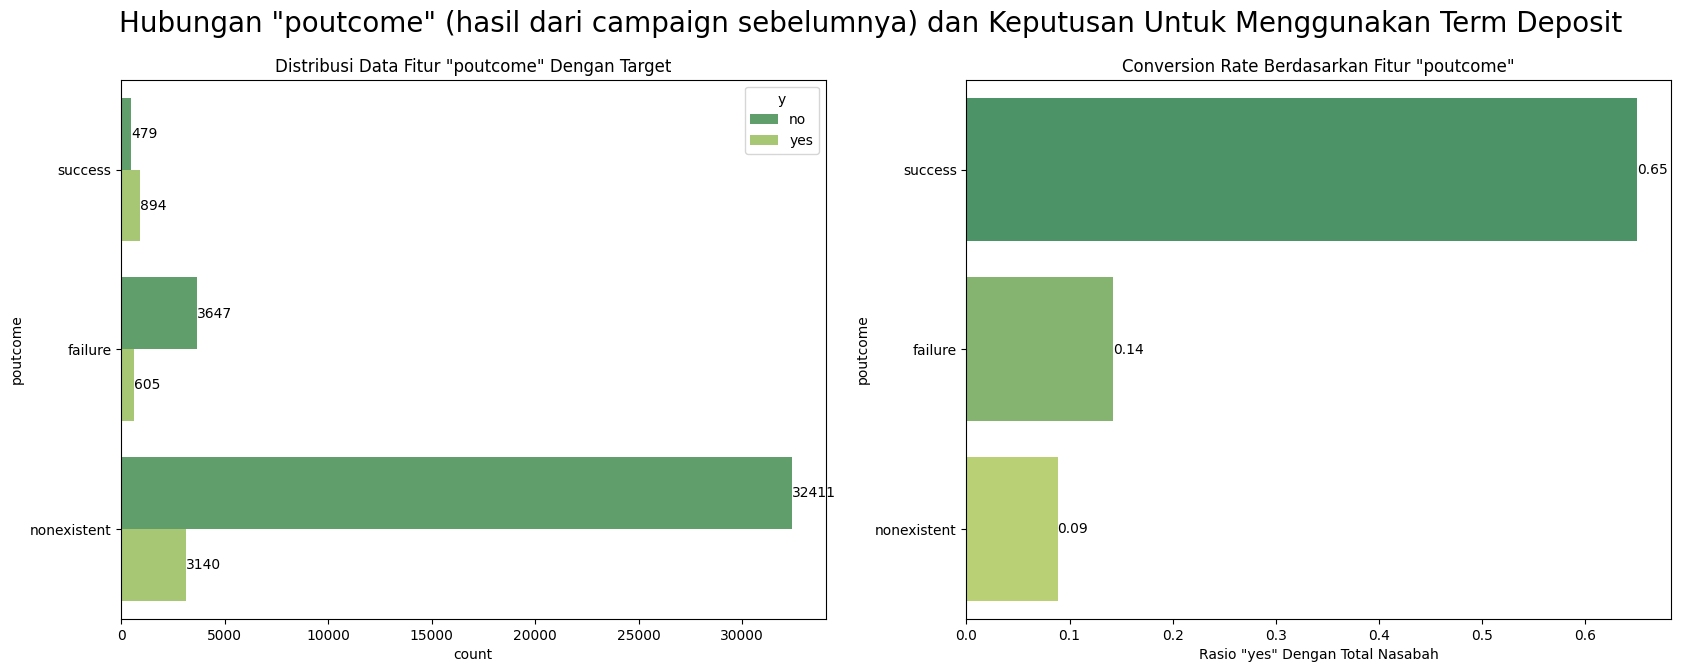

In [159]:
# Visualisasi sebaran data terhadap target serta conversion rate (CVR)

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan "poutcome" (hasil dari campaign sebelumnya) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Conversion Rate
dfratio = df[['poutcome','age']].groupby(['poutcome'],as_index=False).count()
dfratio['y'] = df[df['y'] == 'yes'][['poutcome','age']].groupby(['poutcome']).count().values
dfratio['ratio'] = dfratio['y']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)

# Grafik Distribusi fitur poutcome dengan Target
axes[0].set_title('Distribusi Data Fitur "poutcome" Dengan Target')
plot1=sns.countplot(hue = 'y', y = 'poutcome', data = df, order=dfratio.sort_values(by='ratio',ascending=False)['poutcome'],
                    ax=axes[0],palette="summer")
# Annotation
plot1.bar_label(plot1.containers[0], fontsize=10)
plot1.bar_label(plot1.containers[1], fontsize=10)

# Grafik Conversion Rate
plot2=sns.barplot(data=dfratio, y='poutcome', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['poutcome'],
                  ax=axes[1],palette="summer")
axes[1].set_title('Conversion Rate Berdasarkan Fitur "poutcome"')
# Annotation
plot2.bar_label(plot2.containers[0], fontsize=10, fmt='%.2f')
# Show label
plt.xlabel('Rasio "yes" Dengan Total Nasabah')

plt.show()

__Insight:__
* Kategori terbanyak dari hasil campaign pemasaran sebelumnya ialah **nonexistent (tidak ada)**. Artinya, sebagian besar nasabah merupakan nasabah baru yang belum pernah mendapatkan campaign sebelumnya. Hal ini sesuai dengan analisis beberapa fitur sebelumnya
* Yang perlu diperhatikan disini adalah, nasabah yang sukses pada campaign sebelumnya memiliki CVR tertinggi sebesar **0.65**. Hal ini menandakan bahwa nasabah yang sukses pada campaign sebelumnya ini memiliki kecenderungan yang sangat tinggi untuk menggunakan produk Term Deposit pada campaign berikutnya.

### **3.4 Analisis Data Ekonomi Negara Portugal** (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`)

#### **3.4.1 Fitur `emp.var.rate`**

<Figure size 1500x2000 with 0 Axes>

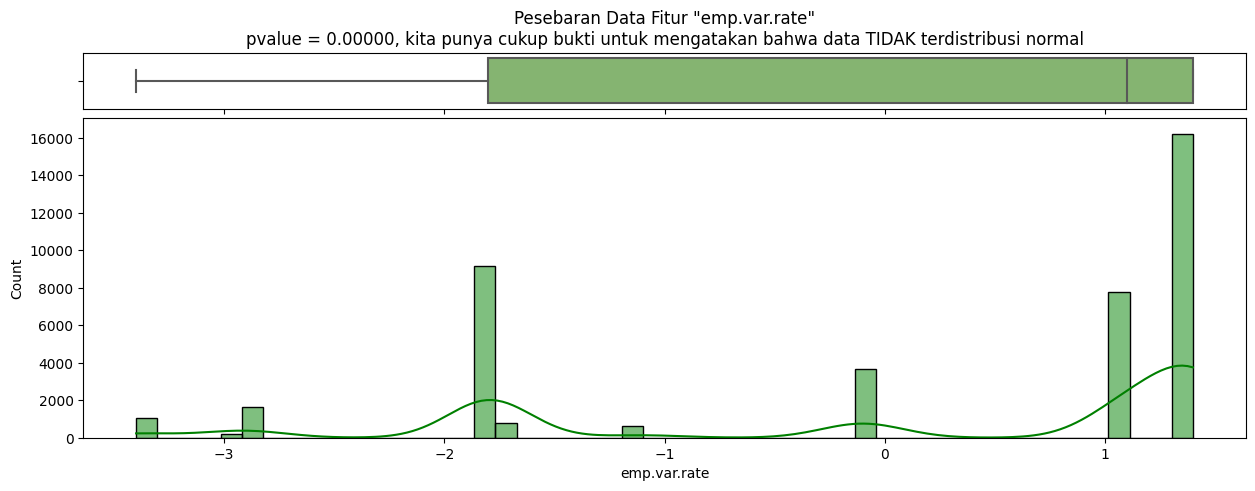

In [160]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["emp.var.rate"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "emp.var.rate"\n{distribusi}""", color = "black")
sns.boxplot(x = df["emp.var.rate"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["emp.var.rate"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

__Insight:__
* Pesebaran data tidak berdistribusi normal, melainkan distribusi nilai condong kanan (Right-Skewed). Hal ini terjadi karena sebagian besar distribusi berada di nilai terendah-nya yaitu rentang usia 30-45 tahun 
* Nasabah yang paling banyak dihubungi ialah nasabah dengan range usia 30-45 tahun. Hal ini menandakan bank menargetkan calon nasabah dengan rentang usia tersebut dengan harapan usia tersebut meruakan usia yang dianggap sudah matang dari sisi finansial dan sedang dalam masa produktif-nya

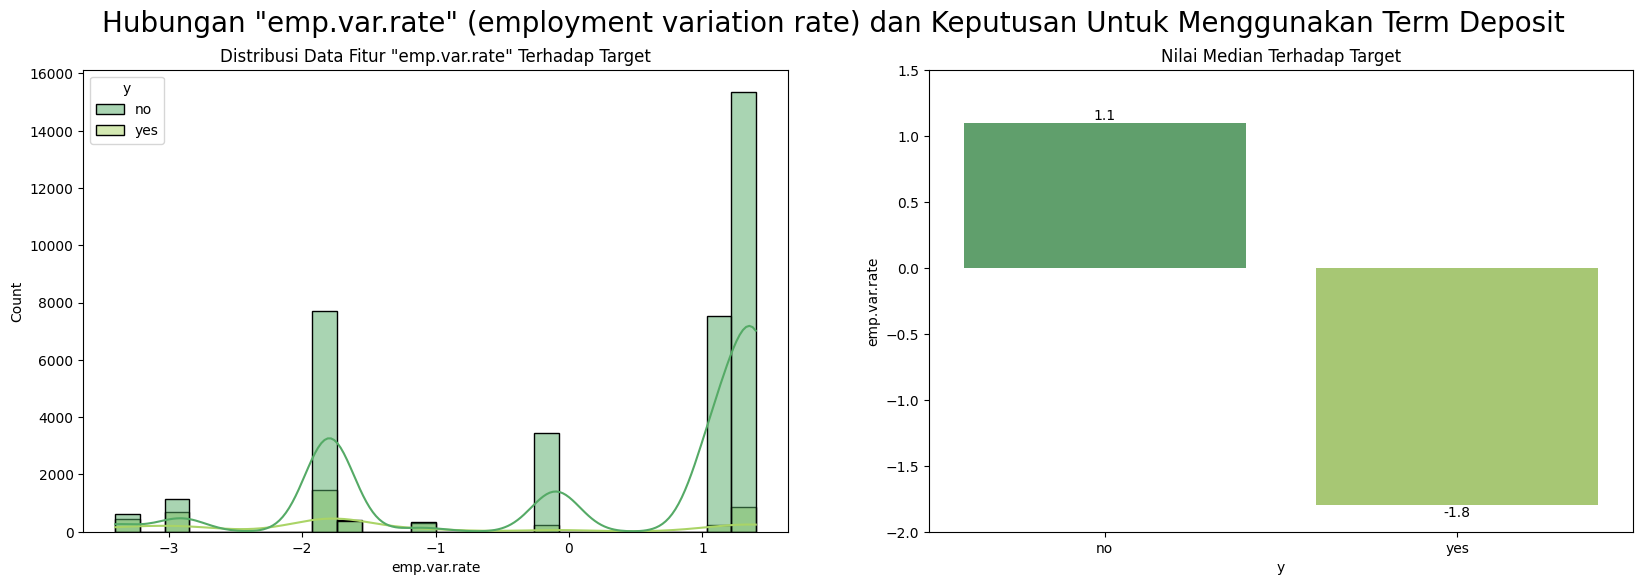

In [161]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "emp.var.rate" (employment variation rate) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "emp.var.rate" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['emp.var.rate'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'emp.var.rate', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([-2, 1.5])

plt.show()

**Insight :**

Dari grafik nilai median terhadap target diatas terlihat jelas bahwa **nasabah akan melakukan/ menggunakan produk Term Deposit ketika indikator variansi penyerapan tenaga kerja sedang bernilai negatif (-1 sampai dengan -3.4)**

#### **3.4.2 Fitur `cons.price.idx`**

<Figure size 1500x2000 with 0 Axes>

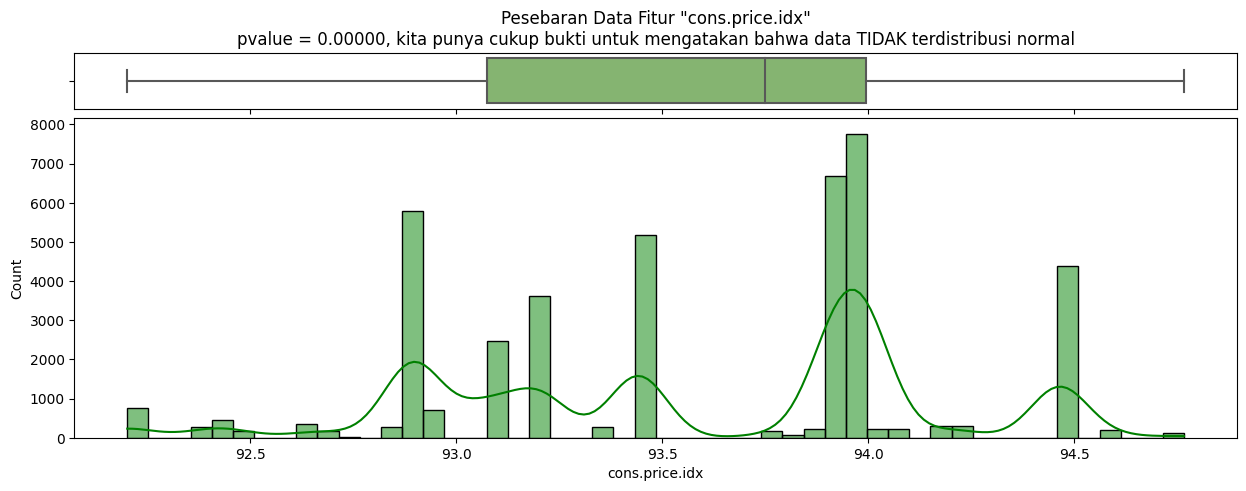

In [162]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["cons.price.idx"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "cons.price.idx"\n{distribusi}""", color = "black")
sns.boxplot(x = df["cons.price.idx"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["cons.price.idx"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

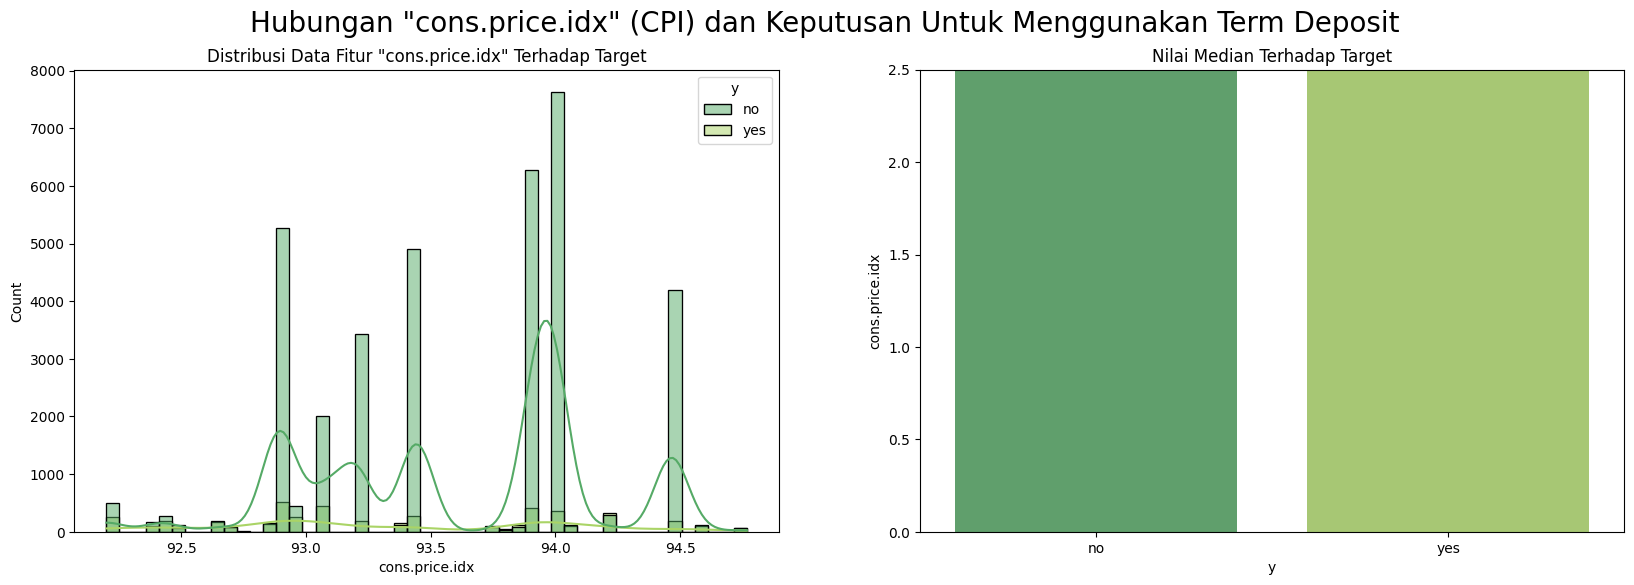

In [163]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "cons.price.idx" (CPI) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "cons.price.idx" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['cons.price.idx'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'cons.price.idx', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 2.5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indeks CPI dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `cons.price.idx` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data cons.price.idx 'Yes' == Distribusi data cons.price.idx 'No'
- Ha : Distribusi data cons.price.idx 'Yes' != Distribusi data cons.price.idx 'No'

In [164]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.price.idx'],
    df[df['y'] == 'no']['cons.price.idx'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.price.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.price.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`cons.price.idx`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `cons.price.idx` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.4.3 Fitur `cons.conf.idx`**

<Figure size 1500x2000 with 0 Axes>

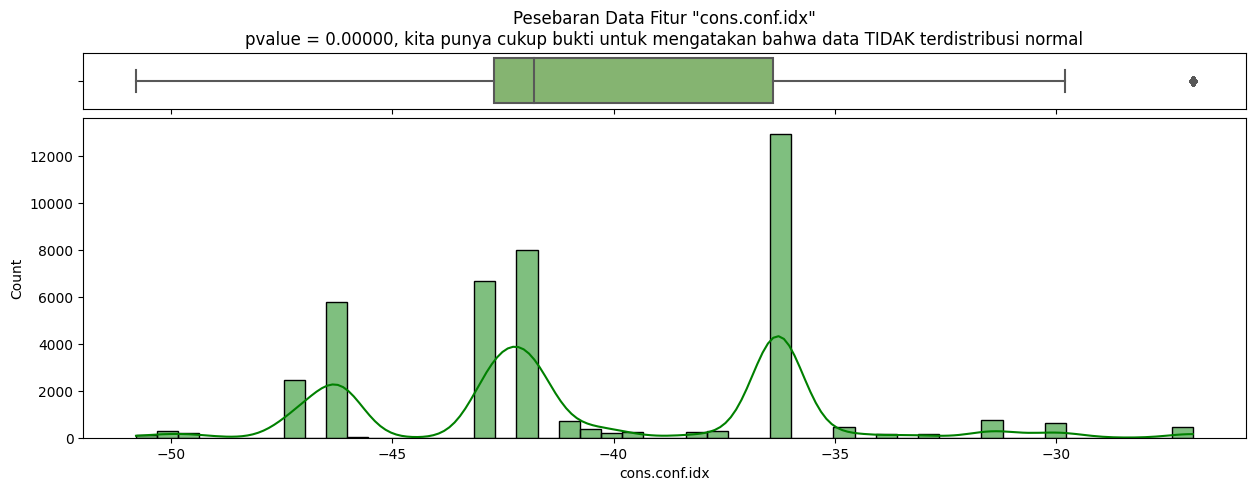

In [165]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["cons.conf.idx"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "cons.conf.idx"\n{distribusi}""", color = "black")
sns.boxplot(x = df["cons.conf.idx"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["cons.conf.idx"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

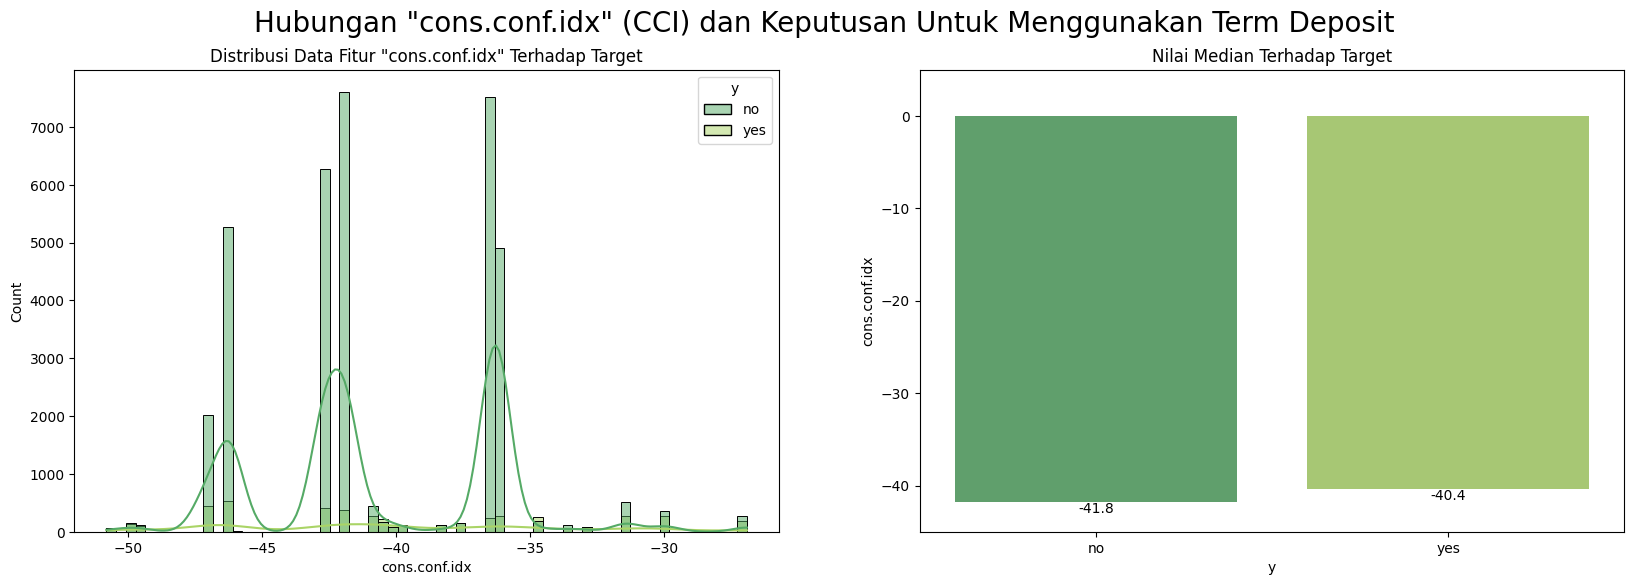

In [166]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "cons.conf.idx" (CCI) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "cons.conf.idx" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['cons.conf.idx'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'cons.conf.idx', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([-45, 5])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indeks CCI dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `cons.conf.idx` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data cons.conf.idx 'Yes' == Distribusi data cons.conf.idx 'No'
- Ha : Distribusi data cons.conf.idx 'Yes' != Distribusi data cons.conf.idx 'No'

In [167]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['cons.conf.idx'],
    df[df['y'] == 'no']['cons.conf.idx'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "cons.conf.idx" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "cons.conf.idx" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`cons.conf.idx`" antara nasabah yang menggunakan Term Deposit dan nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `cons.conf.idx` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

#### **3.4.4 Fitur `euribor3m`**

<Figure size 1500x2000 with 0 Axes>

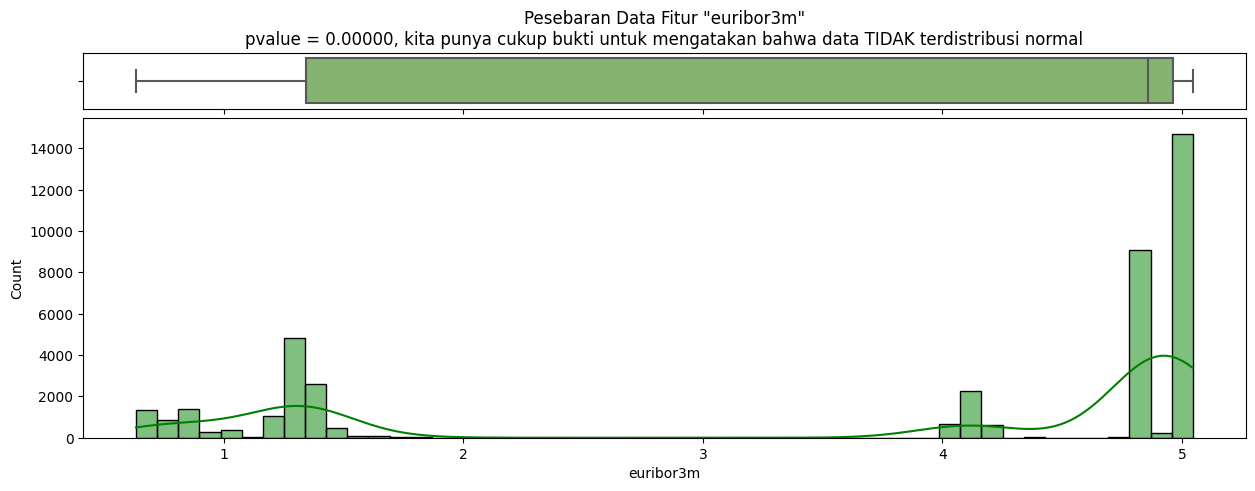

In [168]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["euribor3m"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "euribor3m"\n{distribusi}""", color = "black")
sns.boxplot(x = df["euribor3m"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["euribor3m"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

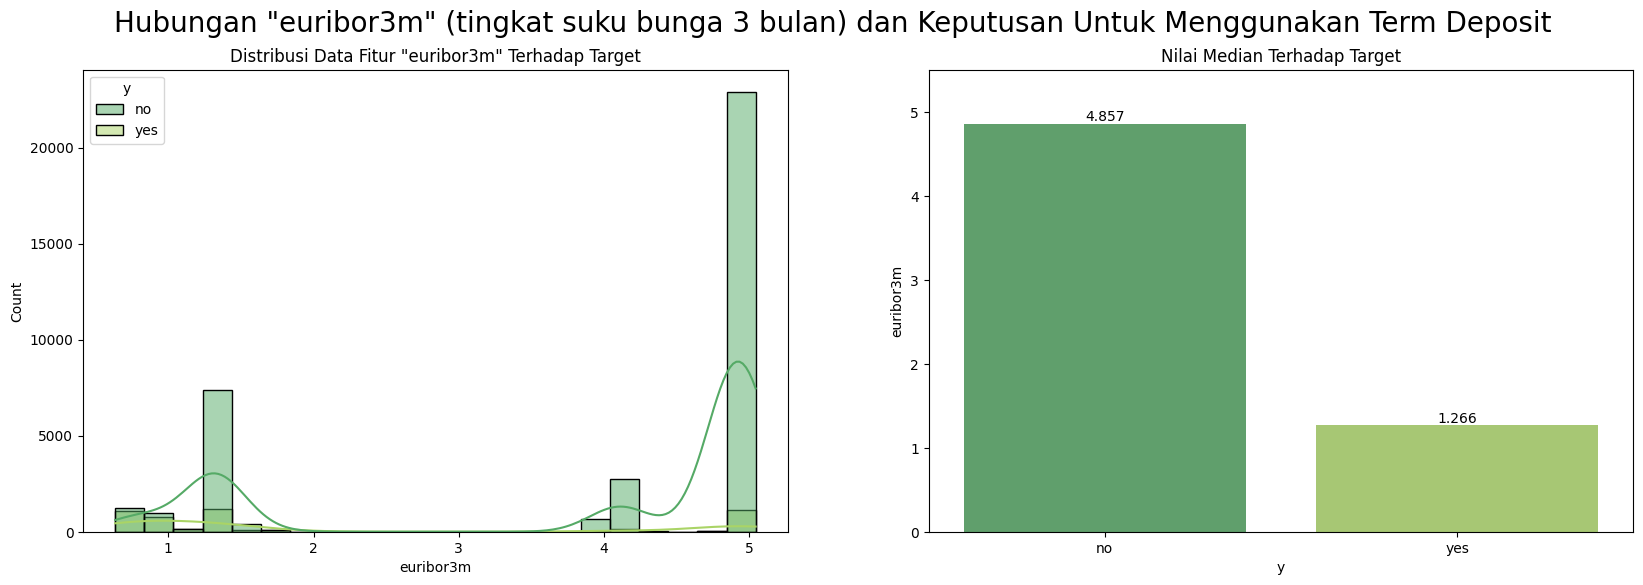

In [169]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "euribor3m" (tingkat suku bunga 3 bulan) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "euribor3m" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['euribor3m'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'euribor3m', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 5.5])

plt.show()

**Insight :**

Dari grafik nilai median terhadap target diatas terlihat jelas bahwa **nasabah akan melakukan/ menggunakan produk Term Deposit ketika ...** 

#### **3.4.5 Fitur `nr.employed`**

<Figure size 1500x2000 with 0 Axes>

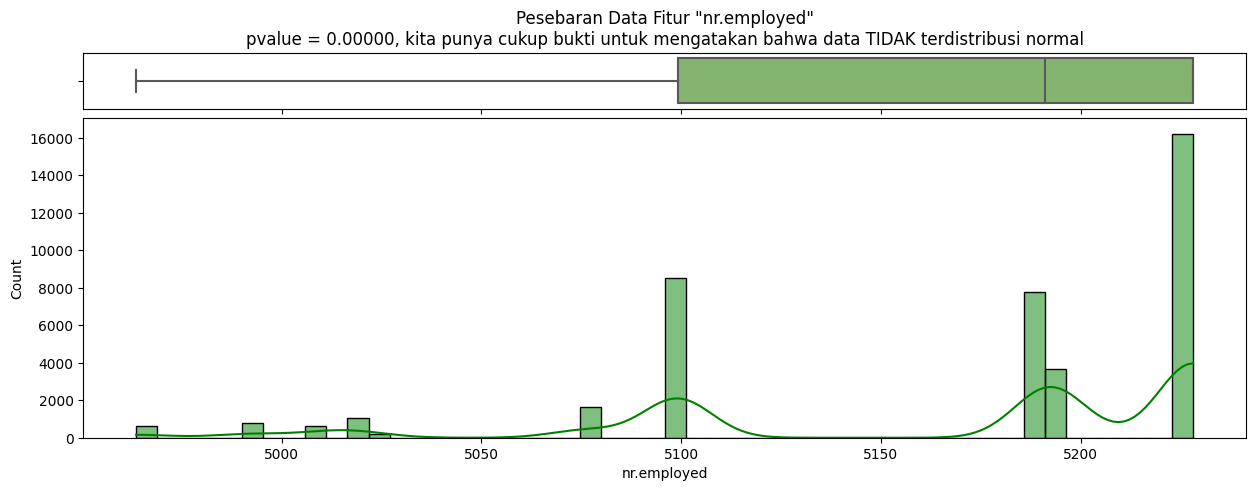

In [170]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Uji Normalitas Data
stat, pvalue = normaltest(df["nr.employed"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax1.set_title(f"""Pesebaran Data Fitur "nr.employed"\n{distribusi}""", color = "black")
sns.boxplot(x = df["nr.employed"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["nr.employed"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()

Sekarang kita akan melihat nilai median dengan targetnya dan visualisasi pesebaran data dengan target

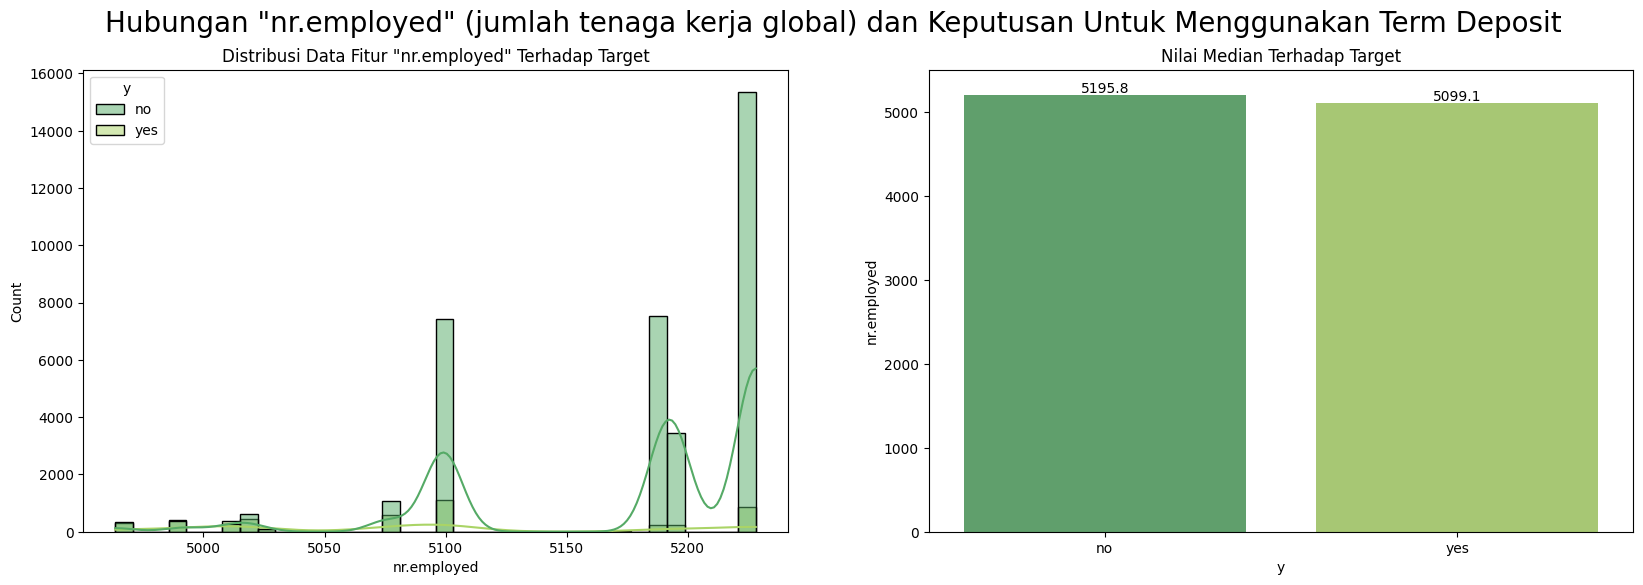

In [171]:
# Visualisasi sebaran data terhadap target dan nilai median dengan target

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,6))

plt.suptitle('Hubungan "nr.employed" (jumlah tenaga kerja global) dan Keputusan Untuk Menggunakan Term Deposit', size = 20)

# Visualisasi sebaran data terhadap target
axes[0].set_title('Distribusi Data Fitur "nr.employed" Terhadap Target')
plot1=sns.histplot(data = df, hue = 'y', x = df['nr.employed'], stat = 'count',
                   ax=axes[0], kde = True, palette="summer")

# Nilai Median terhadap target
axes[1].set_title('Nilai Median Terhadap Target')
plot2=sns.barplot(x = 'y', y = 'nr.employed', data = df, estimator=np.median, ci=0, 
                  ax=axes[1], palette="summer")
plot2.bar_label(plot2.containers[0],label_type='edge')
plot2.set_ylim([0, 5500])

plt.show()

__Insight:__

Dari grafik nilai median terhadap target diatas sulit untuk melihat perbedaan nilai median dari indikator jumlah tenaga kerja global dari nasabah yang menggunakan Term Deposit atau tidak. Maka untuk mengetahui apakah nilai median dari fitur `nr.employed` terhadap target berbeda signifikan atau tidak, kita akan menguji hipotesis tersebut menggunakan uji hipotesis Mann Whitney. [Mann Whitney](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) digunakan untuk membandingkan perbedaan antara dua kelompok independen ketika variabel dependennya ordinal atau kontinu dan tidak terdistribusi normal

Kita akan melakukan uji Mann Whitney dengan hipotesis awal sebagai berikut:

**Hipotesis:**

- Ho : Distribusi data nr.employed 'Yes' == Distribusi data nr.employed 'No'
- Ha : Distribusi data nr.employed 'Yes' != Distribusi data nr.employed 'No'

In [172]:
# Uji Hipotesis Mann Whitney

stat, pvalue = mannwhitneyu(
    df[df['y'] == 'yes']['nr.employed'],
    df[df['y'] == 'no']['nr.employed'],
    alternative = 'two-sided'
)
pvalue

# conclusion:
if pvalue > 0.05 :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue > 0.05 (Gagal menolak Ho)
          
          Kita TIDAK PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data tidak berbeda signifikan)
          ''')
else :
    print(f'''
          Nilai pvalue = {pvalue:.5f}
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          ''')


          Nilai pvalue = 0.00000
          pvalue <= 0.05 (Berhasil menolak Ho)
          
          Kita PUNYA cukup bukti untuk mengatakan bahwa distribusi data "nr.employed" pada orang yang setuju untuk term deposit TIDAK SAMA DENGAN 
          distribusi data "nr.employed" pada orang yang menolak melakukan term deposit
          (distribusi data berbeda signifikan)
          


__Insight:__

Dari uji Mann Whitney diatas, dapat kita ambil kesimpulan bahwa **kita punya cukup bukti untuk mengatakan bahwa distribusi data "`nr.employed`" antara nasabah yang menggunakan Term Deposit dam nasabah yang tidak menggunakan Term Deposit berbeda signifikan**. Artinya adalah fitur `nr.employed` ini dapat berpengaruh pada keputusan nasabah dalam mengambil/ menggunakan produk Term Deposit atau tidak pada campaign sebelumnya

### **3.5 Summary EDA**

Berdasarkan dari analisis yang telah kita lakukan sebelumnya, dapat memberikan beberapa kesimpulan atau ringkisan sebagai berikut:

* ubawf
* waosd

Kesimpulan diatas juga dapat meningkatkan conversion rate (CVR) dari setiap fitur, dan diharapkan juga dapat meningkatkan keuntungan dari bank tersebut

## **`4. Data Preprocessing`**

Pada bagian `Data Preprocessing` ini, kita akan melakukan beberapa treatment pada dataset yang kita miliki agar sesuai dengan kebutuhan model machine learning yang akan digunakan. Tahap ini sangat penting dalam membangun model machine learning karena dapat mempengaruhi kinerja dan kualitas model yang akan dihasilkan. Treatment yang akan dilakukan pada dataset ini adalah sebagai berikut:

### **4.1 Handling Missing Value**

In [173]:
# Cek Missing Value
df.isna().sum()

age               0
age_range         0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
call_category     0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Berdasarkan informasi yang didapatkan pada dataset, didapatkan bahwa semua missing value pada dataset diganti dengan suatu data dengan nilai 'unknown'. Untuk, dapat melihat distribusi pada nilai 'unknown' maka semua data unknown akan diubah menajadi np.nan kemudian dilihat distribusi datanya.

In [174]:
# Mengubah semua nilai 'unknown' menjadi np.nan
for i in df.columns :
    df[i] = np.where(df[i]=='unknown', np.nan, df[i])

<Axes: >

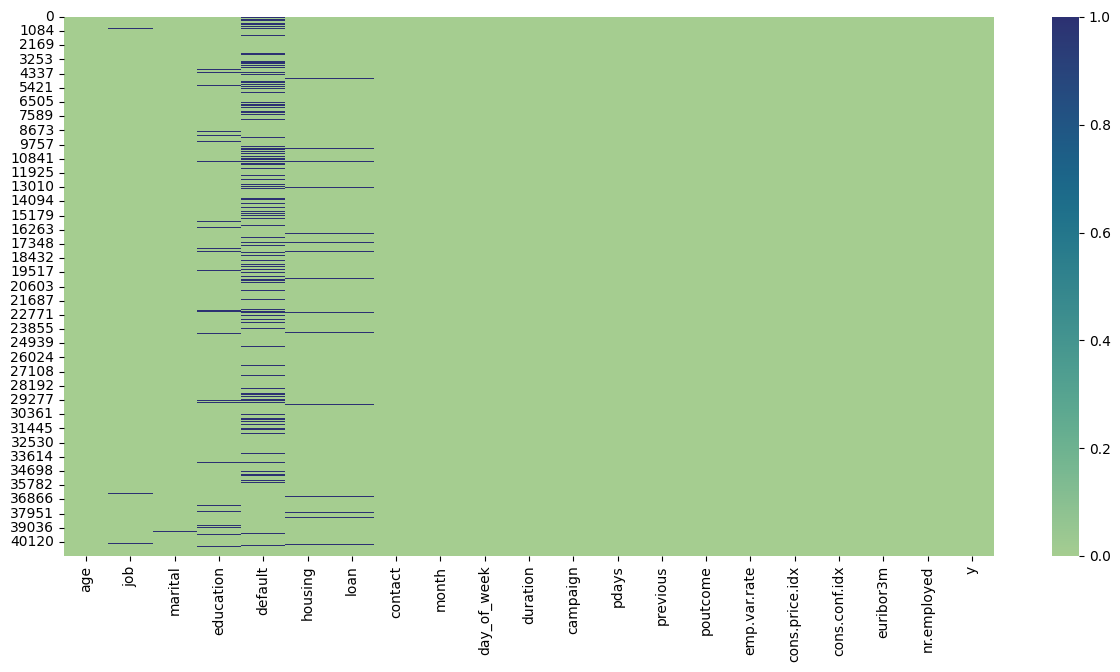

In [175]:
# Sebaran missing value di dalam data
plt.figure(figsize=(15,7))
sns.heatmap(df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].isna(), cmap="crest")

In [176]:
# Cek Missing Value
df.isna().sum()

age                  0
age_range            0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
call_category        0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Pada proses selanjutnya kita akan handing missing value yang bernilai `unknown`

In [177]:
# Mengisi missing Value dengan data 'unknown'
df=df.fillna('unknown')

##### **4.1.1 Handling `unknown` in `job`**

In [178]:
# Grouping kategori kolom job
def grouping(x):
    if x == 'admin.':
        return 'Employee'
    elif x == 'blue-collar':
        return 'Employee'
    elif x == 'entrepreneur':
        return 'Entrepreneur'
    elif x == 'housemaid':
        return 'Employee'
    elif x == 'management':
        return 'Employee'
    elif x == 'retired':
        return 'Other'
    elif x == 'self-employed':
        return 'Entrepreneur'
    elif x == 'services':
        return 'Employee'
    elif x == 'student':
        return 'Other'
    elif x == 'technician':
        return 'Employee'
    elif x == 'unemployed':
        return 'Unemployed'
    else:
        return 'Other'

df['job'] = df['job'].apply(lambda x: grouping(x))

In [179]:
# Menghitung kategori di setiap kolom job
df.job.value_counts()

Employee        34362
Other            2923
Entrepreneur     2877
Unemployed       1014
Name: job, dtype: int64

Pada kolom `job` kita kelompokkan menjadi 4 kategori pekerjaan. Yaitu `admin`, `blue-collar`, `housemaid`, `management`, `services`, `technician` dikelompokkan menjadi kategori `Employee`. Selanjutnya `entrepreneur`, `self-employed` dikelompokkan menjadi kategori `Entrepreneur`. Selanjutnya `retired`, `unknown` dikelompokkan menjadi kategori `Other`, dan `unemployed` tetap menjadi kategori `Unemployed`. Pengelompokan ini berdasarkan domain knowledge, dan [informasi](https://simpedak.blitarkota.go.id/buku_data/jenis_pekerjaan) yang kita dapat.

##### **4.1.2 Handling `unknown` in `marital`**

In [180]:
# Menghitung kategori di setiap kolom marital
df.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [181]:
# Menghapus nilai unknown pada kolom marital
df = df[df['marital'] != 'unknown']

In [182]:
# Menghitung kategori di setiap kolom marital
df.marital.value_counts()

married     24921
single      11564
divorced     4611
Name: marital, dtype: int64

Nilai `unknown` pada kolom `marital` di hapus karena presentasenya yang sedikit.

##### **4.1.3 Handling `unknown` in `education`**

In [183]:
# Menghitung kategori di setiap kolom education
df.education.value_counts()

university.degree      12133
high.school             9498
basic.9y                6037
professional.course     5234
basic.4y                4170
basic.6y                2285
unknown                 1721
illiterate                18
Name: education, dtype: int64

In [184]:
# Grouping kategori kolom education
def grouping(x):
    if x == 'basic.4y':
        return 'Primary Education'
    elif x == 'basic.6y':
        return 'Primary Education'
    elif x == 'basic.9y':
        return 'Primary Education'
    elif x == 'high.school':
        return 'Secondary Education'
    elif x == 'illiterate':
        return 'Other'
    elif x == 'professional.course':
        return 'Secondary Education'
    elif x == 'university.degree':
        return 'Higher Education'
    else:
        return 'Other'

df['education'] = df['education'].apply(lambda x: grouping(x))

In [185]:
df.education.unique()

array(['Primary Education', 'Secondary Education', 'Other',
       'Higher Education'], dtype=object)

In [186]:
# Menghitung kategori di setiap kolom education
df.education.value_counts()

Secondary Education    14732
Primary Education      12492
Higher Education       12133
Other                   1739
Name: education, dtype: int64

Pada kolom `education` kita kelompokkan menjadi 4 kategori. Yaitu `basic.4y`, `basic.6y`, `basic.9y` dikelompokkan menjadi kategori `Primary Education`. Selanjutnya `high.school`, `professional.course` dikelompokkan menjadi kategori `Secondary Education`. Selanjutnya `illiterate`, `unknown` dikelompokkan menjadi kategori `Other`, dan `university.degree` menjadi kategori `Higher Education`. Pengelompokan ini mengacu pada informasi [expatica.com](https://www.expatica.com/pt/education/children-education/the-education-system-in-portugal-105195/).

##### **4.1.4 Handling `unknown` in `default`**

In [187]:
# Menghitung kategori di setiap kolom default
df.default.value_counts()

no         32508
unknown     8585
yes            3
Name: default, dtype: int64

In [188]:
# Menghapus nilai yes pada kolom default
df = df[df['default'] != 'yes']

In [189]:
# Merubah nilai unknown menjadi kategori no
def grouping(x):
    if x == 'no':
        return 'no'
    else:
        return 'no'

df['default'] = df['default'].apply(lambda x: grouping(x))

In [190]:
# Menghitung kategori di setiap kolom default
df.default.value_counts()

no    41093
Name: default, dtype: int64

Pada kolom `default` kita menghapus nilai `yes` karena jumalah datanya hanya 3 dan dari ketiganya tidak ada yang berlangganan deposito. Selanjutnya kita mengelompokkan nilai `unknown` menjadi nilai `no`, dengan asumsi semua calon nasabah tidak ada yang gagal bayar kredit, hal ini tentu akan menjadi `limitasi untuk model` yang nantinya dibangun. Dengan semua nilainya menjadi `no` maka selanjutnya kolom `default` tidak digunakan sebagai fitur pada pemodelan machine learning. Selanjutnya bila di kemudian hari terdapat pelanggan yang mengalami kredit macet akan diprioritaskan untuk menulasi terlebih dahulu, dan tidak diprioritaskan untuk calon nasabah program term deposit. Hal ini akan di jelaskan lebih lanjut di `limitasi model`.

##### **4.1.5 Handling `unknown` in `housing`**

In [191]:
# Menghitung kategori di setiap kolom housing
df.housing.value_counts()

yes        21535
no         18569
unknown      989
Name: housing, dtype: int64

In [192]:
# Menghapus nilai unknown pada kolom housing
df = df[df['housing'] != 'unknown']

In [193]:
# Menghitung kategori di setiap kolom housing
df.housing.value_counts()

yes    21535
no     18569
Name: housing, dtype: int64

Nilai `unknown` pada kolom `housing` di hapus karena jumlahnya yang sedikit.

##### **4.1.6 Handling `unknown` in `loan`**

In [194]:
# Menghitung kategori di setiap kolom loan
df.loan.value_counts()

no     33868
yes     6236
Name: loan, dtype: int64

Nilai `unknown` pada kolom `loan` sudah ikut terhapus karena nilai `unknown` pada kolom `loan` berkaitan atau memiliki pola yang sama dengan nilai `unknown` pada kolom `housing`. 

### **4.2 Handling Data Duplicated**

In [195]:
# Cek Duplicate
print(f"Jumlah duplikasi data: {df[df.duplicated()].shape}")

Jumlah duplikasi data: (10, 23)


Dari keterangan tersebut terdapat 12 duplikasi data, dan akan dilakukan drop duplikasi

In [196]:
# Drop Duplicate
df = df.drop_duplicates(keep='last', ignore_index=True)

In [197]:
# Cek Duplicate
print(f"Jumlah duplikasi data: {df[df.duplicated()].shape}")

Jumlah duplikasi data: (0, 23)


Sekarang, 12 duplikasi data telah di hapus agar analisis tidak menjadi bias

### **4.3 Handling Outlier**

In [198]:
numerical_features_model = df.describe().columns

In [199]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features_model: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features_model,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

Kolom      Lower      Upper  # Lower  # Inside  # Upper  % Outlier
0             age     9.5000    69.5000        0     39635      459       1.14
1        duration  -225.0000   647.0000        0     37228     2866       7.15
2        campaign    -2.0000     6.0000        0     37759     2335       5.82
3           pdays   999.0000   999.0000     1476     38618        0       3.68
4        previous     0.0000     0.0000        0     34628     5466      13.63
5    emp.var.rate    -6.6000     6.2000        0     40094        0       0.00
6  cons.price.idx    91.6965    95.3725        0     40094        0       0.00
7   cons.conf.idx   -52.1500   -26.9500        0     39662      432       1.08
8       euribor3m    -4.0815    10.3865        0     40094        0       0.00
9     nr.employed  4905.6000  5421.6000        0     40094        0       0.00

Dari tabel diatas dapat dilihat terdapat 5 kolom numerikal pada fitur yang memiliki outlier, yaitu kolom `age` sebanyak `1.12%` outlier, kolom `campaign` sebanyak `5.84%` outlier, kolom `pdays` sebanyak `3.68%` outlier, kolom `previous` sebanyak `13.66%` outlier, dan kolom `cons.conf.idx` sebanyak `1.08%` outlier.

#### **4.3.1 Proporsi Pada Dataset**

In [200]:
df['y'].value_counts()/len(df)

no     0.887265
yes    0.112735
Name: y, dtype: float64

Data ini termasuk pada kategori moderate imbalance (minority class between 1% - 20%). Sekarang, mari kita lihat proporsi kelas pada setiap data outlier :

#### **4.3.2 Proporsi data pada kolom age**

<Axes: xlabel='age'>

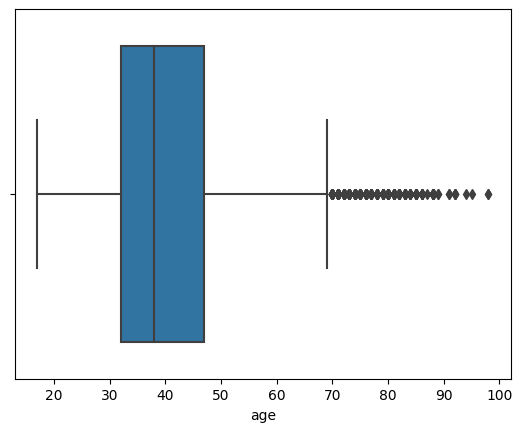

In [201]:
sns.boxplot(x=df["age"])

<Axes: xlabel='y', ylabel='age'>

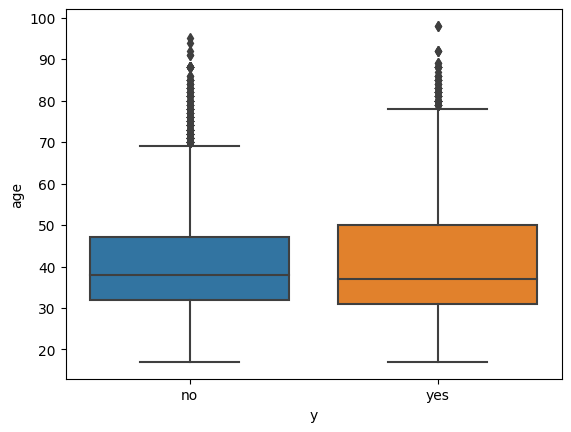

In [202]:
sns.boxplot(data=df, y="age", x="y")

In [203]:
# proporsi target untuk data outlier pada kolom age
df[df['age']>69.5]['y'].value_counts()/len(df[df['age']>69.5]) * 100

no     52.723312
yes    47.276688
Name: y, dtype: float64

Dari informasi diatas terlihat perbandingan nasabah yang berlangganan deposito dan tidak deposito pada outlier kolom `age`. Di putuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini diperkuat dengan tidak ada batasan usia ketika orang akan berlangganan deposito. Karena deposito di hari tua juga sangat mungkin dan deposito tersebut dapat di wariskan nantinya. [Link](https://www.cnbcindonesia.com/mymoney/20230820192755-72-464463/udah-tahu-belum-6-aset-ini-bisa-diwariskan-secara-gratis#:~:text=Tabungan%20dan%20Deposito,berbeda%2Dbeda%20untuk%20setiap%20bank)

#### **4.3.3 Proporsi data pada kolom campaign**

<Axes: xlabel='campaign'>

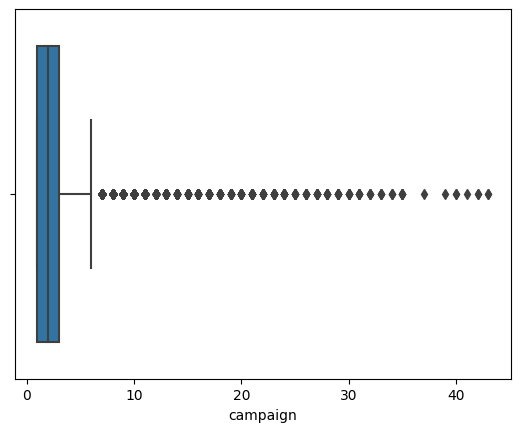

In [204]:
sns.boxplot(x=df["campaign"])

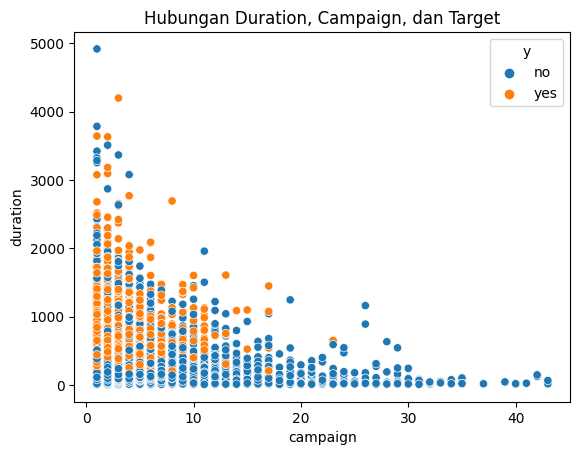

In [205]:
plt.title('Hubungan Duration, Campaign, dan Target')
sns.scatterplot(data=df, x = 'campaign', y = 'duration', hue='y')
plt.show()

In [206]:
# proporsi target untuk data outlier pada kolom campaign
df[df['campaign']>6]['y'].value_counts()/len(df[df['campaign']>6]) * 100

no     95.331906
yes     4.668094
Name: y, dtype: float64

In [207]:
# Cek campaign > 20
df[df['campaign'] > 20].count()['campaign']

154

In [208]:
# Melakukan filtering pada data
df = df[(df['campaign'] < 20)]

Dari informasi diatas dapat dilihat bahwa setelah 20 kali melakukan kontak, hanya 1 nasabah yang akhirnya melakukan deposit. Dari sini nilai outlier pada kolom `campaign` yang nilainya lebih besar dari 20 akan dihapuskan.

#### **4.3.4 Proporsi data pada kolom pdays**

<Axes: xlabel='pdays'>

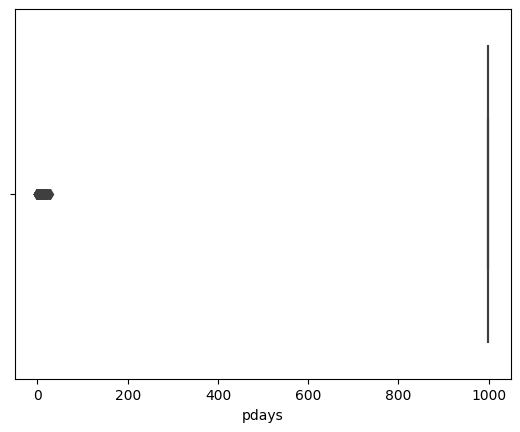

In [209]:
sns.boxplot(x=df["pdays"])

In [210]:
# proporsi target untuk data outlier pada kolom pdays
df[df['pdays']<999]['y'].value_counts()/len(df[df['pdays']<999]) * 100

yes    63.617886
no     36.382114
Name: y, dtype: float64

Pada kolom `pdays` diputuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini terjadi karena pada boxplot, lower dan upper berada di angka 999, dimana nilai 999 adalah nasabah yang tidak pernah dihubungi sebelumnya, yang artinya 90% customer pada dataset tidak mengikuti promo sebelumnya, sehingga tentu saja customer yang merupakan outlier merupakan customer yang mengikuti promo sebelumnya yang dimana informasi itu sangat penting       

#### **4.3.5 Proporsi data pada kolom previous**

<Axes: xlabel='previous'>

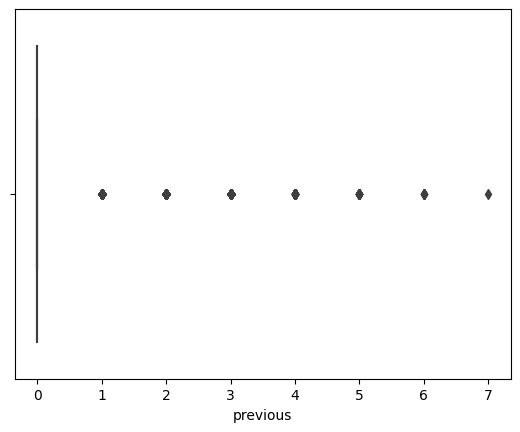

In [211]:
sns.boxplot(x=df["previous"])

In [212]:
# proporsi target untuk data outlier pada kolom previous
df[df['previous']>0]['y'].value_counts()/len(df[df['previous']>0]) * 100

no     73.45408
yes    26.54592
Name: y, dtype: float64

Dari informasi diatas diputuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini juga terjadi karena pada boxplot, lower dan upper berada di angka 0 yang artinya 85% customer pada dataset tidak mengikuti promo sebelumnya, sehingga tentu saja customer yang merupakan outlier merupakan customer yang mengikuti promo sebelumnya yang dimana informasi itu sangat penting

#### **4.3.6 Proporsi data pada kolom cons.conf.idx**

<Axes: xlabel='cons.conf.idx'>

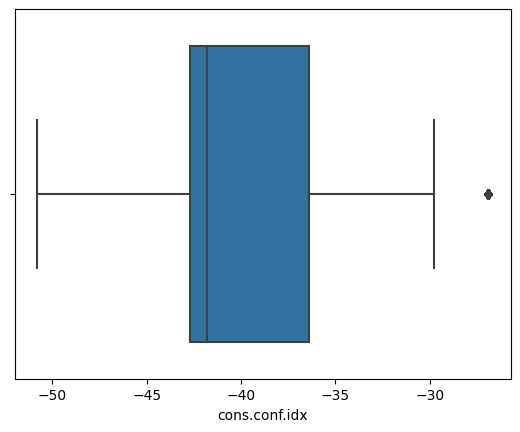

In [213]:
sns.boxplot(x=df["cons.conf.idx"])

<Axes: xlabel='y', ylabel='cons.conf.idx'>

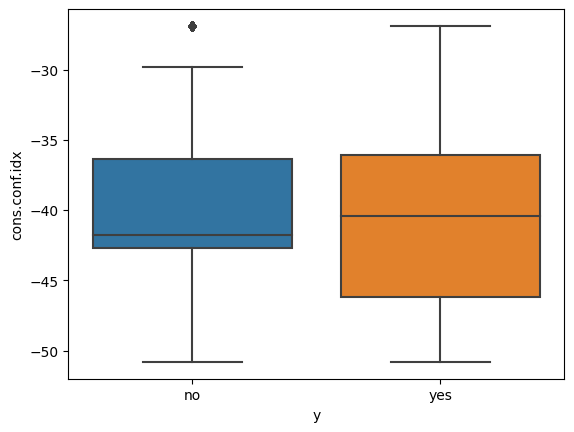

In [214]:
sns.boxplot(data=df, y="cons.conf.idx", x="y")

In [215]:
# proporsi target untuk data outlier pada kolom cons.conf.idx
df[df['cons.conf.idx']>-26.95]['y'].value_counts()/len(df[df['cons.conf.idx']>-26.95]) * 100

no     59.722222
yes    40.277778
Name: y, dtype: float64

Dari informasi diatas terlihat perbandingan nasabah yang berlangganan deposito dan tidak deposito pada outlier kolom `cons.conf.idx`. Karena proporsi pada outlier tidak jauh berbeda dibandingkan dengan proporsi dataset awal, hal ini berarti outlier tersebut memiliki informasi penting sehingga diputuskan untuk `tidak menghapus outlier` manapun dengan harapan memiliki performa model yang baik.

### **4.4 Drop Columns and Change Value**

#### **4.4.1 Drop Columns**

In [216]:
df.columns

Index(['age', 'age_range', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'call_category',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [217]:
df = df.drop(columns=['age_range', 'default', 'duration', 'call_category'])

In [218]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [219]:
# mengganti value pada kolom job yaitu admin. menjadi admin
df['job'] = df['job'].replace('admin.', 'admin')

#### **4.4.2 Change Value**

In [220]:
df = df.rename(columns={'y' : 'deposit'})

In [221]:
df['deposit'] = np.where(df['deposit'] == 'yes',1,0)

In [222]:
df.head()

age       job  marital            education housing loan    contact month  \
0  56.0  Employee  married    Primary Education      no   no  telephone   may   
1  57.0  Employee  married  Secondary Education      no   no  telephone   may   
2  37.0  Employee  married  Secondary Education     yes   no  telephone   may   
3  40.0  Employee  married    Primary Education      no   no  telephone   may   
4  56.0  Employee  married  Secondary Education      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       1.0  999.0       0.0  nonexistent           1.1   
1         mon       1.0  999.0       0.0  nonexistent           1.1   
2         mon       1.0  999.0       0.0  nonexistent           1.1   
3         mon       1.0  999.0       0.0  nonexistent           1.1   
4         mon       1.0  999.0       0.0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  deposit  
0          93.994          -36.4      4.857       5191.0        0  
1          93.994          -36.4      4.857       5191.0        0  
2          93.994          -36.4      4.857       5191.0        0  
3          93.994          -36.4      4.857       5191.0        0  
4          93.994          -36.4      4.857       5191.0        0

### **4.7 Data Splitting**, bagi dataset menjadi df_seen dan df_unseen

In [223]:
# Melakukan data splitting

# Membagi feature dan target
feature=df.drop(columns=['deposit']).columns
target='deposit'

# Membagi dataset df_seen dan df_unseen dari dataset df
df_seen, df_unseen=train_test_split(df,
                                    stratify=df["deposit"].values, 
                                    test_size=0.2,random_state=0)

# Membagi dataset train dan validation dari df_seen
X_train, X_val, y_train, y_val=train_test_split(df_seen[feature], df_seen[target], 
                                                stratify=df_seen["deposit"].values, 
                                                test_size=0.2, random_state=0)

print(f"df_seen\nJumlah baris: {df_seen.shape[0]} baris\nJumlah kolom: {df_seen.shape[1]} kolom\n")
print(f"df_unseen\nJumlah baris: {df_unseen.shape[0]} baris\nJumlah kolom: {df_unseen.shape[1]} kolom\n")
print("=========================")
print(f"\nX_train\nJumlah baris: {X_train.shape[0]} baris\nJumlah kolom: {X_train.shape[1]} kolom\n")
print(f"X_val\nJumlah baris: {X_val.shape[0]} baris\nJumlah kolom: {X_val.shape[1]} kolom")

df_seen
Jumlah baris: 31928 baris
Jumlah kolom: 19 kolom

df_unseen
Jumlah baris: 7982 baris
Jumlah kolom: 19 kolom


X_train
Jumlah baris: 25542 baris
Jumlah kolom: 18 kolom

X_val
Jumlah baris: 6386 baris
Jumlah kolom: 18 kolom


### **4.5 Scaling and Encoding**

#### **4.5.1 Scaling**

[Scaling](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#83e6) adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama

Teknik scaling yang dilakukan dalam tahap preprocessing ini akan menggunakan teknik **`Robust Scaler`**. [Robust scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) ini sendiri adalah salah satu teknik yang digunakan untuk mengubah skala atau transformasi data agar cocok untuk digunakan dalam model machine learning. Dimana Robust Scaler ini digunakan ketika kita memiliki dataset yang mengandung outlier, karena teknik ini tidak terpengaruh oleh nilai ekstrem, dan teknik ini cocok digunakan ketika data tidak mengikuti distribusi normal. Namun teknik ini memiliki kekurangan yaitu teknik ini tidak mengubah distribusi data menjadi distribusi normal. Berikut kita akan menerapkan teknik Robust Scaler kedalam dataset yang kita miliki

In [224]:
# data unik di tiap kolom

numeric_features  = df.describe().columns
numeric_features = numeric_features.drop('deposit')

Cara kerja dari teknik `Robust Scaler` ini ialah akan mengubah skala data dengan menggunakan nilai median dan IQR dari data

#### **4.5.2 Encoding**

[Encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02) adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Berikut kita akan menerapkan dan mendefinisikan metode teknik encoding yang sesuai dengan data yang kita miliki

In [225]:
# data unik di tiap kolom

listItem = []
for col in df.describe(include='object').columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

df_object = pd.DataFrame(columns=['feature', 'n_unique', 'sample_unique'],
                     data=listItem)
df_object

feature  n_unique  \
0          job         4   
1      marital         3   
2    education         4   
3      housing         2   
4         loan         2   
5      contact         2   
6        month        10   
7  day_of_week         5   
8     poutcome         3   

                                                       sample_unique  
0                        [Employee, Entrepreneur, Other, Unemployed]  
1                                        [divorced, married, single]  
2  [Higher Education, Other, Primary Education, Secondary Education]  
3                                                          [no, yes]  
4                                                          [no, yes]  
5                                              [cellular, telephone]  
6                 [apr, aug, dec, jul, jun, mar, may, nov, oct, sep]  
7                                          [fri, mon, thu, tue, wed]  
8                                    [failure, nonexistent, success]

__Insight:__
* Akan dilakukan **Ordinal Encoding** untuk fitur `education`, `month`, dan `day_of_week`. Alasan memilih **Ordinal Encoding** karena fitur-fitur tersebut memiliki variabel ordinal atau variabel yang memiliki skala urutan yang penting. **Ordinal encoding** akan memberikan nilai unik kepada setiap kategori berdasarkan posisinya dalam urutannya
* Akan dilakukan **One Hot Encoding** untuk fitur `housing`, `loan`, `contact` dan `poutcome`, `job`, dan `marital`. Alasan dipilihnya **One Hot Encoding** dari pada **Binary Encoding** adalah karena jumlah kategori fitur yang akan kita lakukan encoding tersebut jumlahnya masih sedikit, sehingga ita tidak perlu menggunakan **Binary Encoding** 

Langkah pertama adalah kita akan mengurutkan nilai dari fitur `education`, `month`, dan `day_of_week` berdasarkan tingkatannya, kemudian kita akan memberikan nomor pada masing-masing nilai berdasarkan tingkatannya tersebut (ordinal mapping), sebagai berikut:

In [226]:
# Mmebuat Ordinal mapping

ordinal_mapping = [
    {'col':'education',
    'mapping':{
        'Primary Education' : 0, 
        'Secondary Education' : 1, 
        'Higher Education': 2, 
        'Other' : -1,
    }},
    {'col':'month',
    'mapping':{
        'mar' : 0,
        'apr' : 1,
        'may' : 2,
        'jun' : 3,
        'jul' : 4,
        'aug' : 5,
        'sep' : 6,
        'oct' : 7,
        'nov' : 8,
        'dec' : 9,
    }},
    {'col':'day_of_week',
    'mapping':{
        'mon' : 0, 
        'tue' : 1, 
        'wed' : 2, 
        'thu' : 3,
        'fri' : 4,
    }}
]

In [227]:
# Define encoder

# One Hot Encoding
onehot_features = ['housing', 'loan', 'contact', 'poutcome', 'job', 'marital']

# Ordinal Encoding
ordinal_features = ['education', 'month', 'day_of_week']

Cara kerja **encoding** adalah dengan menggantikan nilai-nilai kategori dengan representasi numerik sesuai dengan teknik encoding yang dipilih. Hal ini memungkinkan algoritma machine learning untuk bekerja dengan data kategorikal dan memahami hubungan antara kategori tersebut. Untuk dapat memahami cara kerja dari masing-masing teknik encoding diatas, dapat dicek [disini](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

#### **4.5.3 Menggabungkan Transformasi dan Fit Transform**

In [228]:
# encoding features menggunakan teknik-teknik Encoding

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), onehot_features),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ordinal_features)
], remainder='passthrough')

In [229]:
# transformer = preprocessor.fit(X_train)
# X_transformer = transformer.transform(X_train)

In [230]:
testing = pd.DataFrame(preprocessor.fit_transform(df_seen),columns=preprocessor.get_feature_names_out())
testing.head()

onehot__housing_yes  onehot__loan_yes  onehot__contact_telephone  \
0                  1.0               0.0                        0.0   
1                  0.0               1.0                        0.0   
2                  0.0               0.0                        0.0   
3                  0.0               0.0                        0.0   
4                  0.0               0.0                        0.0   

   onehot__poutcome_nonexistent  onehot__poutcome_success  \
0                           0.0                       1.0   
1                           1.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           1.0                       0.0   

   onehot__job_Entrepreneur  onehot__job_Other  onehot__job_Unemployed  \
0                       0.0                1.0                     0.0   
1                       0.0                0.0                     0.0   
2                       0.0                0.0                     0.0   
3                       0.0                0.0                     0.0   
4                       0.0                0.0                     0.0   

   onehot__marital_married  onehot__marital_single  ...  remainder__age  \
0                      0.0                     0.0  ...            78.0   
1                      0.0                     1.0  ...            31.0   
2                      1.0                     0.0  ...            35.0   
3                      1.0                     0.0  ...            45.0   
4                      0.0                     1.0  ...            31.0   

   remainder__campaign  remainder__pdays  remainder__previous  \
0                  1.0               3.0                  1.0   
1                  3.0             999.0                  0.0   
2                  2.0             999.0                  0.0   
3                  2.0             999.0                  0.0   
4                  9.0             999.0                  0.0   

   remainder__emp.var.rate  remainder__cons.price.idx  \
0                     -3.4                     92.649   
1                     -1.8                     92.893   
2                     -0.1                     93.200   
3                     -1.8                     92.893   
4                      1.4                     93.444   

   remainder__cons.conf.idx  remainder__euribor3m  remainder__nr.employed  \
0                     -30.1                 0.714                  5017.5   
1                     -46.2                 1.266                  5099.1   
2                     -42.0                 4.191                  5195.8   
3                     -46.2                 1.291                  5099.1   
4                     -36.1                 4.962                  5228.1   

   remainder__deposit  
0                 0.0  
1                 0.0  
2                 1.0  
3                 0.0  
4                 0.0  

[5 rows x 23 columns]

## **`5. Modeling and Hyperparameter Tuning`**

### **5.1 Modeling**, choose the best banchmark model

#### **5.1.1 Model Experiment**

Models experiment yang akan kita coba sebagai penentuan model terbaik untuk dataset ini antara lain **Logistic Regression**, **KNearest Neighbour Classifier**, **Decision Tree Classifier**, **Random Forest Classifier**, **Bagging Classifier**, **Ada Boost Classifier**, **Gradient Boosting Classifier**, **XGB Classifier**, **LGBM Classifier**, dan **SVM**.

In [231]:
# Mendefinisikan models yang akan digunakan

# Logistic Regression
logreg = LogisticRegression(random_state=0)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
dt = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
ada = AdaBoostClassifier(random_state=0)

# Gradientboost
gbc = GradientBoostingClassifier(random_state=0)

# CatBoosting
catboost = CatBoostClassifier(random_state=0, verbose=False)

In [234]:
# hyperparameter default

# Pilihan model yang akan digunakan
models = [logreg,knn,dt,rf,ada,gbc,catboost]

# Precision
scorePrec=[]
rataPrec=[]
stdPrec=[]

# Recall
scoreRecall=[]
rataRecall=[]
stdRecall=[]

# ROC_AUC
scoreROC_AUC=[]
rataROC_AUC=[]
stdROC_AUC=[]


for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('Models',i)])
   
    # Matriks Precision
    modelCVPrec=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring="precision")
    scorePrec.append(modelCVPrec)
    rataPrec.append(modelCVPrec.mean())
    stdPrec.append(modelCVPrec.std())

    # Matriks Recall
    modelCVRec=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring="recall")
    scoreRecall.append(modelCVRec)
    rataRecall.append(modelCVRec.mean())
    stdRecall.append(modelCVRec.std())
   
    # Matriks ROC_AUC
    modelCVROC_AUC=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring="roc_auc")
    scoreROC_AUC.append(modelCVROC_AUC)
    rataROC_AUC.append(modelCVROC_AUC.mean())
    stdROC_AUC.append(modelCVROC_AUC.std())


df_ros = pd.DataFrame({'Models':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'Cat Boosting'],
            
              'Mean Precision':rataPrec,
              'Std Precision':stdPrec,

              'Mean Recall':rataRecall,
              'Std Recall':stdRecall,

              'Mean ROC_AUC':rataROC_AUC,
              'Std ROC_AUC':stdROC_AUC
              }
            ).set_index('Models').sort_values(by='Mean ROC_AUC',ascending=False)

df_ros

Mean Precision  Std Precision  Mean Recall  Std Recall  \
Models                                                                        
Gradient Boosting          0.658781       0.032583     0.237550    0.015697   
Cat Boosting               0.602977       0.034692     0.265210    0.013053   
Ada Boosting               0.666788       0.048159     0.217498    0.005767   
Random Forest              0.533360       0.022644     0.285960    0.021682   
Logistic Regression        0.705832       0.054416     0.195024    0.012297   
KNN                        0.512162       0.022114     0.278002    0.017095   
Decision Tree              0.301637       0.020437     0.329871    0.022733   

                     Mean ROC_AUC  Std ROC_AUC  
Models                                          
Gradient Boosting        0.795332     0.004151  
Cat Boosting             0.794650     0.004661  
Ada Boosting             0.787244     0.006123  
Random Forest            0.771272     0.006198  
Logistic Regression      0.756487     0.009505  
KNN                      0.729581     0.006800  
Decision Tree            0.621068     0.014914

Dari hasil *hyperparameter default* diatas dapat kita dapat lihat bahwa model yang memiliki nilai tertinggi pada Precision, Recall, dan PR_AUC adalah ***`Gradient Boosting`*** sebesar **0.795**, dan nilai std nya juga kecil yaitu **0.004151**. Maka model ***`Gradient Boosting`*** akan menjadi pilihan model

In [237]:
# Optimasi model benchmark

models = [logreg,knn,dt,rf,ada,gbc,catboost]
score_ROC_AUC = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model_catboost',i)])
    X_train,X_val
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_val),X_val)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada', 'Gradient Boosting', 'CatBoosting']):
    estimator,y_pred,X_val = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_val)[:,1]

    # Score ROC_AUC
    score_ROC_AUC.append(roc_auc_score(y_val,y_predict_proba))
    print(j,'\n', classification_report(y_val,y_pred))
    
df_ros_test = pd.DataFrame({'Models':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada', 'Gradient Boosting', 'CatBoosting'],
            'ROC_AUC score':score_ROC_AUC}).set_index('Models').sort_values(by='ROC_AUC score',ascending=False)
df_ros_test

Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5663
           1       0.68      0.19      0.29       723

    accuracy                           0.90      6386
   macro avg       0.79      0.59      0.62      6386
weighted avg       0.88      0.90      0.87      6386

KNN 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      5663
           1       0.50      0.28      0.36       723

    accuracy                           0.89      6386
   macro avg       0.70      0.62      0.65      6386
weighted avg       0.87      0.89      0.87      6386

Decision Tree 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5663
           1       0.28      0.33      0.30       723

    accuracy                           0.83      6386
   macro avg       0.60      0.61      0.60      6386
weighted avg       0.84      0

ROC_AUC score
Models                            
CatBoosting               0.803386
Gradient Boosting         0.800223
Ada                       0.797057
Random Forest             0.776825
Logistic Regression       0.767910
KNN                       0.736506
Decision Tree             0.610644

Dari data diatas dapat dilihat kembali untuk model ***`Cat Boosting`*** dan ***`Gradient Boosting`*** merupakan model dengan **ROC_AUC** tertinggi yaitu 0.803386 dan 0.800223. Sehingga step selanjutnya kita coba meningkatkan performa dengan melakukan *tuning hyperparameter* pada ***Cat Boosting*** dan membandingkan performanya kembali 

Dari tabel diatas, dapat kita lihat bahwa ketiga model diatas merupakan **model terbaik dengan nilai tertinggi**, sehingga kita selanjutnya akan menggunakan model `Cat Boosting` dan `Gradient Boosting` untuk dijadikan model yang akan dituning pada proses Hyperparameter Tuning

### **5.2 Hyperparameter Tuning**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `...`, `...`, dan `...`, dengan harapan model lebih optimal.

#### **5.2.1 model ...**

In [ ]:

# Settings pipeline
Pipe_... = Pipeline([('preprocess', transformer), ('model_...', ...)]) 
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Searching for the best parameters using Grid Search.
hyperparam_... = {
    'model_...__learning_rate': list(np.arange(0.01, 0.1)),
    'model_...__iterations': list(np.arange(100, 200, 400)),
    'model_...__depth': list(np.arange(5, 10)),
    'model_...__l2_leaf_reg': list(np.arange(10, 100))
}

..._grid = GridSearchCV(estimator = Pipe_...,
                      param_grid = hyperparam_..., 
                      cv = skfold, 
                      scoring = '...',
                      error_score='raise',
                      verbose = False
                      )

..._grid.fit(X_train,y_train)

In [ ]:
# best params
..._grid.best_params_

In [ ]:
# business_score terbaik
..._grid.best_score_

Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` dengan `n_iter=...` pada model `...` menunjukkan ... score terbaik sebesar `...`.

#### **5.2.2 model ...**

In [ ]:

# Settings pipeline
Pipe_... = Pipeline([('preprocess', transformer), ('model_...', ...)]) 
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Searching for the best parameters using Grid Search.
hyperparam_... = {
    'model_...__learning_rate': list(np.arange(0.01, 0.1)),
    'model_...__iterations': list(np.arange(100, 200, 400)),
    'model_...__depth': list(np.arange(5, 10)),
    'model_...__l2_leaf_reg': list(np.arange(10, 100))
}

..._grid = GridSearchCV(estimator = Pipe_...,
                      param_grid = hyperparam_..., 
                      cv = skfold, 
                      scoring = '...',
                      error_score='raise',
                      verbose = False
                      )

..._grid.fit(X_train,y_train)

In [ ]:
# best params
..._grid.best_params_

In [ ]:
# business_score terbaik
..._grid.best_score_

Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` dengan `n_iter=...` pada model `...` menunjukkan ... score terbaik sebesar `...`.

#### **5.2.3 model ...**

In [ ]:

# Settings pipeline
Pipe_... = Pipeline([('preprocess', transformer), ('model_...', ...)]) 
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Searching for the best parameters using Grid Search.
hyperparam_... = {
    'model_...__learning_rate': list(np.arange(0.01, 0.1)),
    'model_...__iterations': list(np.arange(100, 200, 400)),
    'model_...__depth': list(np.arange(5, 10)),
    'model_...__l2_leaf_reg': list(np.arange(10, 100))
}

..._grid = GridSearchCV(estimator = Pipe_...,
                      param_grid = hyperparam_..., 
                      cv = skfold, 
                      scoring = '...',
                      error_score='raise',
                      verbose = False
                      )

..._grid.fit(X_train,y_train)

In [ ]:
# best params
..._grid.best_params_

In [ ]:
# business_score terbaik
..._grid.best_score_

Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` dengan `n_iter=...` pada model `...` menunjukkan ... score terbaik sebesar `...`.

### **5.3 Summary Hyperparameter Tuning**

In [ ]:
hyperparameter_tuning = [....best_estimator_, ....best_estimator_, ....best_estimator_, ....best_estimator_]

In [ ]:
list_score = []

# Mencari model terbaik berdasarkan business score terbesar dan std terkecil
for algoritma in hyperparameter_tuning :
    

    # fitting
    algoritma.fit(X_train, y_train)

    # predict
    y_pred = algoritma.predict(X_val)

    # evaluate
    score = business_scoring(y_val, y_pred)
    list_score.append(score)

### **5.4 Model Terpilih Ialah ...**

#### **5.4.1 Cara Kerja Model ...**

### **5.5 Interpretasi Model**

#### **5.5.1 Features Importances**

In [ ]:
final_model = ....best_estimator_

In [ ]:
coef1 = pd.Series(best_model["model_..."].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances', colormap="summer")
plt.show()

Dari grafik diatas dapat dilihat faktor yang mempengaruhi potensi nasabah menggunakan produk Term Deposit dari model machine learning yang kita buat. Fitur yang paling penting adalah ***"..."*** (*...*), ***"..."*** (*...*), dan ***"..."*** (*...*). Analisa berikutnya dapat ditingkatkan dengan melakukan *`feature selection`* atau kombinasi dari fitur-fitur yang paling berpengaruh untuk mengurangi kompleksitas model dan dibandingkan dengan model terbaik yang ada sekarang.

#### **5.5.2 SHAP**

In [ ]:
feature_names = transformer.get_feature_names_out()

In [ ]:
X_train_1 = final_model[0:-2].fit_transform(X_train)
X_train_2, y_train_2 = final_model[2].fit_resample(X_train_1,y_train)

In [ ]:
import shap

shap_values = shap.TreeExplainer(final_model[-1],
                                 data = X_train_2,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_2)
                                 
shap.summary_plot(shap_values, X_train_2,feature_names = feature_names)

### **5.6 Model-Based Features Selection**

In [ ]:
# Melakukan drop pada kolom yang dianggap tidak signifikan
X_train_filtered = X_train.drop(columns=['previous','housing','loan'])
X_test_filtered = X_test.drop(columns=['previous','housing','loan'])

## **`Conclusion and Recommendation`**

### **Conclusion**

### **Recommendation**

### **Save Model**

In [ ]:
final_model.fit(X,y)

In [ ]:
final_model.fit(X,y)

In [ ]:
pickle.dump(final_model, open('Model_final.sav','wb'))

In [ ]:
model_loaded = pickle.load(open('Model_final.sav','rb'))

## **`# CATATAN`**

<Figure size 1500x2000 with 0 Axes>

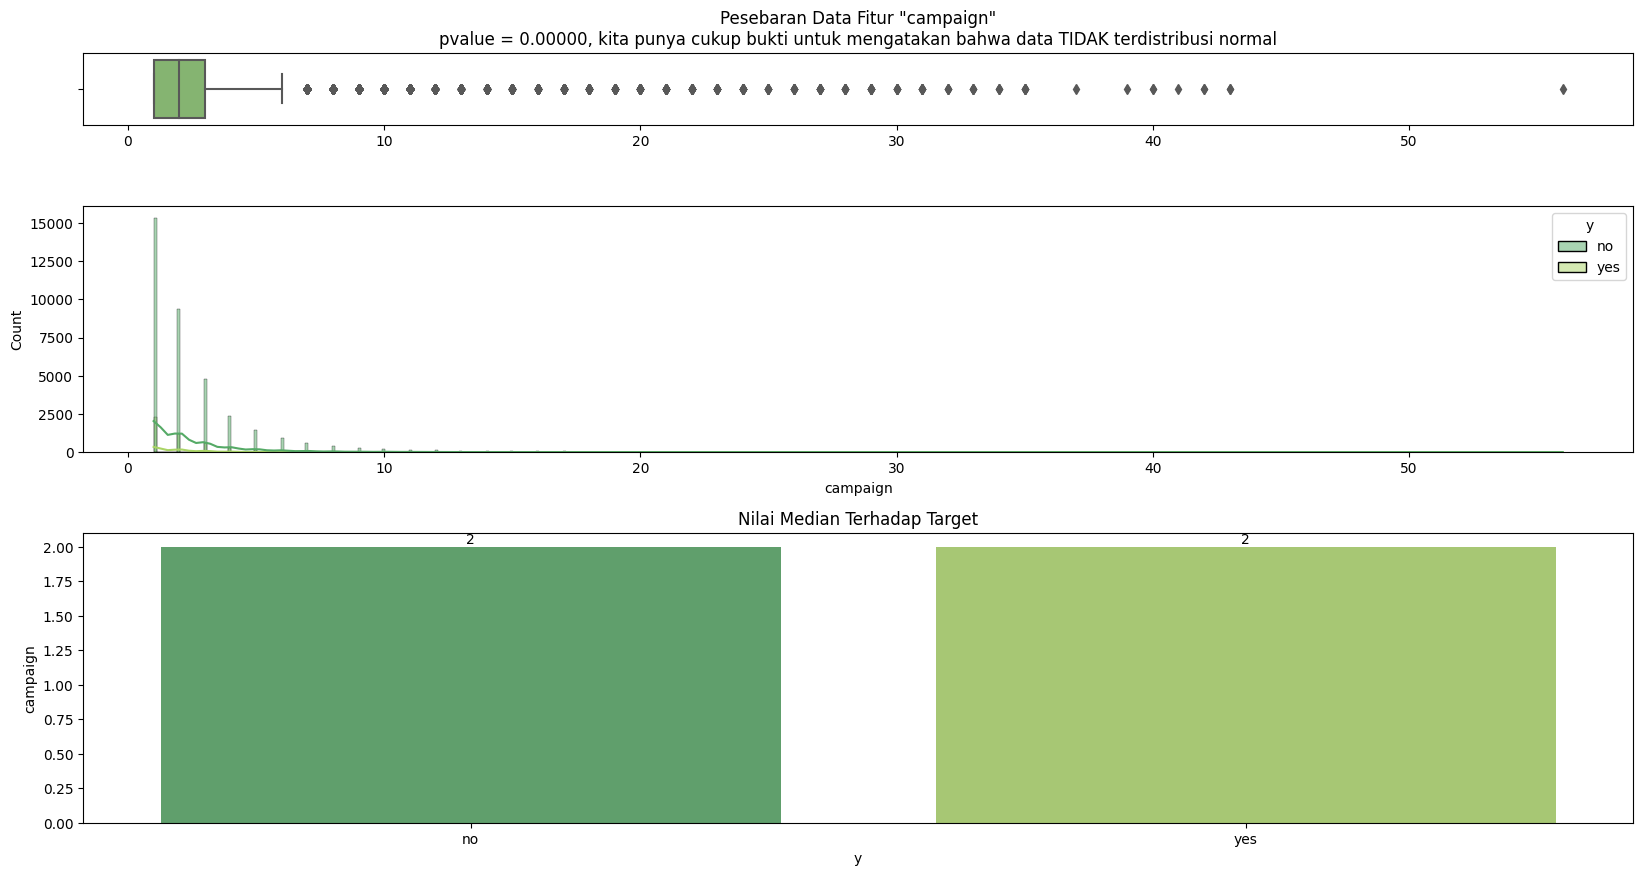

In [ ]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, ax = plt.subplots(3, 1, figsize = (20,10),
                       gridspec_kw={"height_ratios": (0.25, 0.85, 1),
                       "hspace": 0.4})

# Uji Normalitas Data
stat, pvalue = normaltest(df["campaign"].dropna())
if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, kita punya cukup bukti untuk mengatakan bahwa data TIDAK terdistribusi normal'

# Cek Pesebaran Data
ax[0].set_title(f"""Pesebaran Data Fitur "campaign"\n{distribusi}""", color = "black")
sns.boxplot(x = df["campaign"], ax = ax[0], palette="summer")
ax[0].set(xlabel = "")

sns.histplot(data = df, hue = 'y',x = df['campaign'], stat = 'count',
             ax = ax[1], kde = True, palette="summer")

ax[2].set_title('Nilai Median Terhadap Target')
sns.barplot(x = 'y', y = 'campaign', data = df, estimator=np.median, ci=0, 
                  ax=ax[2], palette="summer")
ax[2].bar_label(ax[2].containers[0],label_type='edge')

plt.show()

#### **Numerical variable**

##### **Numerikal Diskrit** (*age, campaign, pdays, previous*)

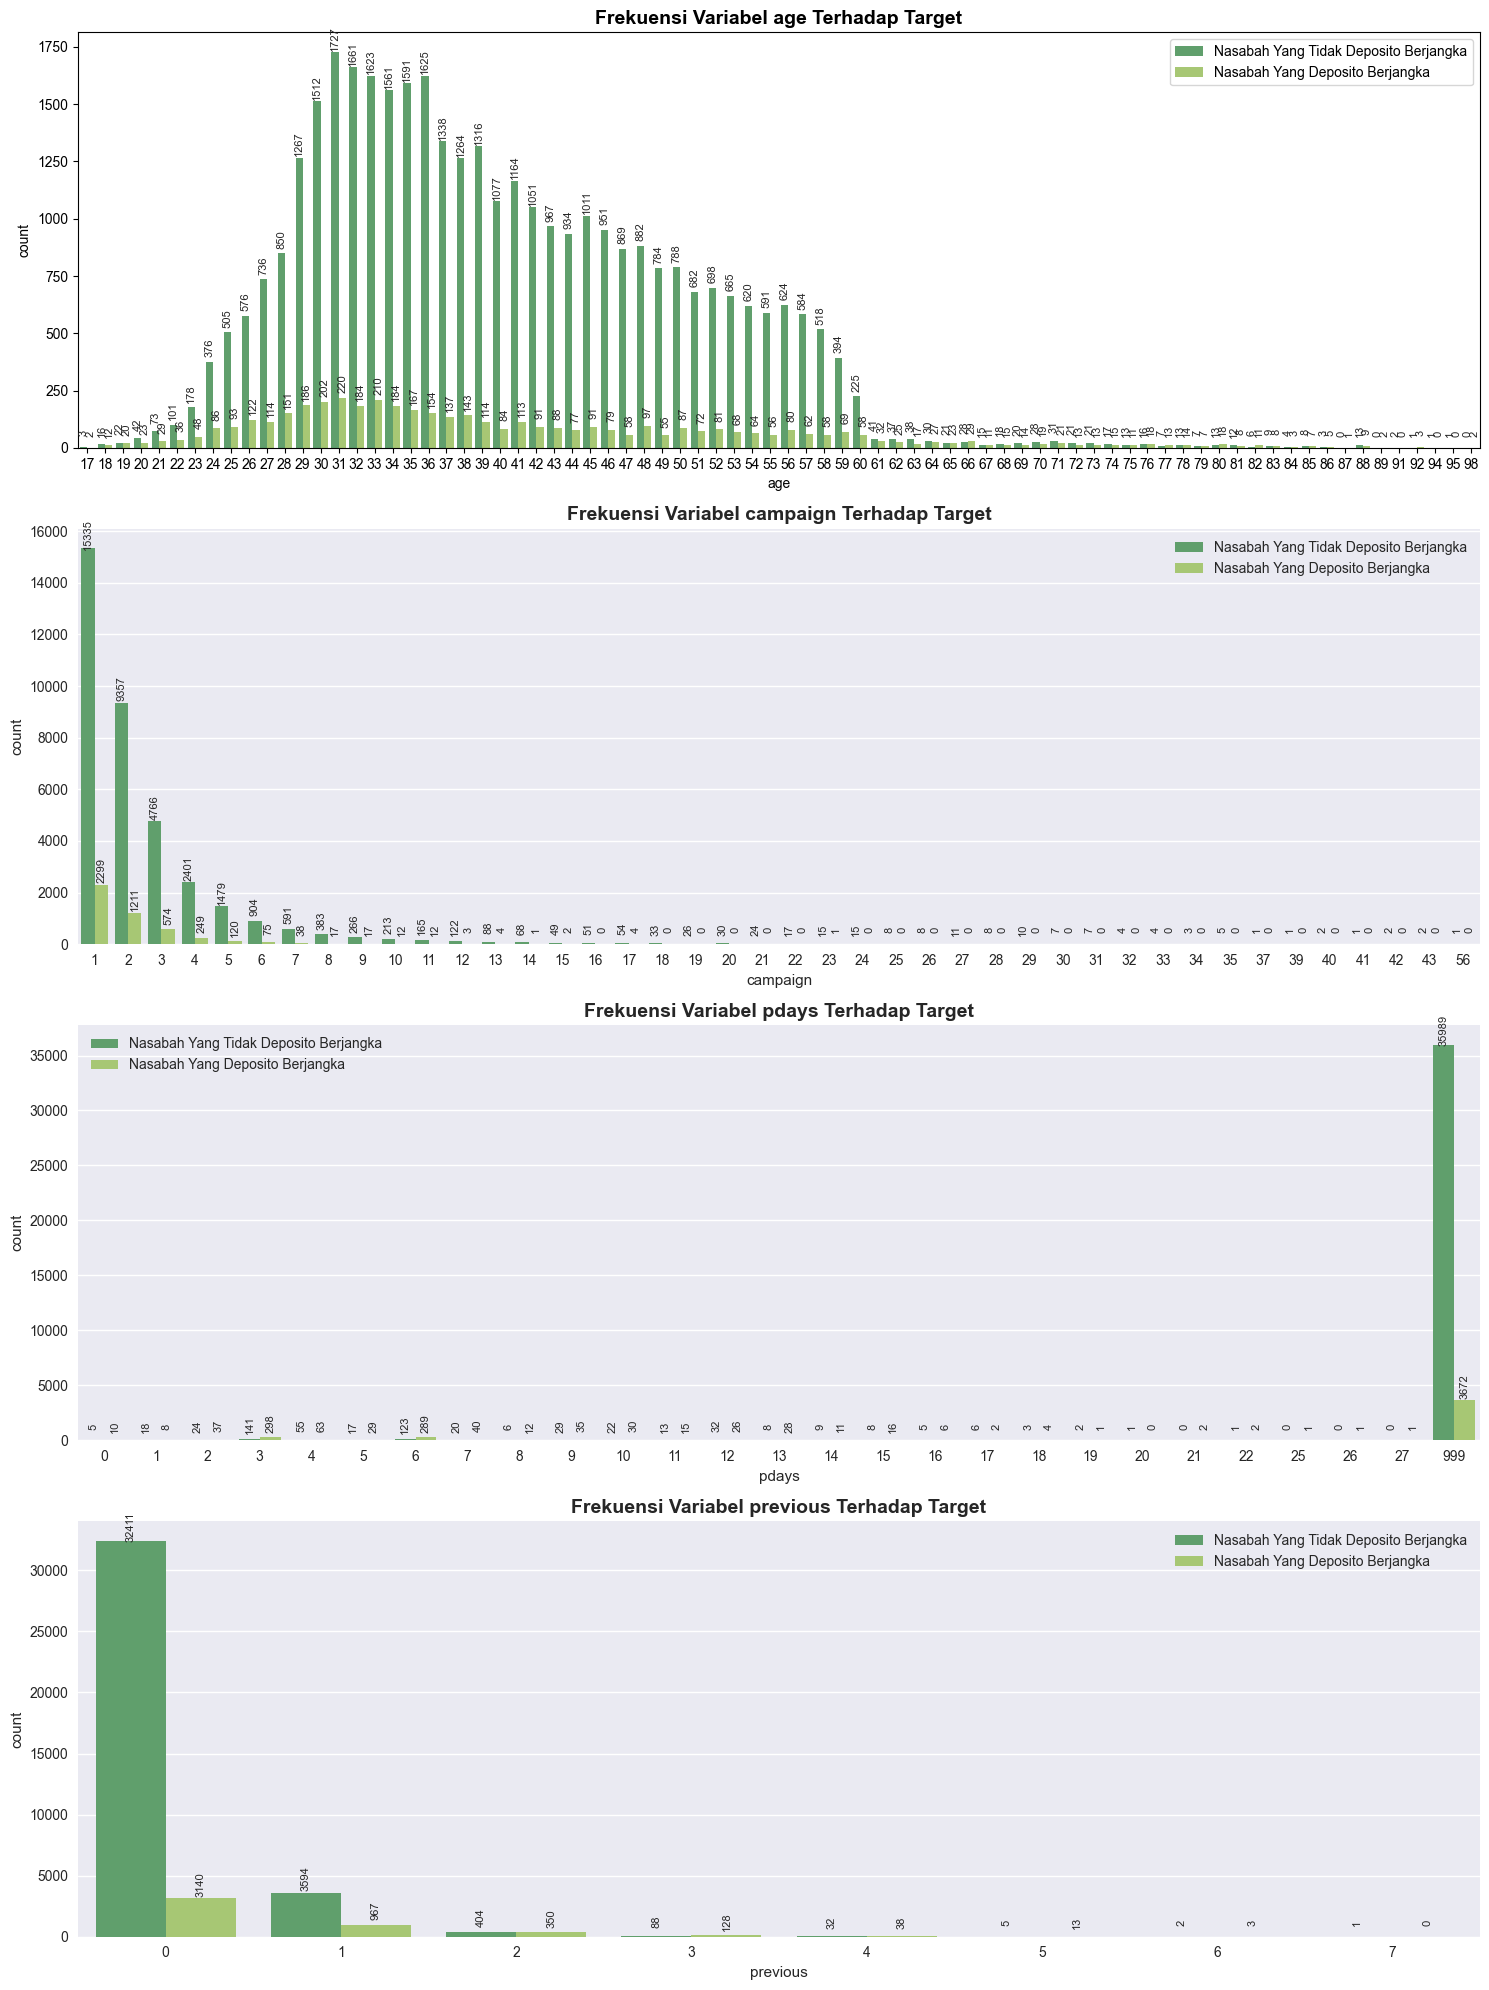

In [ ]:
# Cek variabel numerikal diskrit

diskrit = ["age", "campaign", "pdays", "previous"]

plt.figure(figsize=(15,20))
cmap = plt.get_cmap("summer")

a=1
for i in diskrit:
    plt.subplot(4,1,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    # for p in ax.patches:
    #     percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
    #     x = p.get_x() + p.get_width() / 2
    #     y = p.get_height()
    #     ax.annotate(percentage, (x, y), ha='center', va='center', rotation=90, size=8,)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', rotation=90,
                    size=8,
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.show()

__Insight :__
* Pada kolom ***NumberOfDeviceRegistered***, pelanggan dengan jumlah device terdaftar lebih dari 2 device cenderung akan *churn* (*diatas 4% dari total pelanggan*). Hal ini mungkin karena pelanggan memiliki banyak opsi e-commerce dan pelanggan tersebut dapat berpindah-pindah e-commerce
* Pada kolom ***NumberOfAddress***, pelanggan yang memiliki jumlah address 2 dan 3 akan cenderung churn (*diatas 4% dari total pelanggan*). Untuk jumlah address lebih dari 11, kemungkinan merupakan nilai outlier, maka perlu dianalisis kembali

##### **Numerikal Kontinyu** (*duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed*)

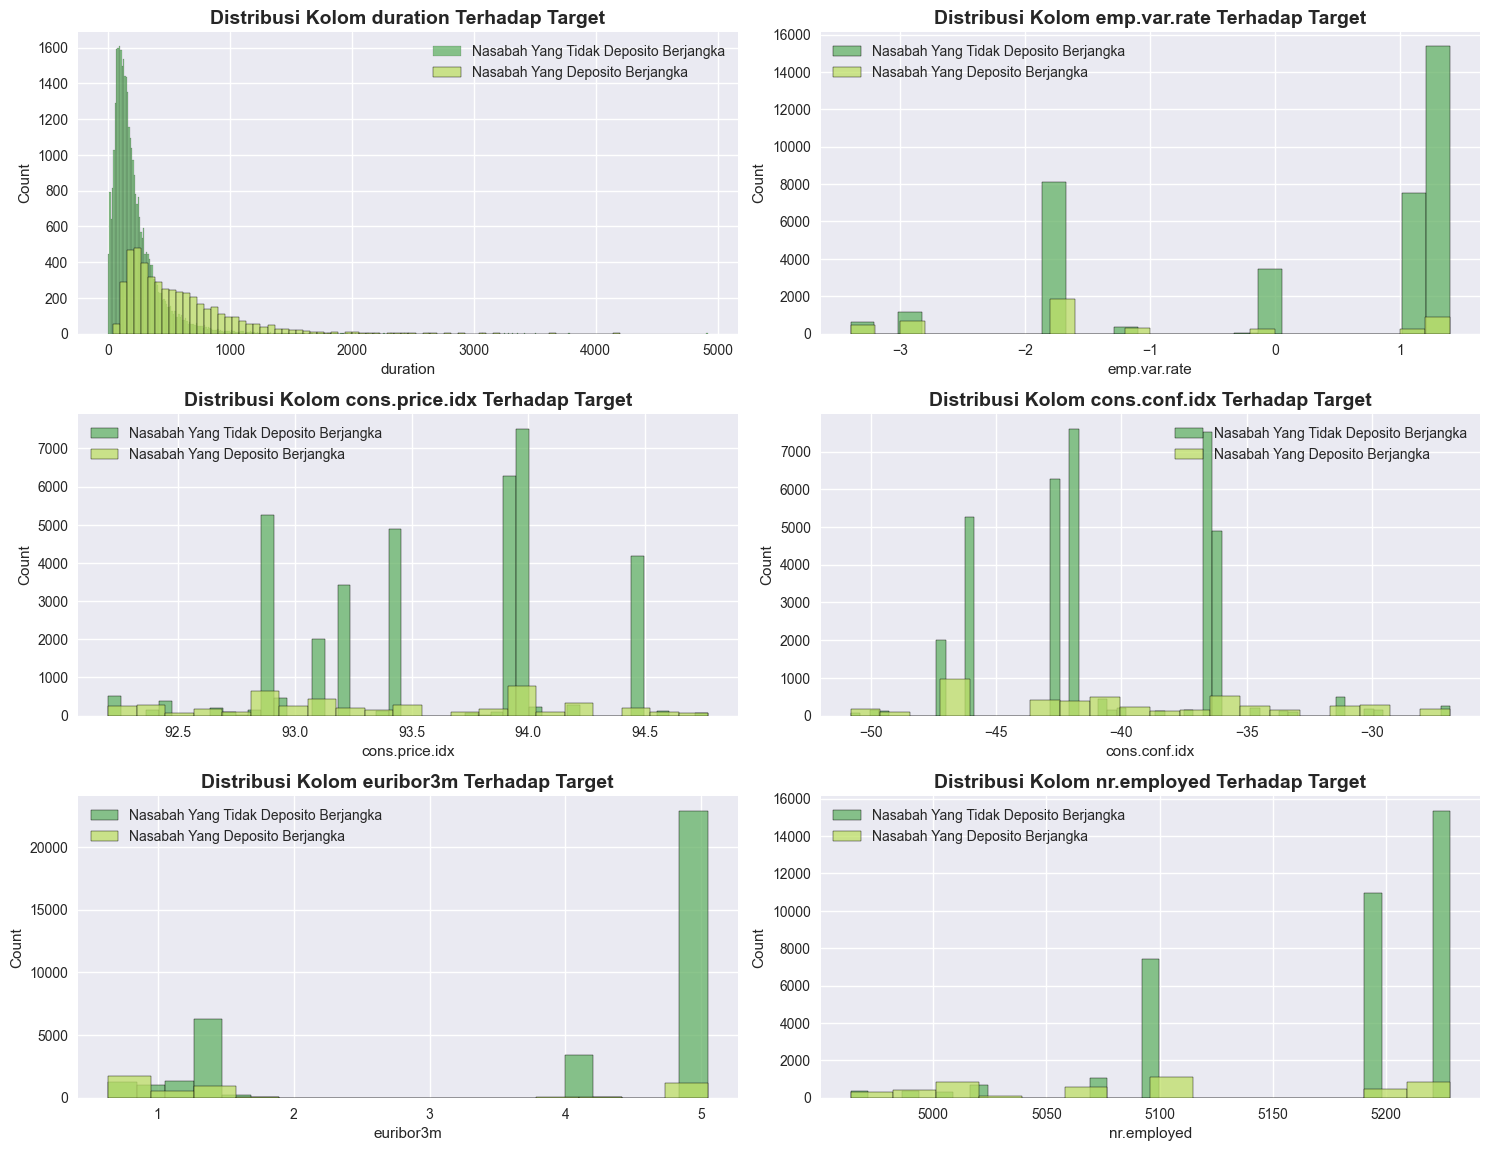

In [ ]:
# Cek variabel numerikal kontinyu

kontinu = ["duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("summer")

a=1
for i in kontinu:
    plt.subplot(4,2,a)
    sns.histplot(x=df[df["y"]=="no"][i],color=cmap([100]))
    sns.histplot(x=df[df["y"]=="yes"][i],color=cmap([190]))
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.title(f"Distribusi Kolom {i} Terhadap Target", fontsize=14, weight='bold')
    a+=1

plt.show()

__Insight :__
* Pada kolom ***Tenure***, pelanggan churn terjadi pada awal bulan pemakaian yaitu di bulan ke-0 hingga bulan ke-2. Hal tersebut kemungkinan bisa terjadi dikarenakan pelanggan masih beradaptasi dengan platform e-commerce dan merasa tidak cocok dengan platform tersebut
* Pada kolom ***WarehouseToHome***, pelanggan dengan jarak gudang ke rumah kurang dari 20 mil cenderung churn. Hal tersebut mungkin dikarenakan ongkos kirim yang terlalu mahal untuk jarak yang dekat dengan rumah
* Pada kolom ***DaySinceLastOrder***, pelanggan terbanyak churn terjadi satu sampai dua hari setelah melakukan order. Hal tersebut mungkin terjadi dikarenakan pelanggan hanya membutuhkan barang dari e-commerce dan tidak tertarik dengan platform e-commerce tersebut
* Pada kolom ***CashbackAmount*** (nilai dibawah 100 dolar kemungkinan adalah nilai outlier), semakin rendah cashback yang diberikan maka semakin banyak pelanggan yang churn
* Pada **semua kolom numerikal kontinyu** pesebaran data tidak merata, hal ini terjadi karena terdapat rare label. Maka perlu dilakukan analisa kembali

#### **Categorical variable**

##### **Kategorikal Nominal `Target`** (*y*)

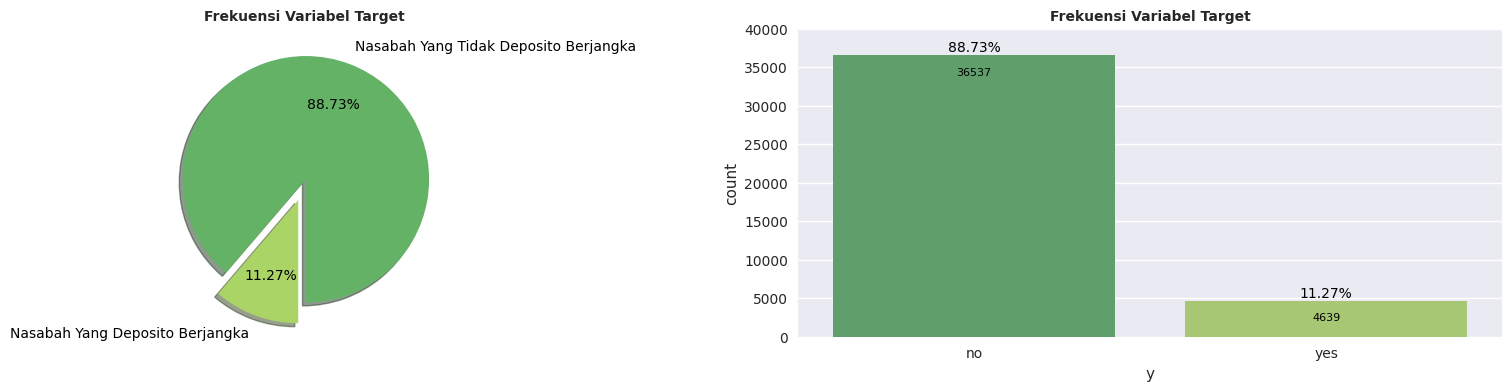

In [ ]:
# Melihat kategori Target

# Mengatur proporsi grafik
fig, axes = plt.subplots(1, 2, figsize=(20,4))
plt.style.use('default')
cmap = plt.get_cmap('summer')

# create pie chart
temp_df = df.y.value_counts(normalize=True) * 100
axes[0].pie(x=[temp_df.loc["no"], temp_df.loc["yes"]], labels=['Nasabah Yang Tidak Deposito Berjangka', 'Nasabah Yang Deposito Berjangka'], colors=cmap([100, 170]), autopct='%0.2f%%', 
        startangle=270, pctdistance=0.65, labeldistance=1.15, explode=(0.03, 0.15), shadow=True)
# set title
axes[0].set_title('Frekuensi Variabel Target', fontsize=10, weight='bold')

# create barplot
plt.title("Frekuensi Variabel Target", fontsize=10, weight='bold')
# set title dan 
ax = sns.countplot(data=df, x="y", palette="summer")
ax.set_ylim([0, 40000])
# annotation
for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')
                    

plt.show();

__Insight :__
* Jumlah nasabah yang **Menggunakan Term Deposit** (`yes`) sebanyak 4,640 (11.27%)
* Jumlah nasabah yang **Tidak Menggunakan Term Deposit** (`no`) sebanyak 36,548 (88.73%)
* Dari dataset terjadi ***Imbalance*** dengan kelas yang tidak menggunakan Term Deposit menjadi kelas mayoritas. Selanjutnya kita akan lakukan analisis mendalam

##### **Kategorikal Nominal** (*job, marital, default, housing, loan, contact, month, day_of_week, poutcome*)

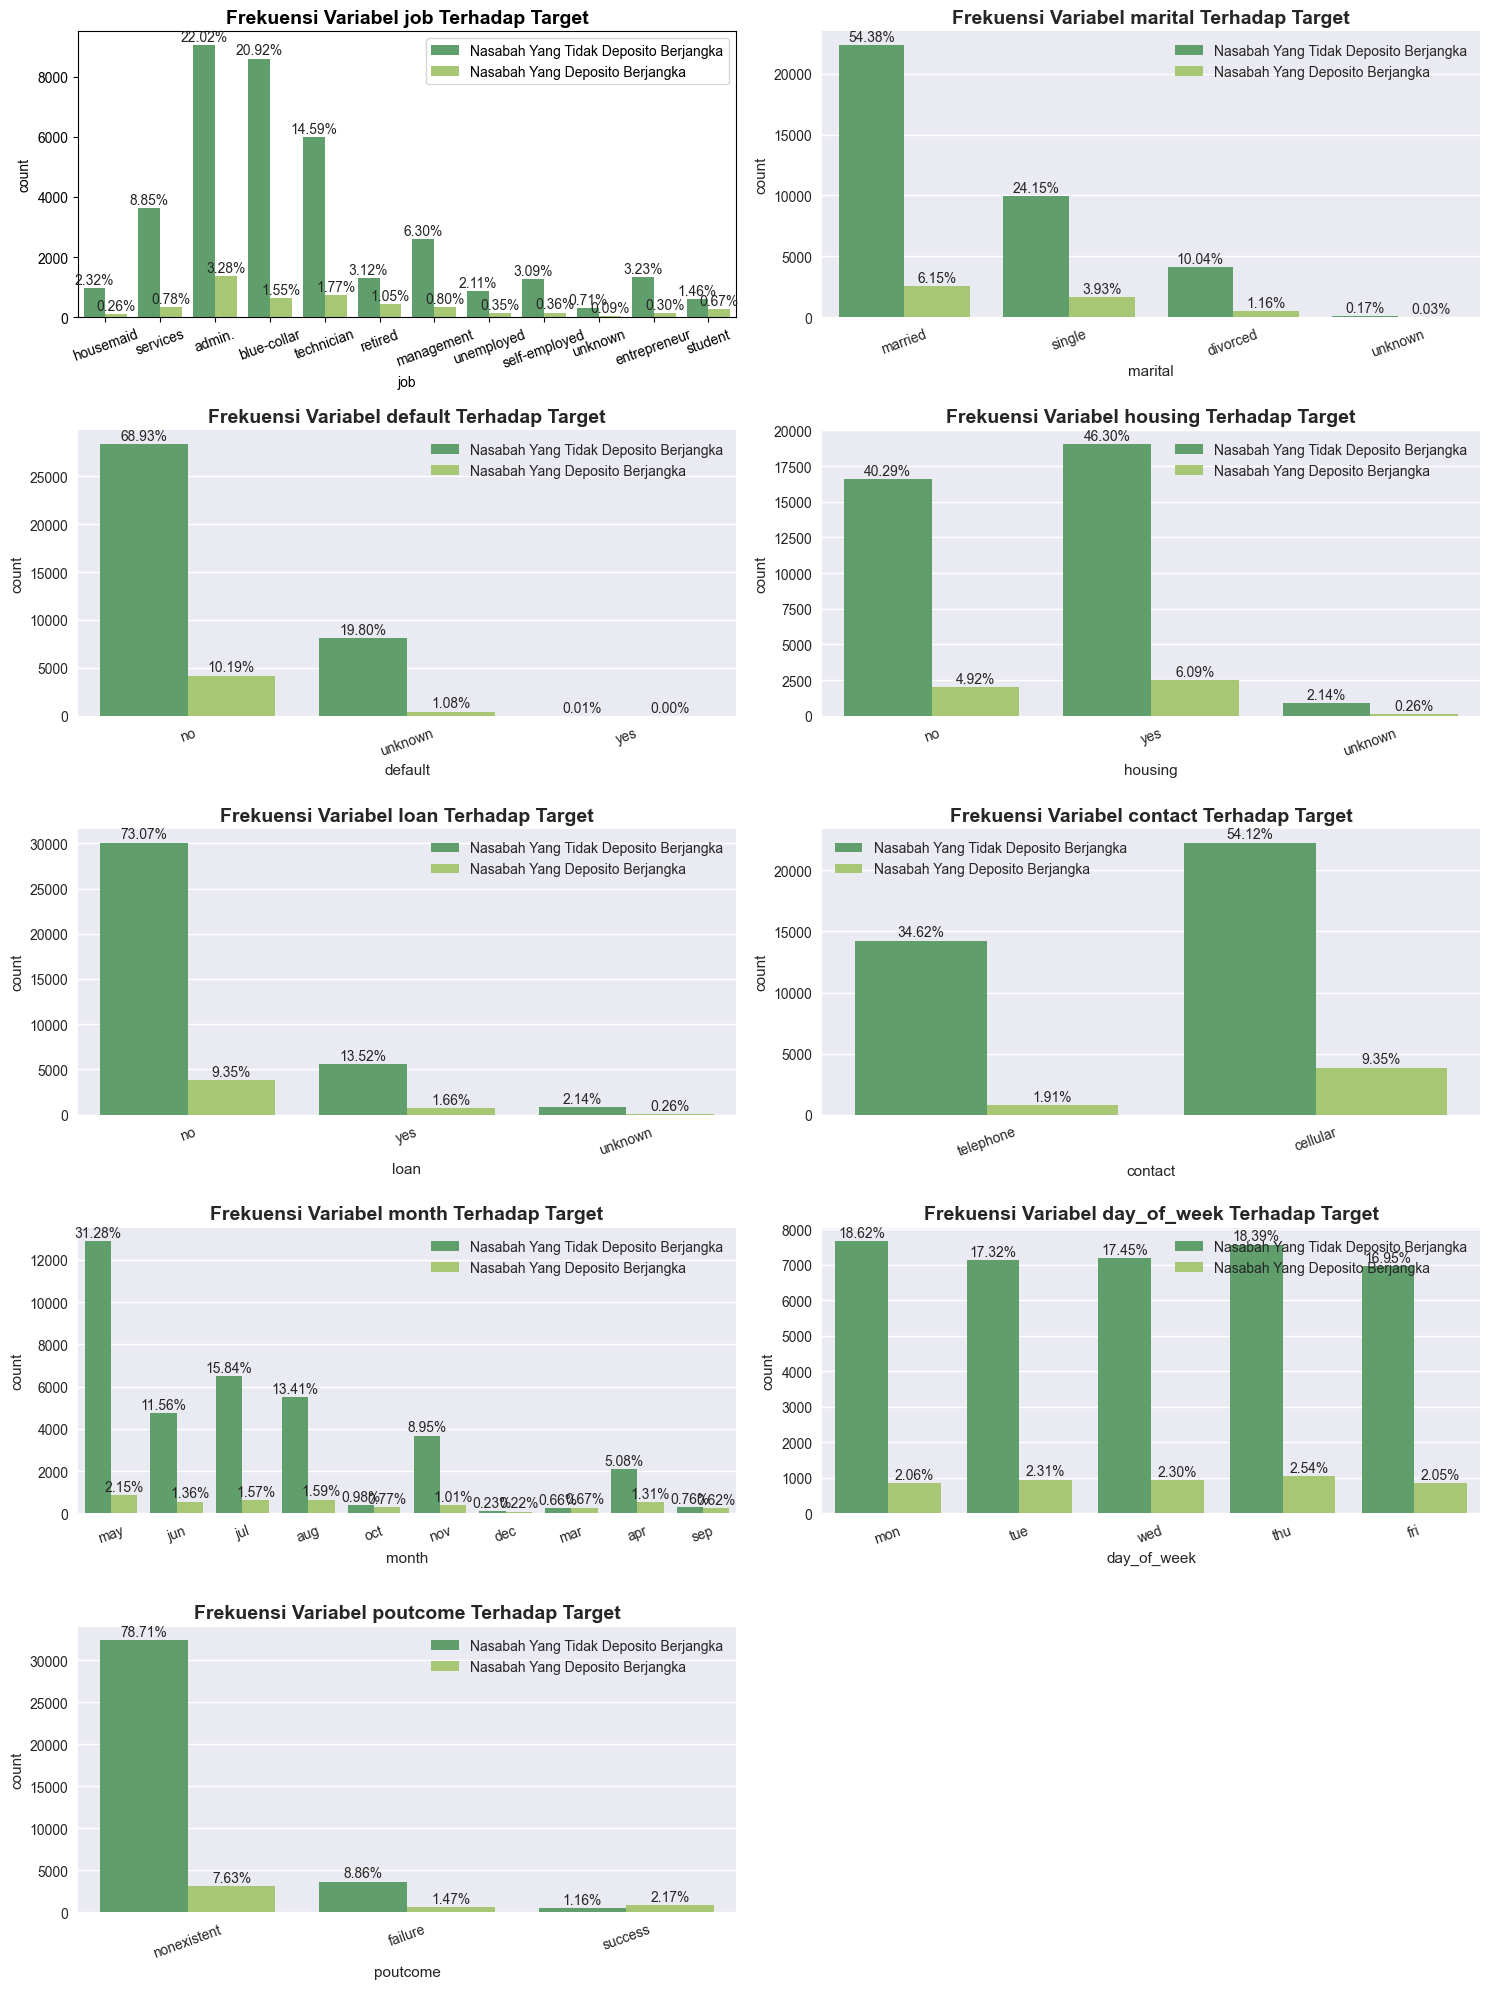

In [ ]:
# Cek variabel kategorikal nominal

nominal = ["job", "marital", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

plt.figure(figsize=(15,20))
cmap = plt.get_cmap("summer")

a=1
for i in nominal:
    plt.subplot(5,2,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    ax.tick_params(axis='x', labelrotation=20)
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    # for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.0f'), 
    #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                 ha = 'center', va = 'center',
    #                 size=8,
    #                 xytext = (0, -5), 
    #                 textcoords = 'offset points')

plt.show()

__Insight :__
* Pada fitur ***`job`***, **admin** merupakan profesi dengan tingkat tertinggi dalam Berlangganan Deposito Berjangka maupun Tidak Berlangganan deposito berjangka. Hal ini disebabkan karena  jumlah nasabah yang bekerja sebagai admin lebih banyak dibandingkan dengan profesi lainnya.
* Pada fitur ***`marital`***, mayoritas nasabah ialah nasabah yang sudah menikah, diikuti oleh nasabah lajang, bercerai, dan unknown.
* Pada fitur ***`default`*** menunjukan apakah nasabah memiliki kredit macet atau tidak. Mayoritas nasabah tidak memiliki kredit macet, diikuti oleh kategori unknown, dan nasabah yang memiliki kredit macet.
* Pada fitur ***`housing`*** menunjukan apakah nasabah memiliki pinjaman rumah atau tidak. Mayoritas nasabah memiliki pinjaman rumah, diikuti oleh kategori tidak memiliki pinjaman rumah, dan kategori unknown.
* Pada fitur ***`loan`*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***`contact`*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***`month`*** menunjukan apakah nasabah memiliki pinjaman bank atau tidak. Mayoritas nasabah tidak memiliki pinjaman bank, diikuti oleh nasabah yang memiliki pinjaman bank, dan kategori unknown.
* Pada fitur ***`day_of_week`*** bisa dilihat bahwa masing-masing hari kerja memiliki distribusi yang sama baik nasabah yang menggunakan term deposit atau yang tidak. Nasabah yang tidak menggunakan term deposit berkisar 17%-18%, dan untuk nasabah yang menggunakan term deposit berkisar antara 2.0%-2.5%. Hal ini menandakan bahwa fitur day_of_week tidak akan terlalu membantu dalam memprediksi variabel target, karena semua hari memiliki distribusi yang sama.
* Pada fitur ***`poutcome`*** menunjukan hasil dari campaign sebelumnya. kategori terbanyak dari hasil kampanye pemasaran sebelumnya ialah nonexistent (tidak ada). Artinya, sebagian besar nasabah merupakan nasabah baru yang belum pernah mendapatkan campaign sebelumnya. Yang perlu diperhatikan disini adalah, kategori dengan hasil yang success dari kampanye sebelumnya, sebagian besar dari nasabah tersebut memang berlangganan deposito berjangka. Hal ini terlihat dari 2,17% Berlangganan Deposito Berjangka dan 1,16% Tidak Berlangganan Deposito Berjangka. Dari sini, kita dapat membuat asumsi, bahwa fitur ini mungkin memiliki beberapa nilai dalam memprediksi variabel target. khususnya kategori poutcome_success.

##### **Kategorikal Ordinal** (*education*)

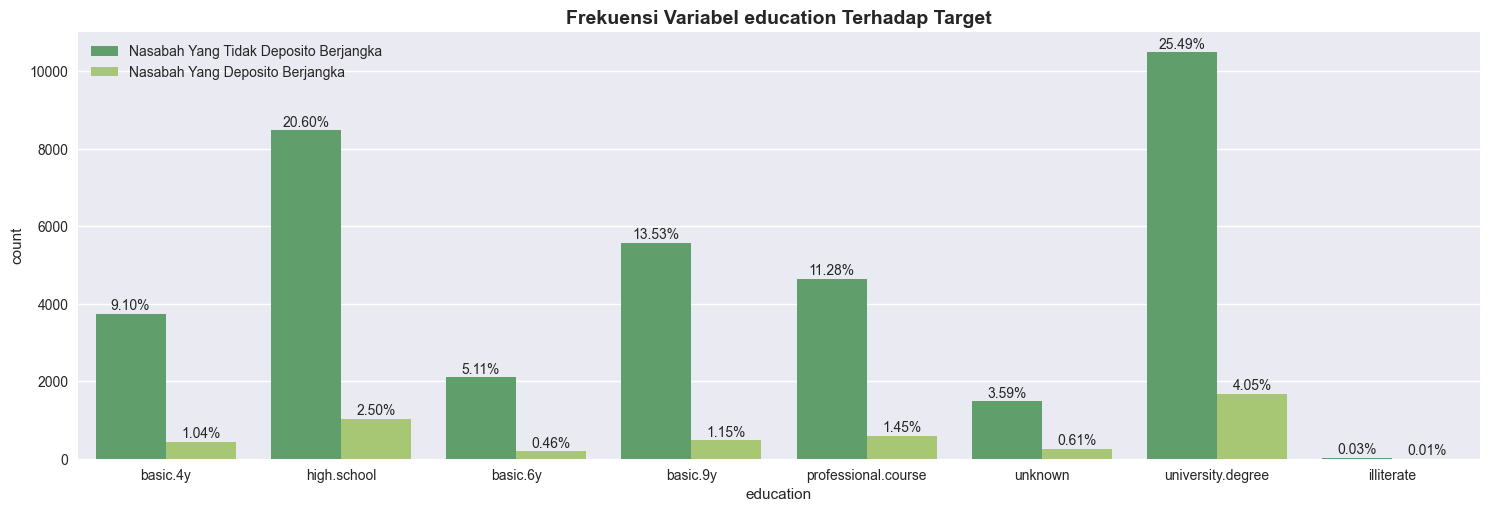

In [ ]:
# Cek variabel kategorikal ordinal

ordinal = ["education"]

plt.figure(figsize=(15,5))
cmap = plt.get_cmap("summer")

a=1
for i in ordinal:
    plt.subplot(1,1,a)
    ax = sns.countplot(data=df, x=i, hue="y", palette="summer")
    plt.legend(labels=["Nasabah Yang Tidak Deposito Berjangka", "Nasabah Yang Deposito Berjangka"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    # for p in ax.patches:
    #     ax.annotate(format(p.get_height(), '.0f'), 
    #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
    #                 ha = 'center', va = 'center',
    #                 size=8,
    #                 xytext = (0, -12), 
    #                 textcoords = 'offset points')
        
plt.show()

__Insight :__
* Pada fitur ***education***, 

<Figure size 1500x2000 with 0 Axes>

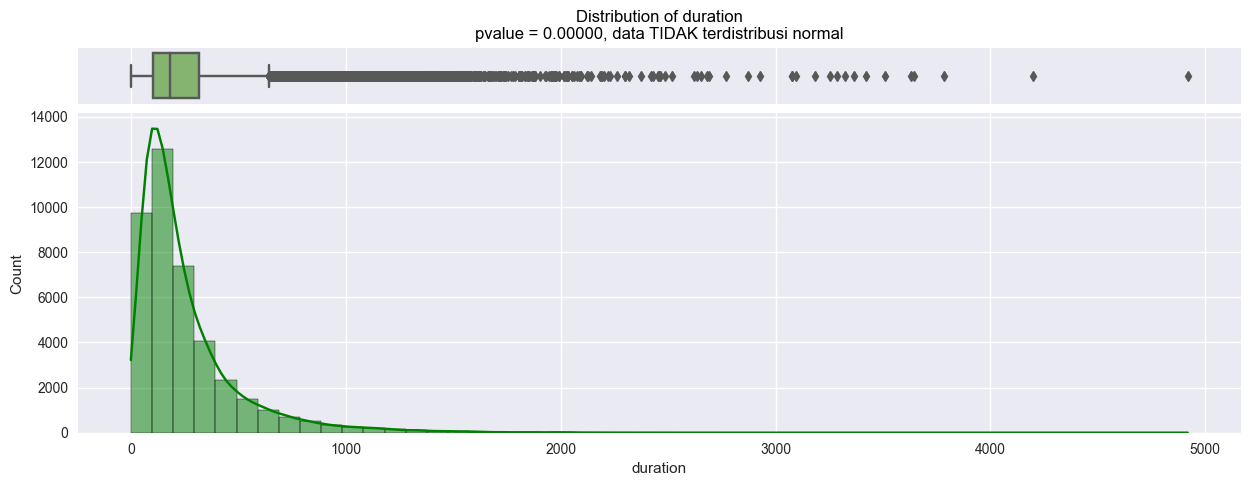

In [ ]:
# cek pesebaran data dan uji normalitas data

plt.figure(figsize=(15,20))

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (15,5), 
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

stat, pvalue = normaltest(df["duration"].dropna())

if pvalue > 0.05 :
    distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
else :
    distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

ax1.set_title(f"Distribution of duration\n{distribusi}", color = "black")
sns.boxplot(x = df["duration"], ax = ax1, palette="summer")
ax1.set(xlabel = "")

sns.histplot(data = df["duration"], ax = ax2, stat = "count", kde=True, bins=50, color="green")

plt.show()